In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from statannotations.Annotator import Annotator

In [4]:
metadata = pd.read_csv('../data/Microbiome/14748_metadata_overpooling.txt', 
                       sep='\t', index_col=0)

In [4]:
len(metadata[~(metadata['host_subject_id'].str.contains("BLANK"))].host_subject_id.unique())

28

In [5]:
metadata[~(metadata['host_subject_id'].str.contains("BLANK"))].groupby(['genotype', 'sex','host_subject_id']).count()

anonymized_name  collection_timestamp  \
genotype sex    host_subject_id                                          
3XTG     female CAGE 1                        15                    15   
                CAGE 12                       18                    18   
                CAGE 2                        14                    14   
                CAGE 20                       21                    21   
                CAGE 21                       21                    21   
                CAGE 22                       20                    20   
                CAGE 3                        16                    16   
                CAGE 40                       20                    20   
                CAGE 41                       20                    20   
                CAGE 50                       15                    15   
                CAGE 53                        3                     3   
                CAGE 6                        14                    14   
                CAGE 62                       11                    11   
         male   CAGE 40                        2                     2   
                CAGE 41                        3                     3   
                CAGE 42                        3                     3   
                CAGE 68                       10                    10   
                CAGE 69                        9                     9   
                CAGE 70                       10                    10   
                CAGE 73                        8                     8   
                CAGE42                        20                    20   
B6       female CAGE 16                       19                    19   
                CAGE 27                       21                    21   
                CAGE 53                       10                    10   
                CAGE 54                       13                    13   
                CAGE 6                         4                     4   
                CAGE 66                       15                    15   
                CAGE 7                        14                    14   
         male   CAGE 45                       23                    23   
                CAGE 46                       23                    23   
                CAGE 47                       23                    23   
                CAGE 73                        2                     2   
                CAGE 74                       13                    13   

                                 description  dna_extracted  elevation  \
genotype sex    host_subject_id                                          
3XTG     female CAGE 1                     0             15         15   
                CAGE 12                    0             18         18   
                CAGE 2                     0             14         14   
                CAGE 20                    0             21         21   
                CAGE 21                    0             21         21   
                CAGE 22                    0             20         20   
                CAGE 3                     0             16         16   
                CAGE 40                    0             20         20   
                CAGE 41                    0             20         20   
                CAGE 50                    0             15         15   
                CAGE 53                    0              3          3   
                CAGE 6                     0             14         14   
                CAGE 62                    0             11         11   
         male   CAGE 40                    0              2          2   
                CAGE 41                    0              3          3   
                CAGE 42                    0              3          3   
                CAGE 68                    0             10         10   
                CAGE 69             

# Alpha Diversity

In [6]:
faith = pd.read_csv('../data/Microbiome/pooling_filtered/all_gg2_1000000rar_core_diversity/faith_pd_vector/alpha-diversity.tsv',
                    sep='\t', index_col=0)
faith.head()

faith_pd
#SampleID                                
14748.CAGE41.FSPF3XTG.L10.1  34716.255698
14748.CAGE21.FSPF3XTG.L9.2   31650.497723
14748.CAGE41.FSPF3XTG.L2.2   28872.732394
14748.CAGE40.FSPF3XTG.L10.1  33388.223683
14748.CAGE41.FSPF3XTG.L7.1   31585.710019

In [7]:
faith_md = pd.merge(faith, metadata, left_index=True, right_index=True)
faith_md.head()

faith_pd        anonymized_name  \
14748.CAGE41.FSPF3XTG.L10.1  34716.255698  CAGE41.FSPF3XTG.L10.1   
14748.CAGE21.FSPF3XTG.L9.2   31650.497723   CAGE21.FSPF3XTG.L9.2   
14748.CAGE41.FSPF3XTG.L2.2   28872.732394   CAGE41.FSPF3XTG.L2.2   
14748.CAGE40.FSPF3XTG.L10.1  33388.223683  CAGE40.FSPF3XTG.L10.1   
14748.CAGE41.FSPF3XTG.L7.1   31585.710019   CAGE41.FSPF3XTG.L7.1   

                            collection_timestamp description  dna_extracted  \
14748.CAGE41.FSPF3XTG.L10.1              3/10/21         NaN          False   
14748.CAGE21.FSPF3XTG.L9.2              11/23/20         NaN          False   
14748.CAGE41.FSPF3XTG.L2.2               6/30/20         NaN          False   
14748.CAGE40.FSPF3XTG.L10.1              3/10/21         NaN          False   
14748.CAGE41.FSPF3XTG.L7.1               12/1/20         NaN          False   

                             elevation           empo_1  empo_2  \
14748.CAGE41.FSPF3XTG.L10.1        263  Host-associated  Animal   
14748.CAGE21.FSPF3XTG.L9.2         263  Host-associated  Animal   
14748.CAGE41.FSPF3XTG.L2.2         263  Host-associated  Animal   
14748.CAGE40.FSPF3XTG.L10.1        263  Host-associated  Animal   
14748.CAGE41.FSPF3XTG.L7.1         263  Host-associated  Animal   

                                        empo_3    env_biome  ...  \
14748.CAGE41.FSPF3XTG.L10.1  Animal distal gut  urban biome  ...   
14748.CAGE21.FSPF3XTG.L9.2   Animal distal gut  urban biome  ...   
14748.CAGE41.FSPF3XTG.L2.2   Animal distal gut  urban biome  ...   
14748.CAGE40.FSPF3XTG.L10.1  Animal distal gut  urban biome  ...   
14748.CAGE41.FSPF3XTG.L7.1   Animal distal gut  urban biome  ...   

                                  scientific_name     sex    study_type  \
14748.CAGE41.FSPF3XTG.L10.1  mouse gut metagenome  female  Longitudinal   
14748.CAGE21.FSPF3XTG.L9.2   mouse gut metagenome  female  Longitudinal   
14748.CAGE41.FSPF3XTG.L2.2   mouse gut metagenome  female  Longitudinal   
14748.CAGE40.FSPF3XTG.L10.1  mouse gut metagenome  female  Longitudinal   
14748.CAGE41.FSPF3XTG.L7.1   mouse gut metagenome  female  Longitudinal   

                            taxon_id  \
14748.CAGE41.FSPF3XTG.L10.1   410661   
14748.CAGE21.FSPF3XTG.L9.2    410661   
14748.CAGE41.FSPF3XTG.L2.2    410661   
14748.CAGE40.FSPF3XTG.L10.1   410661   
14748.CAGE41.FSPF3XTG.L7.1    410661   

                                                                         title  \
14748.CAGE41.FSPF3XTG.L10.1  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE21.FSPF3XTG.L9.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE41.FSPF3XTG.L2.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE40.FSPF3XTG.L10.1  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE41.FSPF3XTG.L7.1   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   

                               tube_id  keep genotype_sex    cohort  \
14748.CAGE41.FSPF3XTG.L10.1  363130500  True  3XTG_female  COHORT 6   
14748.CAGE21.FSPF3XTG.L9.2   363132072  True  3XTG_female  COHORT 4   
14748.CAGE41.FSPF3XTG.L2.2   363131324  True  3XTG_female  COHORT 6   
14748.CAGE40.FSPF3XTG.L10.1  363130487  True  3XTG_female  COHORT 6   
14748.CAGE41.FSPF3XTG.L7.1   363130482  True  3XTG_female  COHORT 6   

                            genotype_tp  
14748.CAGE41.FSPF3XTG.L10.1     3XTG_10  
14748.CAGE21.FSPF3XTG.L9.2       3XTG_9  
14748.CAGE41.FSPF3XTG.L2.2       3XTG_2  
14748.CAGE40.FSPF3XTG.L10.1     3XTG_10  
14748.CAGE41.FSPF3XTG.L7.1       3XTG_7  

[5 rows x 41 columns]

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

3XTG vs. B6: Mann-Whitney-Wilcoxon test two-sided, P_val:1.796e-01 U_stat=1.194e+04


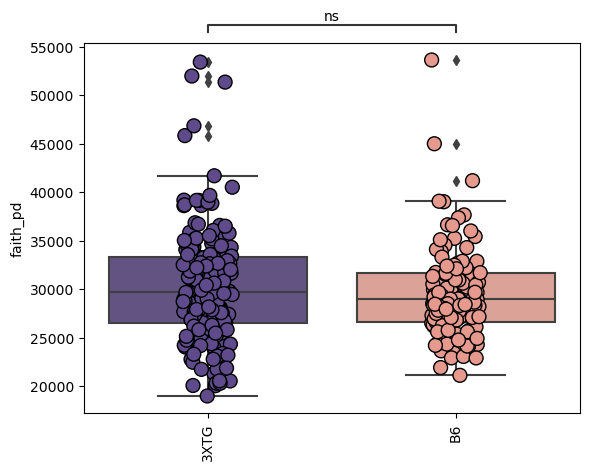

In [8]:
g = sns.boxplot(data=faith_md, x='genotype', y='faith_pd',
               palette=['#5F4B8B', '#E69A8D'])
g = sns.stripplot(data=faith_md, x='genotype', y='faith_pd', 
               palette=['#5F4B8B', '#E69A8D'],
                 s=10, edgecolor='k', linewidth=1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


pairs=[('B6', '3XTG')]

annotator = Annotator(g, pairs, data=faith_md, x='genotype', y='faith_pd')
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

plt.xlabel("")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_faith_genotype_boxplot.svg',
           bbox_inches='tight', dpi=150)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Longitudinal vs. Sacrifice: Mann-Whitney-Wilcoxon test two-sided, P_val:8.422e-01 U_stat=7.658e+03


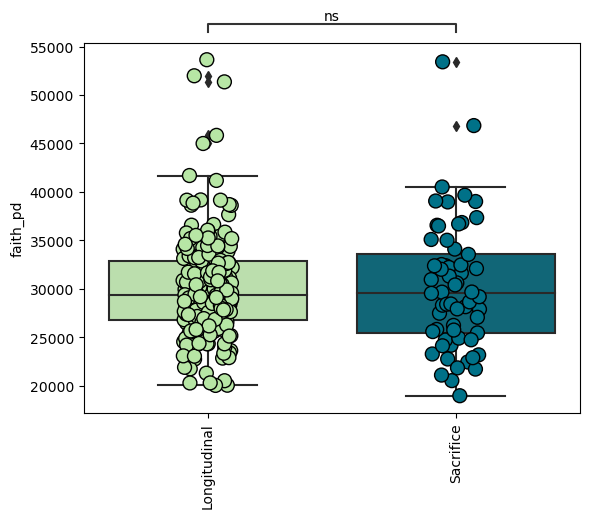

In [9]:
g = sns.boxplot(data=faith_md, x='study_type', y='faith_pd',
               palette=['#B7E6A5', '#007188'])
g = sns.stripplot(data=faith_md, x='study_type', y='faith_pd', 
               palette=['#B7E6A5', '#007188'],
                 s=10, edgecolor='k', linewidth=1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


pairs=[('Longitudinal', 'Sacrifice')]

annotator = Annotator(g, pairs, data=faith_md, x='study_type', y='faith_pd')
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

plt.xlabel("")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_faith_study-type_boxplot.svg',
           bbox_inches='tight', dpi=150)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

female vs. male: Mann-Whitney-Wilcoxon test two-sided, P_val:8.807e-03 U_stat=1.153e+04


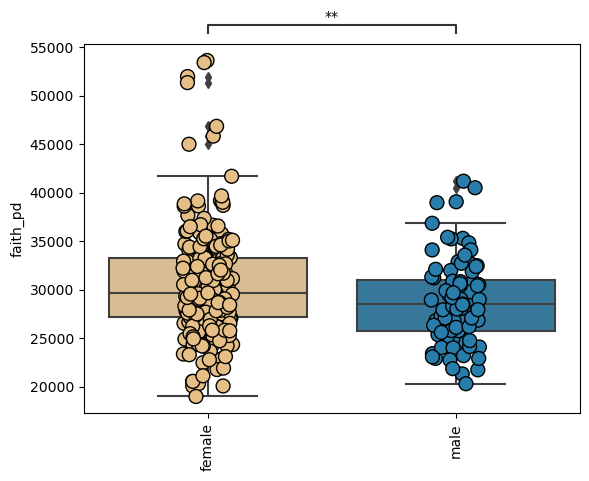

In [10]:
g = sns.boxplot(data=faith_md, x='sex', y='faith_pd',
               palette=['#E5BF86', '#287DAB'])
g = sns.stripplot(data=faith_md, x='sex', y='faith_pd', 
               palette=['#E5BF86', '#287DAB'],
                 s=10, edgecolor='k', linewidth=1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


pairs=[('male', 'female')]

annotator = Annotator(g, pairs, data=faith_md, x='sex', y='faith_pd')
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

plt.xlabel("")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_faith_sex_boxplot.svg',
           bbox_inches='tight', dpi=150)

In [11]:
shann = pd.read_csv('../data/Microbiome/pooling_filtered/all_gg2_1000000rar_core_diversity/shannon_vector/alpha-diversity.tsv',
                    sep='\t', index_col=0)
shann.head()

shannon_entropy
14748.CAGE41.FSPF3XTG.L10.1         5.353453
14748.CAGE21.FSPF3XTG.L9.2          4.149889
14748.CAGE41.FSPF3XTG.L2.2          3.850090
14748.CAGE40.FSPF3XTG.L10.1         4.574566
14748.CAGE41.FSPF3XTG.L7.1          4.265983

In [12]:
shann_md = pd.merge(shann, metadata, left_index=True, right_index=True)
shann_md.head()

shannon_entropy        anonymized_name  \
14748.CAGE41.FSPF3XTG.L10.1         5.353453  CAGE41.FSPF3XTG.L10.1   
14748.CAGE21.FSPF3XTG.L9.2          4.149889   CAGE21.FSPF3XTG.L9.2   
14748.CAGE41.FSPF3XTG.L2.2          3.850090   CAGE41.FSPF3XTG.L2.2   
14748.CAGE40.FSPF3XTG.L10.1         4.574566  CAGE40.FSPF3XTG.L10.1   
14748.CAGE41.FSPF3XTG.L7.1          4.265983   CAGE41.FSPF3XTG.L7.1   

                            collection_timestamp description  dna_extracted  \
14748.CAGE41.FSPF3XTG.L10.1              3/10/21         NaN          False   
14748.CAGE21.FSPF3XTG.L9.2              11/23/20         NaN          False   
14748.CAGE41.FSPF3XTG.L2.2               6/30/20         NaN          False   
14748.CAGE40.FSPF3XTG.L10.1              3/10/21         NaN          False   
14748.CAGE41.FSPF3XTG.L7.1               12/1/20         NaN          False   

                             elevation           empo_1  empo_2  \
14748.CAGE41.FSPF3XTG.L10.1        263  Host-associated  Animal   
14748.CAGE21.FSPF3XTG.L9.2         263  Host-associated  Animal   
14748.CAGE41.FSPF3XTG.L2.2         263  Host-associated  Animal   
14748.CAGE40.FSPF3XTG.L10.1        263  Host-associated  Animal   
14748.CAGE41.FSPF3XTG.L7.1         263  Host-associated  Animal   

                                        empo_3    env_biome  ...  \
14748.CAGE41.FSPF3XTG.L10.1  Animal distal gut  urban biome  ...   
14748.CAGE21.FSPF3XTG.L9.2   Animal distal gut  urban biome  ...   
14748.CAGE41.FSPF3XTG.L2.2   Animal distal gut  urban biome  ...   
14748.CAGE40.FSPF3XTG.L10.1  Animal distal gut  urban biome  ...   
14748.CAGE41.FSPF3XTG.L7.1   Animal distal gut  urban biome  ...   

                                  scientific_name     sex    study_type  \
14748.CAGE41.FSPF3XTG.L10.1  mouse gut metagenome  female  Longitudinal   
14748.CAGE21.FSPF3XTG.L9.2   mouse gut metagenome  female  Longitudinal   
14748.CAGE41.FSPF3XTG.L2.2   mouse gut metagenome  female  Longitudinal   
14748.CAGE40.FSPF3XTG.L10.1  mouse gut metagenome  female  Longitudinal   
14748.CAGE41.FSPF3XTG.L7.1   mouse gut metagenome  female  Longitudinal   

                            taxon_id  \
14748.CAGE41.FSPF3XTG.L10.1   410661   
14748.CAGE21.FSPF3XTG.L9.2    410661   
14748.CAGE41.FSPF3XTG.L2.2    410661   
14748.CAGE40.FSPF3XTG.L10.1   410661   
14748.CAGE41.FSPF3XTG.L7.1    410661   

                                                                         title  \
14748.CAGE41.FSPF3XTG.L10.1  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE21.FSPF3XTG.L9.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE41.FSPF3XTG.L2.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE40.FSPF3XTG.L10.1  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE41.FSPF3XTG.L7.1   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   

                               tube_id  keep genotype_sex    cohort  \
14748.CAGE41.FSPF3XTG.L10.1  363130500  True  3XTG_female  COHORT 6   
14748.CAGE21.FSPF3XTG.L9.2   363132072  True  3XTG_female  COHORT 4   
14748.CAGE41.FSPF3XTG.L2.2   363131324  True  3XTG_female  COHORT 6   
14748.CAGE40.FSPF3XTG.L10.1  363130487  True  3XTG_female  COHORT 6   
14748.CAGE41.FSPF3XTG.L7.1   363130482  True  3XTG_female  COHORT 6   

                            genotype_tp  
14748.CAGE41.FSPF3XTG.L10.1     3XTG_10  
14748.CAGE21.FSPF3XTG.L9.2       3XTG_9  
14748.CAGE41.FSPF3XTG.L2.2       3XTG_2  
14748.CAGE40.FSPF3XTG.L10.1     3XTG_10  
14748.CAGE41.FSPF3XTG.L7.1       3XTG_7  

[5 rows x 41 columns]

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

3XTG vs. B6: Mann-Whitney-Wilcoxon test two-sided, P_val:2.824e-05 U_stat=1.408e+04


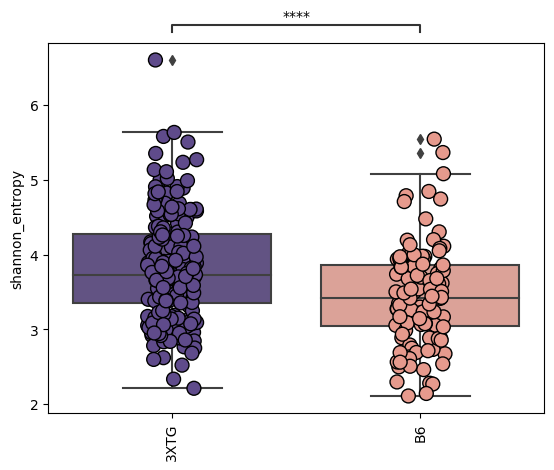

In [13]:
g = sns.boxplot(data=shann_md, x='genotype', y='shannon_entropy',
               palette=['#5F4B8B', '#E69A8D'])
g = sns.stripplot(data=shann_md, x='genotype', y='shannon_entropy', 
               palette=['#5F4B8B', '#E69A8D'],
                 s=10, edgecolor='k', linewidth=1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


pairs=[('B6', '3XTG')]

annotator = Annotator(g, pairs, data=shann_md, x='genotype', y='shannon_entropy')
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

plt.xlabel("")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_shannon_genotype_boxplot.svg',
           bbox_inches='tight', dpi=150)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Longitudinal vs. Sacrifice: Mann-Whitney-Wilcoxon test two-sided, P_val:2.064e-01 U_stat=8.321e+03


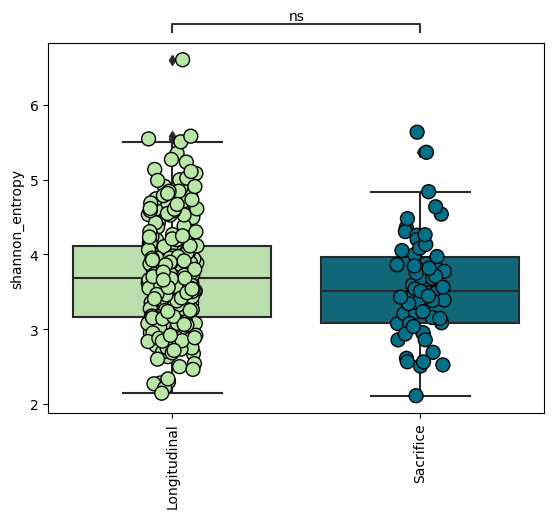

In [14]:
g = sns.boxplot(data=shann_md, x='study_type', y='shannon_entropy',
               palette=['#B7E6A5', '#007188'])
g = sns.stripplot(data=shann_md, x='study_type', y='shannon_entropy', 
               palette=['#B7E6A5', '#007188'],
                 s=10, edgecolor='k', linewidth=1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


pairs=[('Longitudinal', 'Sacrifice')]

annotator = Annotator(g, pairs, data=shann_md, x='study_type', y='shannon_entropy')
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

plt.xlabel("")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_shannon_study-type_boxplot.svg',
           bbox_inches='tight', dpi=150)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

female vs. male: Mann-Whitney-Wilcoxon test two-sided, P_val:3.749e-01 U_stat=1.031e+04


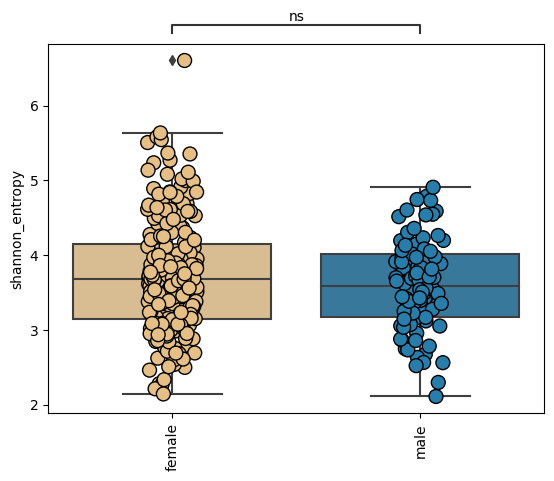

In [15]:
g = sns.boxplot(data=shann_md, x='sex', y='shannon_entropy',
               palette=['#E5BF86', '#287DAB'])
g = sns.stripplot(data=shann_md, x='sex', y='shannon_entropy', 
               palette=['#E5BF86', '#287DAB'],
                 s=10, edgecolor='k', linewidth=1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


pairs=[('male', 'female')]

annotator = Annotator(g, pairs, data=shann_md, x='sex', y='shannon_entropy')
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

plt.xlabel("")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_shannon_sex_boxplot.svg',
           bbox_inches='tight', dpi=150)

#### Sacrifice Only

In [26]:
sac_shann = pd.read_csv('../data/Microbiome/pooling_filtered/sacrifice/sac_1000000rar_core_diversity/shannon_vector/alpha-diversity.tsv',
                    sep='\t', index_col=0)
sac_shann.head()

shannon_entropy
14748.MOUSE103.CAGE68.MSPF3XTG.S7         4.356961
14748.MOUSE10.CAGE3.FSPF3XTG.S15          4.304642
14748.MOUSE17.CAGE1.FSPF3XTG.S15          2.946037
14748.MOUSE13.CAGE6.FSPFB6.S15            3.995668
14748.MOUSE14.CAGE6.FSPFB6.S15            3.879885

In [27]:
sac_shann_md = pd.merge(sac_shann, metadata, left_index=True, right_index=True)
sac_shann_md.head()

shannon_entropy  \
14748.MOUSE103.CAGE68.MSPF3XTG.S7         4.356961   
14748.MOUSE10.CAGE3.FSPF3XTG.S15          4.304642   
14748.MOUSE17.CAGE1.FSPF3XTG.S15          2.946037   
14748.MOUSE13.CAGE6.FSPFB6.S15            3.995668   
14748.MOUSE14.CAGE6.FSPFB6.S15            3.879885   

                                               anonymized_name  \
14748.MOUSE103.CAGE68.MSPF3XTG.S7  MOUSE103.CAGE68.MSPF3XTG.S7   
14748.MOUSE10.CAGE3.FSPF3XTG.S15    MOUSE10.CAGE3.FSPF3XTG.S15   
14748.MOUSE17.CAGE1.FSPF3XTG.S15    MOUSE17.CAGE1.FSPF3XTG.S15   
14748.MOUSE13.CAGE6.FSPFB6.S15        MOUSE13.CAGE6.FSPFB6.S15   
14748.MOUSE14.CAGE6.FSPFB6.S15        MOUSE14.CAGE6.FSPFB6.S15   

                                  collection_timestamp description  \
14748.MOUSE103.CAGE68.MSPF3XTG.S7              2/24/21         NaN   
14748.MOUSE10.CAGE3.FSPF3XTG.S15               9/18/20         NaN   
14748.MOUSE17.CAGE1.FSPF3XTG.S15               9/11/20         NaN   
14748.MOUSE13.CAGE6.FSPFB6.S15                 9/18/20         NaN   
14748.MOUSE14.CAGE6.FSPFB6.S15                 9/18/20         NaN   

                                   dna_extracted  elevation           empo_1  \
14748.MOUSE103.CAGE68.MSPF3XTG.S7          False        263  Host-associated   
14748.MOUSE10.CAGE3.FSPF3XTG.S15           False        263  Host-associated   
14748.MOUSE17.CAGE1.FSPF3XTG.S15           False        263  Host-associated   
14748.MOUSE13.CAGE6.FSPFB6.S15             False        263  Host-associated   
14748.MOUSE14.CAGE6.FSPFB6.S15             False        263  Host-associated   

                                   empo_2             empo_3    env_biome  \
14748.MOUSE103.CAGE68.MSPF3XTG.S7  Animal  Animal distal gut  urban biome   
14748.MOUSE10.CAGE3.FSPF3XTG.S15   Animal  Animal distal gut  urban biome   
14748.MOUSE17.CAGE1.FSPF3XTG.S15   Animal  Animal distal gut  urban biome   
14748.MOUSE13.CAGE6.FSPFB6.S15     Animal  Animal distal gut  urban biome   
14748.MOUSE14.CAGE6.FSPFB6.S15     Animal  Animal distal gut  urban biome   

                                   ...       scientific_name     sex  \
14748.MOUSE103.CAGE68.MSPF3XTG.S7  ...  mouse gut metagenome    male   
14748.MOUSE10.CAGE3.FSPF3XTG.S15   ...  mouse gut metagenome  female   
14748.MOUSE17.CAGE1.FSPF3XTG.S15   ...  mouse gut metagenome  female   
14748.MOUSE13.CAGE6.FSPFB6.S15     ...  mouse gut metagenome  female   
14748.MOUSE14.CAGE6.FSPFB6.S15     ...  mouse gut metagenome  female   

                                  study_type taxon_id  \
14748.MOUSE103.CAGE68.MSPF3XTG.S7  Sacrifice   410661   
14748.MOUSE10.CAGE3.FSPF3XTG.S15   Sacrifice   410661   
14748.MOUSE17.CAGE1.FSPF3XTG.S15   Sacrifice   410661   
14748.MOUSE13.CAGE6.FSPFB6.S15     Sacrifice   410661   
14748.MOUSE14.CAGE6.FSPFB6.S15     Sacrifice   410661   

                                                                               title  \
14748.MOUSE103.CAGE68.MSPF3XTG.S7  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.MOUSE10.CAGE3.FSPF3XTG.S15   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.MOUSE17.CAGE1.FSPF3XTG.S15   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.MOUSE13.CAGE6.FSPFB6.S15     Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.MOUSE14.CAGE6.FSPFB6.S15     Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   

                                     tube_id  keep genotype_sex    cohort  \
14748.MOUSE103.CAGE68.MSPF3XTG.S7  363192956  True    3XTG_male  COHORT 5   
14748.MOUSE10.CAGE3.FSPF3XTG.S15   363141306  True  3XTG_female  COHORT 1   
14748.MOUSE17.CAGE1.FSPF3XTG.S15   363141315  True  3XTG_female  COHORT 1   
14748.MOUSE13.CAGE6.FSPFB6.S15     363141308  True    B6_female  COHORT 1   
14748.MOUSE14.CAGE6.FSPFB6.S15     363141307  True    B6_female  COHORT 1   

                                  genotype_tp  
14748.MOUSE103.CAGE68.MSPF3XTG.S7      3XTG_7  
14748.MOUSE10.CAGE3.FSPF3XTG.S15      3XTG_15  
14748.MOUSE17.CAGE1.FSPF3XTG.S15    

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

3XTG vs. B6: Mann-Whitney-Wilcoxon test two-sided, P_val:2.630e-01 U_stat=5.420e+02


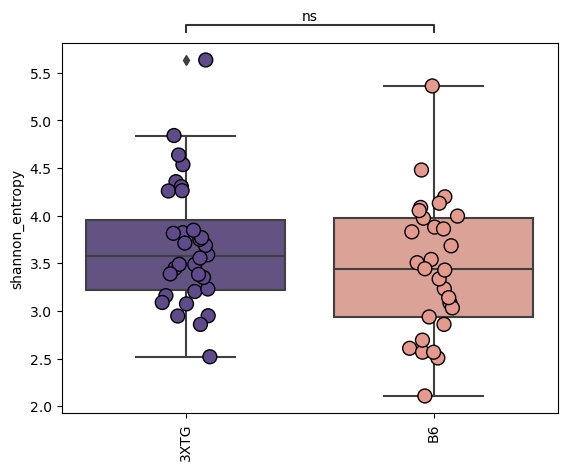

In [28]:
g = sns.boxplot(data=sac_shann_md, x='genotype', y='shannon_entropy',
               palette=['#5F4B8B', '#E69A8D'])
g = sns.stripplot(data=sac_shann_md, x='genotype', y='shannon_entropy', 
               palette=['#5F4B8B', '#E69A8D'],
                 s=10, edgecolor='k', linewidth=1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


pairs=[('B6', '3XTG')]

annotator = Annotator(g, pairs, data=sac_shann_md, x='genotype', y='shannon_entropy')
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

plt.xlabel("")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_sac-only_shannon_genotype_boxplot.svg',
           bbox_inches='tight', dpi=150)

# Beta Diversity

In [16]:
RPCA_ord = pd.read_csv('../data/Microbiome/pooling_filtered/RPCA_all/all_RPCA_ordination/ordination_reformat.txt', sep='\t', index_col=0)
RPCA_ord.head()

Axis1_50.7  Axis2_44.7  Axis3_4.7
14748.CAGE41.FSPF3XTG.L10.1   -0.068240    0.059617   0.044093
14748.CAGE21.FSPF3XTG.L9.2    -0.021796    0.000301  -0.042395
14748.CAGE41.FSPF3XTG.L2.2    -0.016520    0.033998   0.000852
14748.CAGE40.FSPF3XTG.L10.1   -0.029531   -0.022069  -0.042450
14748.CAGE41.FSPF3XTG.L7.1    -0.066410    0.040777  -0.030092

In [17]:
RPCA_md = pd.merge(RPCA_ord, metadata, left_index=True, right_index=True)
RPCA_md.head()

Axis1_50.7  Axis2_44.7  Axis3_4.7  \
14748.CAGE41.FSPF3XTG.L10.1   -0.068240    0.059617   0.044093   
14748.CAGE21.FSPF3XTG.L9.2    -0.021796    0.000301  -0.042395   
14748.CAGE41.FSPF3XTG.L2.2    -0.016520    0.033998   0.000852   
14748.CAGE40.FSPF3XTG.L10.1   -0.029531   -0.022069  -0.042450   
14748.CAGE41.FSPF3XTG.L7.1    -0.066410    0.040777  -0.030092   

                                   anonymized_name collection_timestamp  \
14748.CAGE41.FSPF3XTG.L10.1  CAGE41.FSPF3XTG.L10.1              3/10/21   
14748.CAGE21.FSPF3XTG.L9.2    CAGE21.FSPF3XTG.L9.2             11/23/20   
14748.CAGE41.FSPF3XTG.L2.2    CAGE41.FSPF3XTG.L2.2              6/30/20   
14748.CAGE40.FSPF3XTG.L10.1  CAGE40.FSPF3XTG.L10.1              3/10/21   
14748.CAGE41.FSPF3XTG.L7.1    CAGE41.FSPF3XTG.L7.1              12/1/20   

                            description  dna_extracted  elevation  \
14748.CAGE41.FSPF3XTG.L10.1         NaN          False        263   
14748.CAGE21.FSPF3XTG.L9.2          NaN          False        263   
14748.CAGE41.FSPF3XTG.L2.2          NaN          False        263   
14748.CAGE40.FSPF3XTG.L10.1         NaN          False        263   
14748.CAGE41.FSPF3XTG.L7.1          NaN          False        263   

                                      empo_1  empo_2  ...  \
14748.CAGE41.FSPF3XTG.L10.1  Host-associated  Animal  ...   
14748.CAGE21.FSPF3XTG.L9.2   Host-associated  Animal  ...   
14748.CAGE41.FSPF3XTG.L2.2   Host-associated  Animal  ...   
14748.CAGE40.FSPF3XTG.L10.1  Host-associated  Animal  ...   
14748.CAGE41.FSPF3XTG.L7.1   Host-associated  Animal  ...   

                                  scientific_name     sex    study_type  \
14748.CAGE41.FSPF3XTG.L10.1  mouse gut metagenome  female  Longitudinal   
14748.CAGE21.FSPF3XTG.L9.2   mouse gut metagenome  female  Longitudinal   
14748.CAGE41.FSPF3XTG.L2.2   mouse gut metagenome  female  Longitudinal   
14748.CAGE40.FSPF3XTG.L10.1  mouse gut metagenome  female  Longitudinal   
14748.CAGE41.FSPF3XTG.L7.1   mouse gut metagenome  female  Longitudinal   

                            taxon_id  \
14748.CAGE41.FSPF3XTG.L10.1   410661   
14748.CAGE21.FSPF3XTG.L9.2    410661   
14748.CAGE41.FSPF3XTG.L2.2    410661   
14748.CAGE40.FSPF3XTG.L10.1   410661   
14748.CAGE41.FSPF3XTG.L7.1    410661   

                                                                         title  \
14748.CAGE41.FSPF3XTG.L10.1  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE21.FSPF3XTG.L9.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE41.FSPF3XTG.L2.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE40.FSPF3XTG.L10.1  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE41.FSPF3XTG.L7.1   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   

                               tube_id  keep  genotype_sex    cohort  \
14748.CAGE41.FSPF3XTG.L10.1  363130500  True   3XTG_female  COHORT 6   
14748.CAGE21.FSPF3XTG.L9.2   363132072  True   3XTG_female  COHORT 4   
14748.CAGE41.FSPF3XTG.L2.2   363131324  True   3XTG_female  COHORT 6   
14748.CAGE40.FSPF3XTG.L10.1  363130487  True   3XTG_female  COHORT 6   
14748.CAGE41.FSPF3XTG.L7.1   363130482  True   3XTG_female  COHORT 6   

                            genotype_tp  
14748.CAGE41.FSPF3XTG.L10.1     3XTG_10  
14748.CAGE21.FSPF3XTG.L9.2       3XTG_9  
14748.CAGE41.FSPF3XTG.L2.2       3XTG_2  
14748.CAGE40.FSPF3XTG.L10.1     3XTG_10  
14748.CAGE41.FSPF3XTG.L7.1       3XTG_7  

[5 rows x 43 columns]

In [18]:
RPCA_md.genotype_sex.unique()

array(['3XTG_female', '3XTG_male', 'B6_male', 'B6_female'], dtype=object)

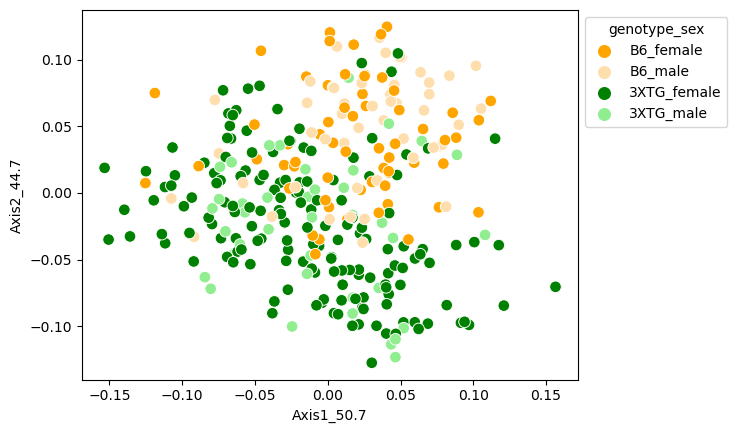

In [45]:
g = sns.scatterplot(data=RPCA_md, x='Axis1_50.7', y='Axis2_44.7', 
                hue='genotype_sex', hue_order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'navajowhite', 'green', 'lightgreen'], 
                    size='genotype_sex', sizes=[70,70,70,70])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3xTG_RPCA_scatterplot.svg',
           bbox_inches='tight', dpi=150)

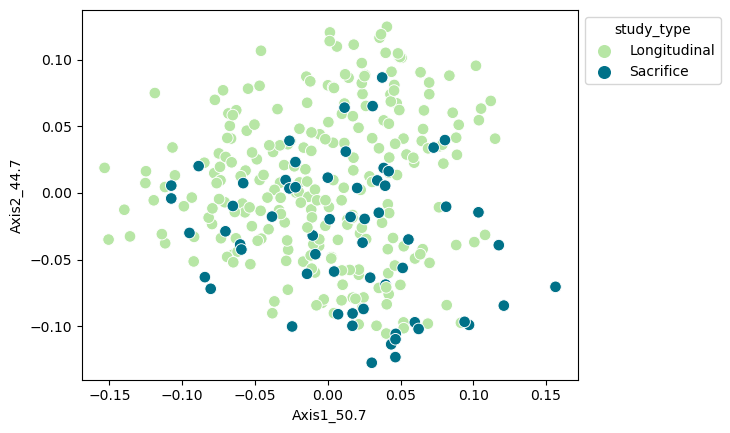

In [23]:
g = sns.scatterplot(data=RPCA_md, x='Axis1_50.7', y='Axis2_44.7', 
                hue='study_type',
               palette=['#B7E6A5', '#007188'], size='study_type', sizes=[70,70])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3xTG_RPCA_scatterplot_studytype_newcolors.svg',
           bbox_inches='tight', dpi=150)

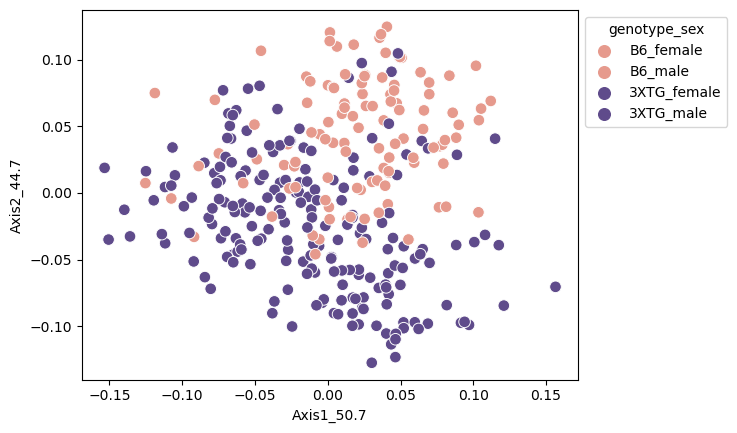

In [25]:
g = sns.scatterplot(data=RPCA_md, x='Axis1_50.7', y='Axis2_44.7', 
                hue='genotype_sex', hue_order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['#E69A8D', '#E69A8D', '#5F4B8B', '#5F4B8B'], size='genotype_sex', sizes=[70,70,70,70])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3xTG_RPCA_scatterplot_newcolors.svg',
           bbox_inches='tight', dpi=150)

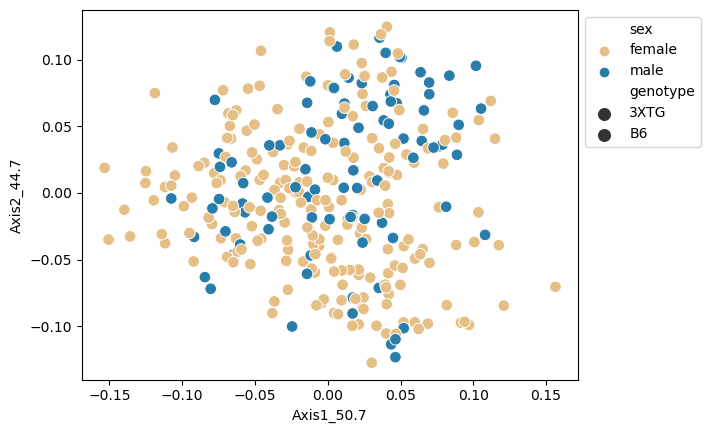

In [26]:
g = sns.scatterplot(data=RPCA_md, x='Axis1_50.7', y='Axis2_44.7', 
                hue='sex',
               palette=['#E5BF86', '#287DAB'], size='genotype', sizes=[70,70])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3xTG_RPCA_scatterplot_sex_newcolors.svg',
           bbox_inches='tight', dpi=150)

In [27]:
RPCA_md['host_age'] = pd.to_numeric(RPCA_md['host_age'])

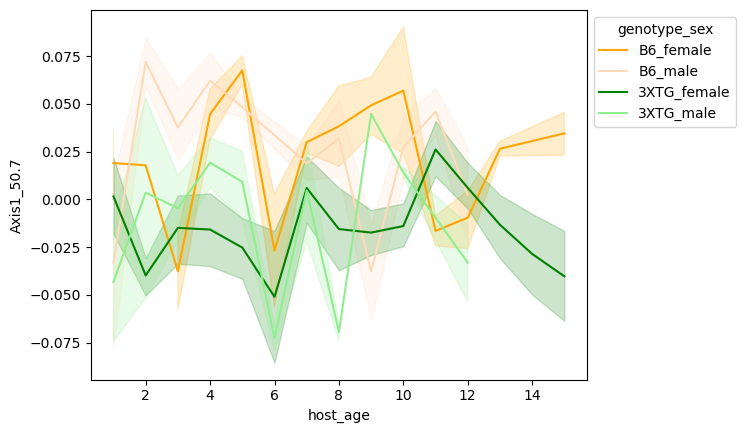

In [28]:
g = sns.lineplot(data=RPCA_md, x='host_age', y='Axis1_50.7', ci=68,
                hue='genotype_sex', hue_order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_RPCA_Axis1_lineplot.svg',
           bbox_inches='tight', dpi=150)

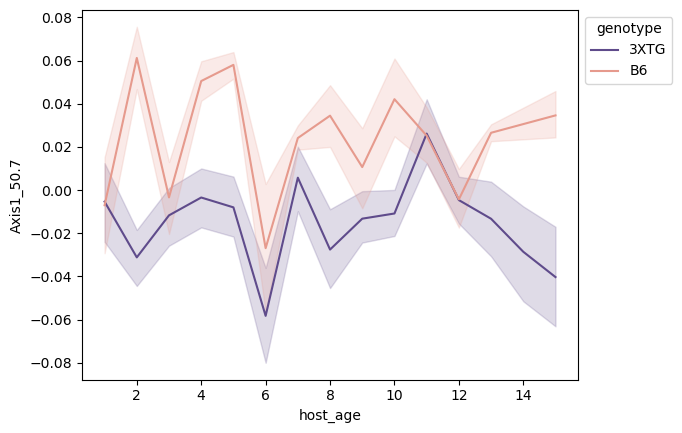

In [29]:
g = sns.lineplot(data=RPCA_md, x='host_age', y='Axis1_50.7', ci=68,
                hue='genotype',
               palette=['#5F4B8B', '#E69A8D'])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_RPCA_Axis1_lineplot_newcolors.svg',
           bbox_inches='tight', dpi=150)

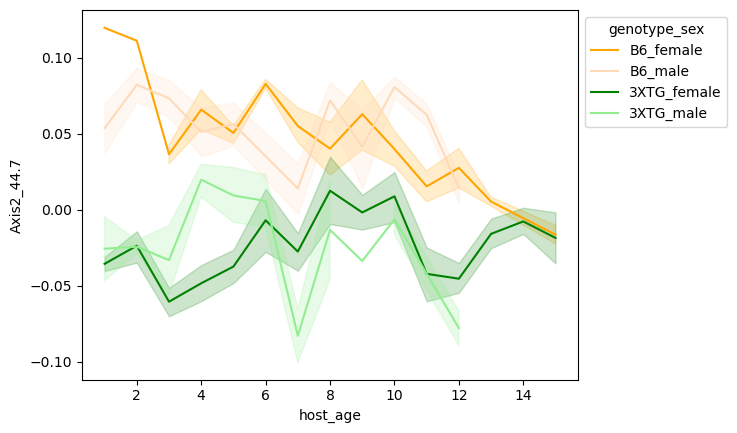

In [30]:
g = sns.lineplot(data=RPCA_md, x='host_age', y='Axis2_44.7', ci=68,
                hue='genotype_sex', hue_order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_RPCA_Axis2_lineplot.svg',
           bbox_inches='tight', dpi=150)

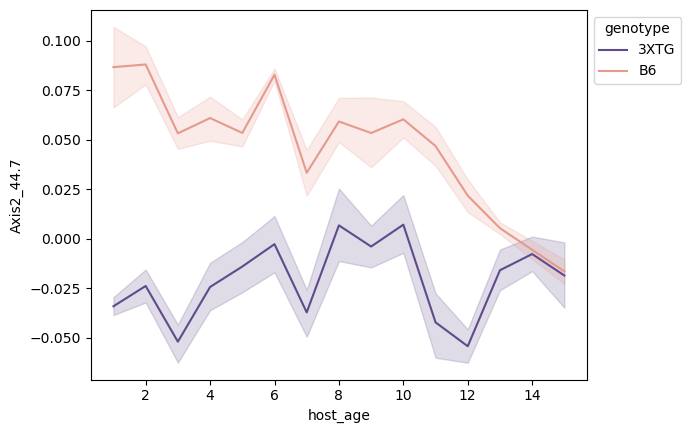

In [31]:
g = sns.lineplot(data=RPCA_md, x='host_age', y='Axis2_44.7', ci=68,
                hue='genotype',
               palette=['#5F4B8B', '#E69A8D'])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_RPCA_Axis2_lineplot_newcolors.svg',
           bbox_inches='tight', dpi=150)

In [32]:
phyloRPCA_ord = pd.read_csv('../data/Microbiome/pooling_filtered/RPCA_all/phyloRPCA-ordination/ordination_reformat.txt', sep='\t', index_col=0)
phyloRPCA_ord.head()

Axis1_62.5  Axis2_34.4  Axis3_3.1
14748.CAGE41.FSPF3XTG.L10.1   -0.055865    0.032925   0.000208
14748.CAGE21.FSPF3XTG.L9.2    -0.035436   -0.030916  -0.026499
14748.CAGE41.FSPF3XTG.L2.2    -0.042683    0.008634  -0.015241
14748.CAGE40.FSPF3XTG.L10.1   -0.003422   -0.014551  -0.078893
14748.CAGE41.FSPF3XTG.L7.1    -0.047660    0.010850  -0.016599

In [33]:
phyloRPCA_md = pd.merge(phyloRPCA_ord, metadata, left_index=True, right_index=True)
phyloRPCA_md.head()

Axis1_62.5  Axis2_34.4  Axis3_3.1  \
14748.CAGE41.FSPF3XTG.L10.1   -0.055865    0.032925   0.000208   
14748.CAGE21.FSPF3XTG.L9.2    -0.035436   -0.030916  -0.026499   
14748.CAGE41.FSPF3XTG.L2.2    -0.042683    0.008634  -0.015241   
14748.CAGE40.FSPF3XTG.L10.1   -0.003422   -0.014551  -0.078893   
14748.CAGE41.FSPF3XTG.L7.1    -0.047660    0.010850  -0.016599   

                                   anonymized_name collection_timestamp  \
14748.CAGE41.FSPF3XTG.L10.1  CAGE41.FSPF3XTG.L10.1              3/10/21   
14748.CAGE21.FSPF3XTG.L9.2    CAGE21.FSPF3XTG.L9.2             11/23/20   
14748.CAGE41.FSPF3XTG.L2.2    CAGE41.FSPF3XTG.L2.2              6/30/20   
14748.CAGE40.FSPF3XTG.L10.1  CAGE40.FSPF3XTG.L10.1              3/10/21   
14748.CAGE41.FSPF3XTG.L7.1    CAGE41.FSPF3XTG.L7.1              12/1/20   

                            description  dna_extracted  elevation  \
14748.CAGE41.FSPF3XTG.L10.1         NaN          False        263   
14748.CAGE21.FSPF3XTG.L9.2          NaN          False        263   
14748.CAGE41.FSPF3XTG.L2.2          NaN          False        263   
14748.CAGE40.FSPF3XTG.L10.1         NaN          False        263   
14748.CAGE41.FSPF3XTG.L7.1          NaN          False        263   

                                      empo_1  empo_2  ...  \
14748.CAGE41.FSPF3XTG.L10.1  Host-associated  Animal  ...   
14748.CAGE21.FSPF3XTG.L9.2   Host-associated  Animal  ...   
14748.CAGE41.FSPF3XTG.L2.2   Host-associated  Animal  ...   
14748.CAGE40.FSPF3XTG.L10.1  Host-associated  Animal  ...   
14748.CAGE41.FSPF3XTG.L7.1   Host-associated  Animal  ...   

                                  scientific_name     sex    study_type  \
14748.CAGE41.FSPF3XTG.L10.1  mouse gut metagenome  female  Longitudinal   
14748.CAGE21.FSPF3XTG.L9.2   mouse gut metagenome  female  Longitudinal   
14748.CAGE41.FSPF3XTG.L2.2   mouse gut metagenome  female  Longitudinal   
14748.CAGE40.FSPF3XTG.L10.1  mouse gut metagenome  female  Longitudinal   
14748.CAGE41.FSPF3XTG.L7.1   mouse gut metagenome  female  Longitudinal   

                            taxon_id  \
14748.CAGE41.FSPF3XTG.L10.1   410661   
14748.CAGE21.FSPF3XTG.L9.2    410661   
14748.CAGE41.FSPF3XTG.L2.2    410661   
14748.CAGE40.FSPF3XTG.L10.1   410661   
14748.CAGE41.FSPF3XTG.L7.1    410661   

                                                                         title  \
14748.CAGE41.FSPF3XTG.L10.1  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE21.FSPF3XTG.L9.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE41.FSPF3XTG.L2.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE40.FSPF3XTG.L10.1  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE41.FSPF3XTG.L7.1   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   

                               tube_id  keep  genotype_sex    cohort  \
14748.CAGE41.FSPF3XTG.L10.1  363130500  True   3XTG_female  COHORT 6   
14748.CAGE21.FSPF3XTG.L9.2   363132072  True   3XTG_female  COHORT 4   
14748.CAGE41.FSPF3XTG.L2.2   363131324  True   3XTG_female  COHORT 6   
14748.CAGE40.FSPF3XTG.L10.1  363130487  True   3XTG_female  COHORT 6   
14748.CAGE41.FSPF3XTG.L7.1   363130482  True   3XTG_female  COHORT 6   

                            genotype_tp  
14748.CAGE41.FSPF3XTG.L10.1     3XTG_10  
14748.CAGE21.FSPF3XTG.L9.2       3XTG_9  
14748.CAGE41.FSPF3XTG.L2.2       3XTG_2  
14748.CAGE40.FSPF3XTG.L10.1     3XTG_10  
14748.CAGE41.FSPF3XTG.L7.1       3XTG_7  

[5 rows x 43 columns]

In [34]:
phyloRPCA_md.genotype_sex.unique()

array(['3XTG_female', '3XTG_male', 'B6_male', 'B6_female'], dtype=object)

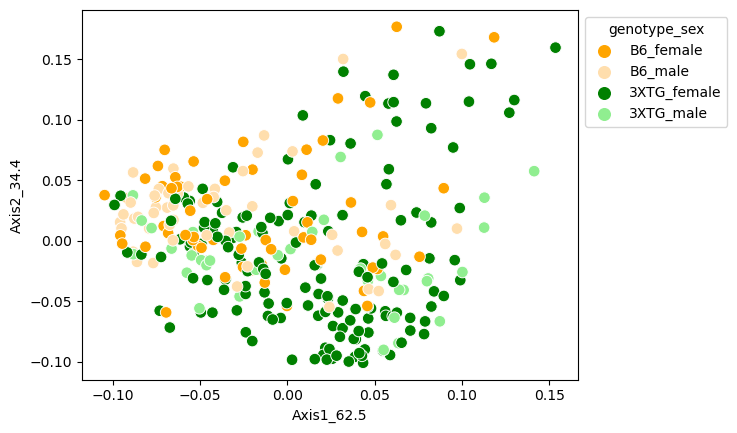

In [44]:
g = sns.scatterplot(data=phyloRPCA_md, x='Axis1_62.5', y='Axis2_34.4', size='genotype_sex',
                hue='genotype_sex', hue_order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'navajowhite', 'green', 'lightgreen'], sizes=[70,70,70,70])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3xTG_phyloRPCA_scatterplot.svg',
           bbox_inches='tight', dpi=150)

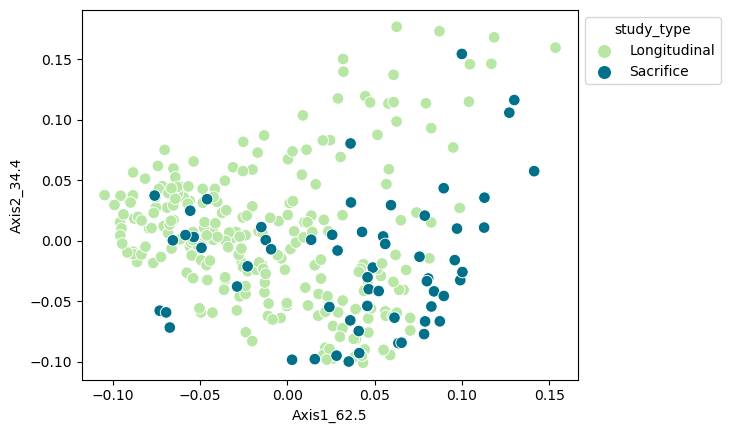

In [47]:
g = sns.scatterplot(data=phyloRPCA_md, x='Axis1_62.5', y='Axis2_34.4', 
                hue='study_type',
               palette=['#B7E6A5', '#007188'], size='study_type', sizes=[70,70])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3xTG_phyloRPCA_scatterplot_studytype_newcolors.svg',
           bbox_inches='tight', dpi=150)

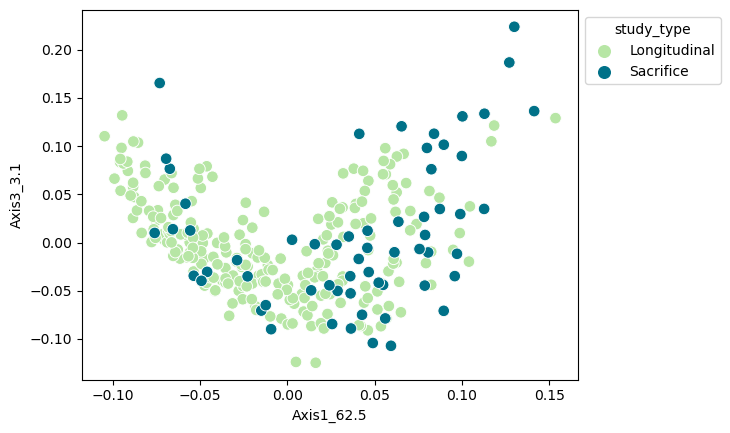

In [52]:
g = sns.scatterplot(data=phyloRPCA_md, x='Axis1_62.5', y='Axis3_3.1', 
                hue='study_type',
               palette=['#B7E6A5', '#007188'], size='study_type', sizes=[70,70])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/3xTG_phyloRPCA_scatterplot_studytype_newcolors.svg',
#           bbox_inches='tight', dpi=150)

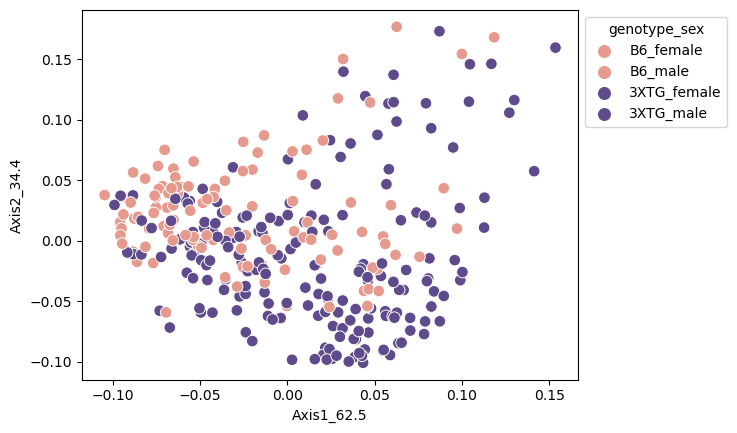

In [48]:
g = sns.scatterplot(data=phyloRPCA_md, x='Axis1_62.5', y='Axis2_34.4', 
                hue='genotype_sex', hue_order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['#E69A8D', '#E69A8D', '#5F4B8B', '#5F4B8B'], size='genotype_sex', sizes=[70,70,70,70])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3xTG_phyloRPCA_scatterplot_newcolors.svg',
           bbox_inches='tight', dpi=150)

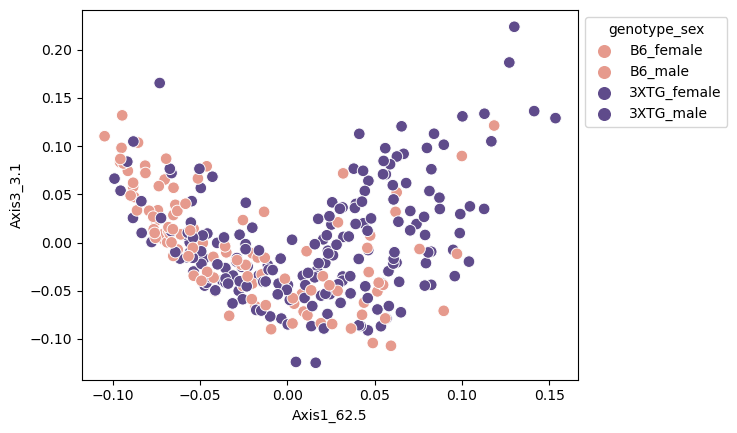

In [51]:
g = sns.scatterplot(data=phyloRPCA_md, x='Axis1_62.5', y='Axis3_3.1', 
                hue='genotype_sex', hue_order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['#E69A8D', '#E69A8D', '#5F4B8B', '#5F4B8B'], size='genotype_sex', sizes=[70,70,70,70])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/3xTG_phyloRPCA_scatterplot_newcolors.svg',
#           bbox_inches='tight', dpi=150)

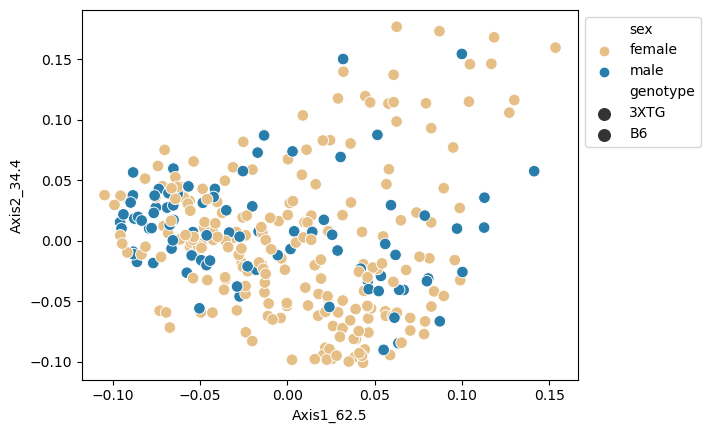

In [49]:
g = sns.scatterplot(data=phyloRPCA_md, x='Axis1_62.5', y='Axis2_34.4', 
                hue='sex',
               palette=['#E5BF86', '#287DAB'], size='genotype', sizes=[70,70])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3xTG_phyloRPCA_scatterplot_sex_newcolors.svg',
           bbox_inches='tight', dpi=150)

In [17]:
phyloRPCA_md['host_age'] = pd.to_numeric(phyloRPCA_md['host_age'])

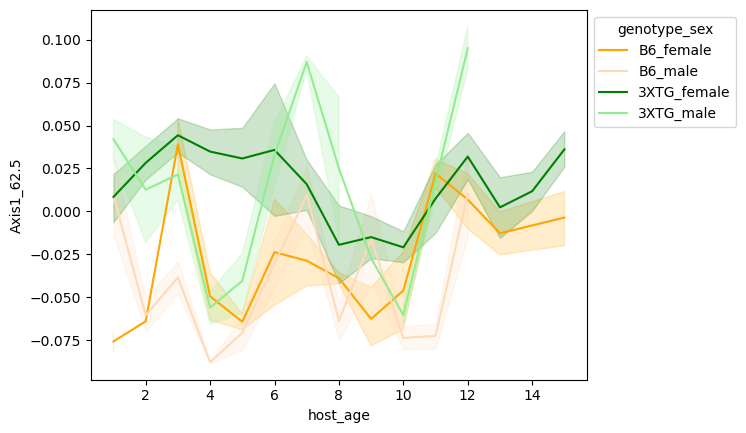

In [37]:
g = sns.lineplot(data=phyloRPCA_md, x='host_age', y='Axis1_62.5', ci=68,
                hue='genotype_sex', hue_order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_phyloRPCA_Axis1_lineplot.svg',
           bbox_inches='tight', dpi=150)

In [38]:
wUF_ord = pd.read_csv('../data/Microbiome/pooling_filtered/all_2000filt_348000rar_core_diversity/weighted_unifrac_pcoa/ordination_reformat.txt', 
                      sep='\t', index_col=0)
wUF_ord.head()

Axis1_0.556  Axis2_0.074  Axis3_0.059
Site                                                              
14748.CAGE41.FSPF3XTG.L10.1    -0.719032    -0.118922    -0.049127
14748.CAGE21.FSPF3XTG.L9.2     -0.034222    -0.041526    -0.031438
14748.CAGE42.MSPF3XTG.L9.1      0.212725    -0.116344     0.136938
14748.CAGE41.FSPF3XTG.L2.2      0.090942    -0.065813    -0.022855
14748.CAGE69.MSPF3XTG.L5.2     -0.329095     0.022905    -0.047166

In [39]:
wUF_md = pd.merge(wUF_ord, metadata, left_index=True, right_index=True)
wUF_md.head()

Axis1_0.556  Axis2_0.074  Axis3_0.059  \
14748.CAGE41.FSPF3XTG.L10.1    -0.719032    -0.118922    -0.049127   
14748.CAGE21.FSPF3XTG.L9.2     -0.034222    -0.041526    -0.031438   
14748.CAGE42.MSPF3XTG.L9.1      0.212725    -0.116344     0.136938   
14748.CAGE41.FSPF3XTG.L2.2      0.090942    -0.065813    -0.022855   
14748.CAGE69.MSPF3XTG.L5.2     -0.329095     0.022905    -0.047166   

                                   anonymized_name collection_timestamp  \
14748.CAGE41.FSPF3XTG.L10.1  CAGE41.FSPF3XTG.L10.1              3/10/21   
14748.CAGE21.FSPF3XTG.L9.2    CAGE21.FSPF3XTG.L9.2             11/23/20   
14748.CAGE42.MSPF3XTG.L9.1    CAGE42.MSPF3XTG.L9.1              2/10/21   
14748.CAGE41.FSPF3XTG.L2.2    CAGE41.FSPF3XTG.L2.2              6/30/20   
14748.CAGE69.MSPF3XTG.L5.2    CAGE69.MSPF3XTG.L5.2              1/10/21   

                            description  dna_extracted  elevation  \
14748.CAGE41.FSPF3XTG.L10.1         NaN          False        263   
14748.CAGE21.FSPF3XTG.L9.2          NaN          False        263   
14748.CAGE42.MSPF3XTG.L9.1          NaN          False        263   
14748.CAGE41.FSPF3XTG.L2.2          NaN          False        263   
14748.CAGE69.MSPF3XTG.L5.2          NaN          False        263   

                                      empo_1  empo_2  ...  \
14748.CAGE41.FSPF3XTG.L10.1  Host-associated  Animal  ...   
14748.CAGE21.FSPF3XTG.L9.2   Host-associated  Animal  ...   
14748.CAGE42.MSPF3XTG.L9.1   Host-associated  Animal  ...   
14748.CAGE41.FSPF3XTG.L2.2   Host-associated  Animal  ...   
14748.CAGE69.MSPF3XTG.L5.2   Host-associated  Animal  ...   

                                  scientific_name     sex    study_type  \
14748.CAGE41.FSPF3XTG.L10.1  mouse gut metagenome  female  Longitudinal   
14748.CAGE21.FSPF3XTG.L9.2   mouse gut metagenome  female  Longitudinal   
14748.CAGE42.MSPF3XTG.L9.1   mouse gut metagenome    male  Longitudinal   
14748.CAGE41.FSPF3XTG.L2.2   mouse gut metagenome  female  Longitudinal   
14748.CAGE69.MSPF3XTG.L5.2   mouse gut metagenome    male  Longitudinal   

                            taxon_id  \
14748.CAGE41.FSPF3XTG.L10.1   410661   
14748.CAGE21.FSPF3XTG.L9.2    410661   
14748.CAGE42.MSPF3XTG.L9.1    410661   
14748.CAGE41.FSPF3XTG.L2.2    410661   
14748.CAGE69.MSPF3XTG.L5.2    410661   

                                                                         title  \
14748.CAGE41.FSPF3XTG.L10.1  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE21.FSPF3XTG.L9.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE42.MSPF3XTG.L9.1   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE41.FSPF3XTG.L2.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE69.MSPF3XTG.L5.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   

                               tube_id  keep  genotype_sex    cohort  \
14748.CAGE41.FSPF3XTG.L10.1  363130500  True   3XTG_female  COHORT 6   
14748.CAGE21.FSPF3XTG.L9.2   363132072  True   3XTG_female  COHORT 4   
14748.CAGE42.MSPF3XTG.L9.1   363130499  True     3XTG_male  COHORT 6   
14748.CAGE41.FSPF3XTG.L2.2   363131324  True   3XTG_female  COHORT 6   
14748.CAGE69.MSPF3XTG.L5.2   363132055  True     3XTG_male  COHORT 5   

                            genotype_tp  
14748.CAGE41.FSPF3XTG.L10.1     3XTG_10  
14748.CAGE21.FSPF3XTG.L9.2       3XTG_9  
14748.CAGE42.MSPF3XTG.L9.1       3XTG_9  
14748.CAGE41.FSPF3XTG.L2.2       3XTG_2  
14748.CAGE69.MSPF3XTG.L5.2       3XTG_5  

[5 rows x 43 columns]

In [40]:
wUF_md.genotype_sex.unique()

array(['3XTG_female', '3XTG_male', 'B6_female', 'B6_male'], dtype=object)

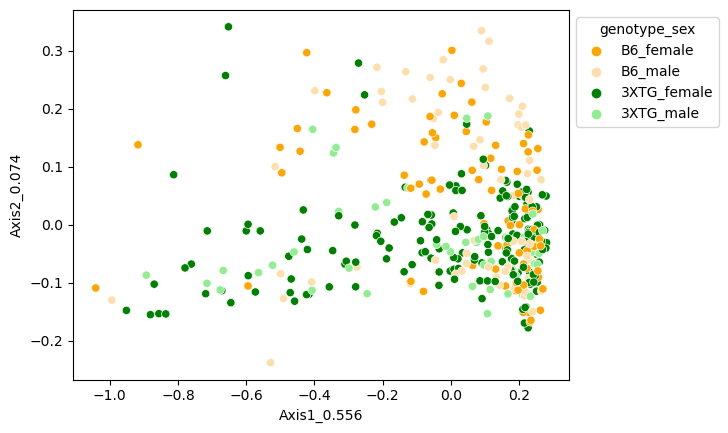

In [41]:
g = sns.scatterplot(data=wUF_md, x='Axis1_0.556', y='Axis2_0.074', 
                hue='genotype_sex', hue_order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'navajowhite', 'green', 'lightgreen'])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3xTG_wUF_scatterplot.png',
           bbox_inches='tight', dpi=150)

In [42]:
wUF_md['host_age'] = pd.to_numeric(wUF_md['host_age'])

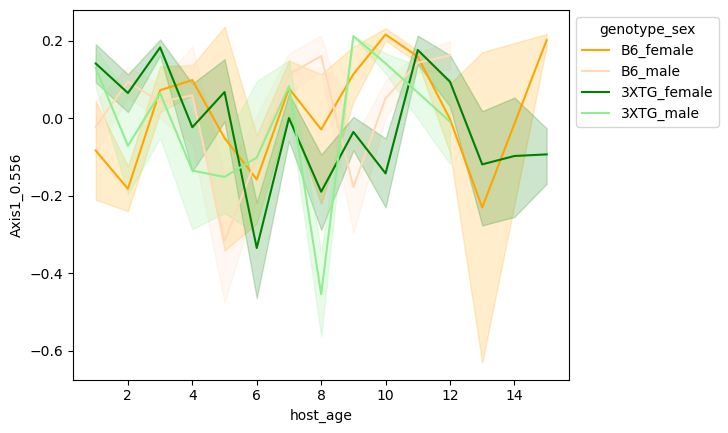

In [43]:
g = sns.lineplot(data=wUF_md, x='host_age', y='Axis1_0.556', ci=68,
                hue='genotype_sex', hue_order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_wUF_Axis1_lineplot.png',
           bbox_inches='tight', dpi=150)

In [16]:
RPCA_ord = pd.read_csv('../data/Microbiome/pooling_filtered/RPCA_all/all_RPCA_ordination/ordination_reformat.txt', sep='\t', index_col=0)
RPCA_ord.head()

Axis1_50.7  Axis2_44.7  Axis3_4.7
14748.CAGE41.FSPF3XTG.L10.1   -0.068240    0.059617   0.044093
14748.CAGE21.FSPF3XTG.L9.2    -0.021796    0.000301  -0.042395
14748.CAGE41.FSPF3XTG.L2.2    -0.016520    0.033998   0.000852
14748.CAGE40.FSPF3XTG.L10.1   -0.029531   -0.022069  -0.042450
14748.CAGE41.FSPF3XTG.L7.1    -0.066410    0.040777  -0.030092

In [17]:
RPCA_md = pd.merge(RPCA_ord, metadata, left_index=True, right_index=True)
RPCA_md.head()

Axis1_50.7  Axis2_44.7  Axis3_4.7  \
14748.CAGE41.FSPF3XTG.L10.1   -0.068240    0.059617   0.044093   
14748.CAGE21.FSPF3XTG.L9.2    -0.021796    0.000301  -0.042395   
14748.CAGE41.FSPF3XTG.L2.2    -0.016520    0.033998   0.000852   
14748.CAGE40.FSPF3XTG.L10.1   -0.029531   -0.022069  -0.042450   
14748.CAGE41.FSPF3XTG.L7.1    -0.066410    0.040777  -0.030092   

                                   anonymized_name collection_timestamp  \
14748.CAGE41.FSPF3XTG.L10.1  CAGE41.FSPF3XTG.L10.1              3/10/21   
14748.CAGE21.FSPF3XTG.L9.2    CAGE21.FSPF3XTG.L9.2             11/23/20   
14748.CAGE41.FSPF3XTG.L2.2    CAGE41.FSPF3XTG.L2.2              6/30/20   
14748.CAGE40.FSPF3XTG.L10.1  CAGE40.FSPF3XTG.L10.1              3/10/21   
14748.CAGE41.FSPF3XTG.L7.1    CAGE41.FSPF3XTG.L7.1              12/1/20   

                            description  dna_extracted  elevation  \
14748.CAGE41.FSPF3XTG.L10.1         NaN          False        263   
14748.CAGE21.FSPF3XTG.L9.2          NaN          False        263   
14748.CAGE41.FSPF3XTG.L2.2          NaN          False        263   
14748.CAGE40.FSPF3XTG.L10.1         NaN          False        263   
14748.CAGE41.FSPF3XTG.L7.1          NaN          False        263   

                                      empo_1  empo_2  ...  \
14748.CAGE41.FSPF3XTG.L10.1  Host-associated  Animal  ...   
14748.CAGE21.FSPF3XTG.L9.2   Host-associated  Animal  ...   
14748.CAGE41.FSPF3XTG.L2.2   Host-associated  Animal  ...   
14748.CAGE40.FSPF3XTG.L10.1  Host-associated  Animal  ...   
14748.CAGE41.FSPF3XTG.L7.1   Host-associated  Animal  ...   

                                  scientific_name     sex    study_type  \
14748.CAGE41.FSPF3XTG.L10.1  mouse gut metagenome  female  Longitudinal   
14748.CAGE21.FSPF3XTG.L9.2   mouse gut metagenome  female  Longitudinal   
14748.CAGE41.FSPF3XTG.L2.2   mouse gut metagenome  female  Longitudinal   
14748.CAGE40.FSPF3XTG.L10.1  mouse gut metagenome  female  Longitudinal   
14748.CAGE41.FSPF3XTG.L7.1   mouse gut metagenome  female  Longitudinal   

                            taxon_id  \
14748.CAGE41.FSPF3XTG.L10.1   410661   
14748.CAGE21.FSPF3XTG.L9.2    410661   
14748.CAGE41.FSPF3XTG.L2.2    410661   
14748.CAGE40.FSPF3XTG.L10.1   410661   
14748.CAGE41.FSPF3XTG.L7.1    410661   

                                                                         title  \
14748.CAGE41.FSPF3XTG.L10.1  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE21.FSPF3XTG.L9.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE41.FSPF3XTG.L2.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE40.FSPF3XTG.L10.1  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE41.FSPF3XTG.L7.1   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   

                               tube_id  keep  genotype_sex    cohort  \
14748.CAGE41.FSPF3XTG.L10.1  363130500  True   3XTG_female  COHORT 6   
14748.CAGE21.FSPF3XTG.L9.2   363132072  True   3XTG_female  COHORT 4   
14748.CAGE41.FSPF3XTG.L2.2   363131324  True   3XTG_female  COHORT 6   
14748.CAGE40.FSPF3XTG.L10.1  363130487  True   3XTG_female  COHORT 6   
14748.CAGE41.FSPF3XTG.L7.1   363130482  True   3XTG_female  COHORT 6   

                            genotype_tp  
14748.CAGE41.FSPF3XTG.L10.1     3XTG_10  
14748.CAGE21.FSPF3XTG.L9.2       3XTG_9  
14748.CAGE41.FSPF3XTG.L2.2       3XTG_2  
14748.CAGE40.FSPF3XTG.L10.1     3XTG_10  
14748.CAGE41.FSPF3XTG.L7.1       3XTG_7  

[5 rows x 43 columns]

### Sacrifice Timepoints Only

In [5]:
sac_phyloRPCA_ord = pd.read_csv('../data/Microbiome/pooling_filtered/sacrifice/RPCA/sac-phyloRPCA-ordination/ordination_reformat.txt', sep='\t', index_col=0)
sac_phyloRPCA_ord.head()

Axis1_63.9  Axis2_30.7  Axis3_5.3
14748.MOUSE103.CAGE68.MSPF3XTG.S7   -0.092612   -0.061681   0.179536
14748.MOUSE10.CAGE3.FSPF3XTG.S15     0.121381   -0.221238  -0.120038
14748.MOUSE17.CAGE1.FSPF3XTG.S15     0.045355   -0.113836  -0.042350
14748.MOUSE13.CAGE6.FSPFB6.S15      -0.102746    0.064657  -0.051230
14748.MOUSE14.CAGE6.FSPFB6.S15      -0.042722    0.100547  -0.210869

In [6]:
sac_phyloRPCA_ord_md = pd.merge(sac_phyloRPCA_ord, metadata, left_index=True, right_index=True)
sac_phyloRPCA_ord_md.head()

Axis1_63.9  Axis2_30.7  Axis3_5.3  \
14748.MOUSE103.CAGE68.MSPF3XTG.S7   -0.092612   -0.061681   0.179536   
14748.MOUSE10.CAGE3.FSPF3XTG.S15     0.121381   -0.221238  -0.120038   
14748.MOUSE17.CAGE1.FSPF3XTG.S15     0.045355   -0.113836  -0.042350   
14748.MOUSE13.CAGE6.FSPFB6.S15      -0.102746    0.064657  -0.051230   
14748.MOUSE14.CAGE6.FSPFB6.S15      -0.042722    0.100547  -0.210869   

                                               anonymized_name  \
14748.MOUSE103.CAGE68.MSPF3XTG.S7  MOUSE103.CAGE68.MSPF3XTG.S7   
14748.MOUSE10.CAGE3.FSPF3XTG.S15    MOUSE10.CAGE3.FSPF3XTG.S15   
14748.MOUSE17.CAGE1.FSPF3XTG.S15    MOUSE17.CAGE1.FSPF3XTG.S15   
14748.MOUSE13.CAGE6.FSPFB6.S15        MOUSE13.CAGE6.FSPFB6.S15   
14748.MOUSE14.CAGE6.FSPFB6.S15        MOUSE14.CAGE6.FSPFB6.S15   

                                  collection_timestamp description  \
14748.MOUSE103.CAGE68.MSPF3XTG.S7              2/24/21         NaN   
14748.MOUSE10.CAGE3.FSPF3XTG.S15               9/18/20         NaN   
14748.MOUSE17.CAGE1.FSPF3XTG.S15               9/11/20         NaN   
14748.MOUSE13.CAGE6.FSPFB6.S15                 9/18/20         NaN   
14748.MOUSE14.CAGE6.FSPFB6.S15                 9/18/20         NaN   

                                   dna_extracted  elevation           empo_1  \
14748.MOUSE103.CAGE68.MSPF3XTG.S7          False        263  Host-associated   
14748.MOUSE10.CAGE3.FSPF3XTG.S15           False        263  Host-associated   
14748.MOUSE17.CAGE1.FSPF3XTG.S15           False        263  Host-associated   
14748.MOUSE13.CAGE6.FSPFB6.S15             False        263  Host-associated   
14748.MOUSE14.CAGE6.FSPFB6.S15             False        263  Host-associated   

                                   empo_2  ...       scientific_name     sex  \
14748.MOUSE103.CAGE68.MSPF3XTG.S7  Animal  ...  mouse gut metagenome    male   
14748.MOUSE10.CAGE3.FSPF3XTG.S15   Animal  ...  mouse gut metagenome  female   
14748.MOUSE17.CAGE1.FSPF3XTG.S15   Animal  ...  mouse gut metagenome  female   
14748.MOUSE13.CAGE6.FSPFB6.S15     Animal  ...  mouse gut metagenome  female   
14748.MOUSE14.CAGE6.FSPFB6.S15     Animal  ...  mouse gut metagenome  female   

                                  study_type taxon_id  \
14748.MOUSE103.CAGE68.MSPF3XTG.S7  Sacrifice   410661   
14748.MOUSE10.CAGE3.FSPF3XTG.S15   Sacrifice   410661   
14748.MOUSE17.CAGE1.FSPF3XTG.S15   Sacrifice   410661   
14748.MOUSE13.CAGE6.FSPFB6.S15     Sacrifice   410661   
14748.MOUSE14.CAGE6.FSPFB6.S15     Sacrifice   410661   

                                                                               title  \
14748.MOUSE103.CAGE68.MSPF3XTG.S7  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.MOUSE10.CAGE3.FSPF3XTG.S15   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.MOUSE17.CAGE1.FSPF3XTG.S15   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.MOUSE13.CAGE6.FSPFB6.S15     Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.MOUSE14.CAGE6.FSPFB6.S15     Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   

                                     tube_id  keep  genotype_sex    cohort  \
14748.MOUSE103.CAGE68.MSPF3XTG.S7  363192956  True     3XTG_male  COHORT 5   
14748.MOUSE10.CAGE3.FSPF3XTG.S15   363141306  True   3XTG_female  COHORT 1   
14748.MOUSE17.CAGE1.FSPF3XTG.S15   363141315  True   3XTG_female  COHORT 1   
14748.MOUSE13.CAGE6.FSPFB6.S15     363141308  True     B6_female  COHORT 1   
14748.MOUSE14.CAGE6.FSPFB6.S15     363141307  True     B6_female  COHORT 1   

                                  genotype_tp  
14748.MOUSE103.CAGE68.MSPF3XTG.S7      3XTG_7  
14748.MOUSE10.CAGE3.FSPF3XTG.S15      3XTG_15  
14748.MOUSE17.CAGE1.FSPF3XTG.S15      3XTG_15  
14748.MOUSE13.CAGE6.FSPFB6.S15          B6_15  
14748.MOUSE14.CAGE6.FSPFB6.S15          B6_15  

[5 rows x 43 columns]

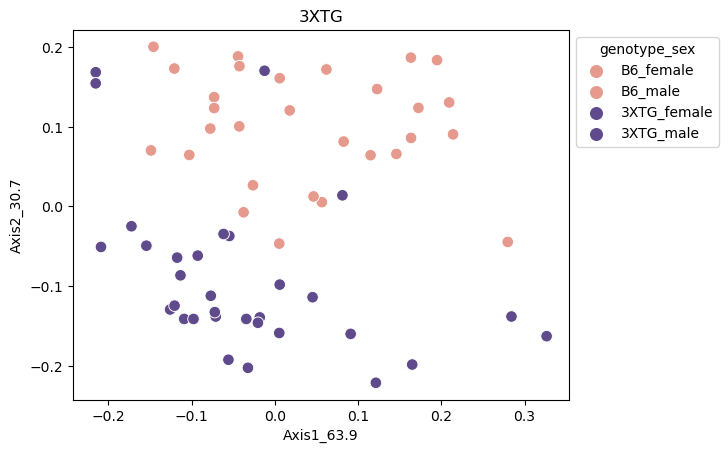

In [11]:
g = sns.scatterplot(data=sac_phyloRPCA_ord_md, x='Axis1_63.9', y='Axis2_30.7', 
                hue='genotype_sex', hue_order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['#E69A8D', '#E69A8D', '#5F4B8B', '#5F4B8B'], size='genotype_sex', sizes=[70,70,70,70])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.title('3XTG')
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3xTG_phyloRPCA_sac-only_scatterplot_newcolors.svg',
           bbox_inches='tight', dpi=150)

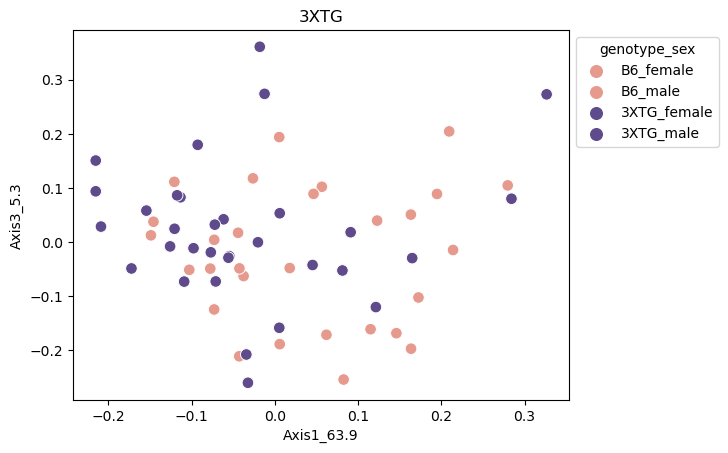

In [12]:
g = sns.scatterplot(data=sac_phyloRPCA_ord_md, x='Axis1_63.9', y='Axis3_5.3', 
                hue='genotype_sex', hue_order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['#E69A8D', '#E69A8D', '#5F4B8B', '#5F4B8B'], size='genotype_sex', sizes=[70,70,70,70])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.title('3XTG')
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/3xTG_phyloRPCA_sac-only_scatterplot_newcolors.svg',
#           bbox_inches='tight', dpi=150)

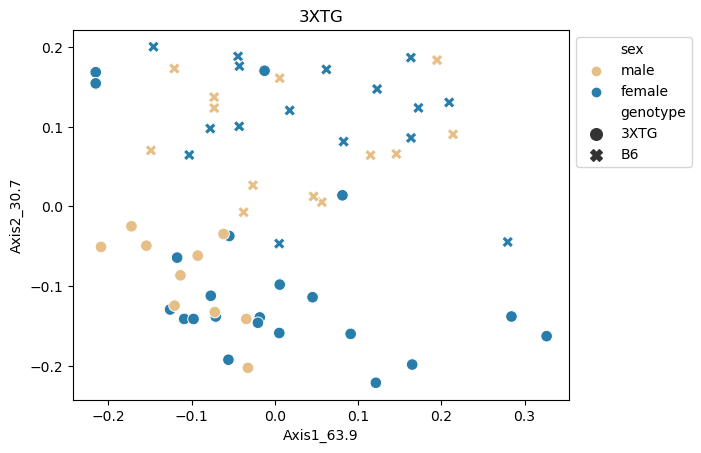

In [24]:
g = sns.scatterplot(data=sac_phyloRPCA_ord_md,  x='Axis1_63.9', y='Axis2_30.7',  
                hue='sex',
               palette=['#E5BF86', '#287DAB'], style='genotype', size='genotype', sizes=[70,70])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.title('3XTG')
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3xTG_phyloRPCA_sac-only_scatterplot_sex_newcolors.svg',
           bbox_inches='tight', dpi=150)

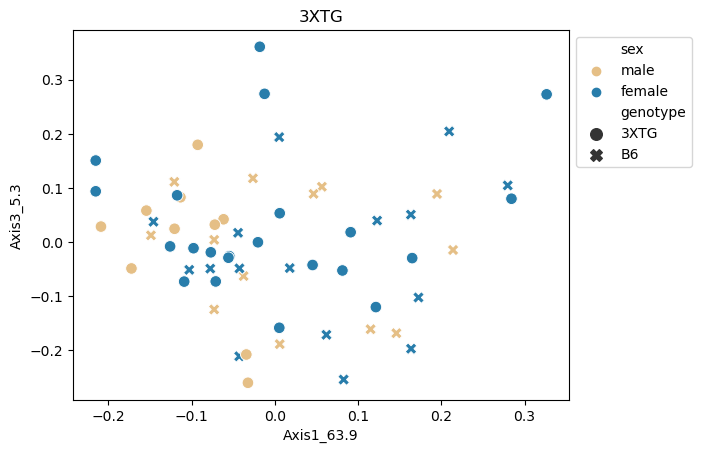

In [25]:
g = sns.scatterplot(data=sac_phyloRPCA_ord_md, x='Axis1_63.9', y='Axis3_5.3', 
                hue='sex',
               palette=['#E5BF86', '#287DAB'], style='genotype', size='genotype', sizes=[70,70])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.title('3XTG')
plt.rcParams['svg.fonttype'] = 'none'
# plt.savefig('../figures/3xTG_phyloRPCA_sac-only_scatterplot_sex_newcolors.svg',
#            bbox_inches='tight', dpi=150)

In [15]:
sac_phyloRPCA_ord_md['host_age'] = pd.to_numeric(sac_phyloRPCA_ord_md['host_age'])

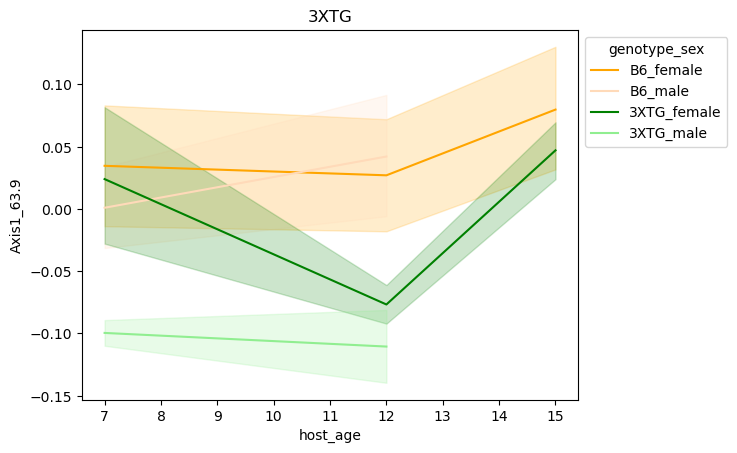

In [16]:
g = sns.lineplot(data=sac_phyloRPCA_ord_md, x='host_age', y='Axis1_63.9', ci=68,
                hue='genotype_sex', hue_order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.title('3XTG')
plt.rcParams['svg.fonttype'] = 'none'
# plt.savefig('../figures/3XTG_phyloRPCA_sac-only_Axis1_lineplot.svg',
#            bbox_inches='tight', dpi=150)

# Log Ratios

In [25]:
RPCA_Ax1_LR = pd.read_csv('../data/Microbiome/pooling_filtered/RPCA_all/3XTG_RPCA_Ax1-topbot1_LR.tsv', 
                             sep='\t', index_col=0, usecols=['Sample ID', 'Current_Natural_Log_Ratio'])
RPCA_Ax1_LR.head()

Current_Natural_Log_Ratio
Sample ID                                             
14748.CAGE41.FSPF3XTG.L10.1                  -3.508484
14748.CAGE21.FSPF3XTG.L9.2                   -6.688635
14748.CAGE42.MSPF3XTG.L9.1                   -7.486868
14748.CAGE41.FSPF3XTG.L2.2                   -6.290908
14748.CAGE69.MSPF3XTG.L5.2                   -6.479508

In [26]:
RPCA_Ax1_md = pd.merge(RPCA_Ax1_LR, metadata, left_index=True, right_index=True)
RPCA_Ax1_md.head()

Current_Natural_Log_Ratio        anonymized_name  \
14748.CAGE41.FSPF3XTG.L10.1                  -3.508484  CAGE41.FSPF3XTG.L10.1   
14748.CAGE21.FSPF3XTG.L9.2                   -6.688635   CAGE21.FSPF3XTG.L9.2   
14748.CAGE42.MSPF3XTG.L9.1                   -7.486868   CAGE42.MSPF3XTG.L9.1   
14748.CAGE41.FSPF3XTG.L2.2                   -6.290908   CAGE41.FSPF3XTG.L2.2   
14748.CAGE69.MSPF3XTG.L5.2                   -6.479508   CAGE69.MSPF3XTG.L5.2   

                            collection_timestamp description  dna_extracted  \
14748.CAGE41.FSPF3XTG.L10.1              3/10/21         NaN          False   
14748.CAGE21.FSPF3XTG.L9.2              11/23/20         NaN          False   
14748.CAGE42.MSPF3XTG.L9.1               2/10/21         NaN          False   
14748.CAGE41.FSPF3XTG.L2.2               6/30/20         NaN          False   
14748.CAGE69.MSPF3XTG.L5.2               1/10/21         NaN          False   

                             elevation           empo_1  empo_2  \
14748.CAGE41.FSPF3XTG.L10.1        263  Host-associated  Animal   
14748.CAGE21.FSPF3XTG.L9.2         263  Host-associated  Animal   
14748.CAGE42.MSPF3XTG.L9.1         263  Host-associated  Animal   
14748.CAGE41.FSPF3XTG.L2.2         263  Host-associated  Animal   
14748.CAGE69.MSPF3XTG.L5.2         263  Host-associated  Animal   

                                        empo_3    env_biome  ...  \
14748.CAGE41.FSPF3XTG.L10.1  Animal distal gut  urban biome  ...   
14748.CAGE21.FSPF3XTG.L9.2   Animal distal gut  urban biome  ...   
14748.CAGE42.MSPF3XTG.L9.1   Animal distal gut  urban biome  ...   
14748.CAGE41.FSPF3XTG.L2.2   Animal distal gut  urban biome  ...   
14748.CAGE69.MSPF3XTG.L5.2   Animal distal gut  urban biome  ...   

                                  scientific_name     sex    study_type  \
14748.CAGE41.FSPF3XTG.L10.1  mouse gut metagenome  female  Longitudinal   
14748.CAGE21.FSPF3XTG.L9.2   mouse gut metagenome  female  Longitudinal   
14748.CAGE42.MSPF3XTG.L9.1   mouse gut metagenome    male  Longitudinal   
14748.CAGE41.FSPF3XTG.L2.2   mouse gut metagenome  female  Longitudinal   
14748.CAGE69.MSPF3XTG.L5.2   mouse gut metagenome    male  Longitudinal   

                            taxon_id  \
14748.CAGE41.FSPF3XTG.L10.1   410661   
14748.CAGE21.FSPF3XTG.L9.2    410661   
14748.CAGE42.MSPF3XTG.L9.1    410661   
14748.CAGE41.FSPF3XTG.L2.2    410661   
14748.CAGE69.MSPF3XTG.L5.2    410661   

                                                                         title  \
14748.CAGE41.FSPF3XTG.L10.1  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE21.FSPF3XTG.L9.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE42.MSPF3XTG.L9.1   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE41.FSPF3XTG.L2.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE69.MSPF3XTG.L5.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   

                               tube_id  keep genotype_sex    cohort  \
14748.CAGE41.FSPF3XTG.L10.1  363130500  True  3XTG_female  COHORT 6   
14748.CAGE21.FSPF3XTG.L9.2   363132072  True  3XTG_female  COHORT 4   
14748.CAGE42.MSPF3XTG.L9.1   363130499  True    3XTG_male  COHORT 6   
14748.CAGE41.FSPF3XTG.L2.2   363131324  True  3XTG_female  COHORT 6   
14748.CAGE69.MSPF3XTG.L5.2   363132055  True    3XTG_male  COHORT 5   

                            genotype_tp  
14748.CAGE41.FSPF3XTG.L10.1     3XTG_10  
14748.CAGE21.FSPF3XTG.L9.2       3XTG_9  
14748.CAGE42.MSPF3XTG.L9.1       3XTG_9  
14748.CAGE41.FSPF3XTG.L2.2       3XTG_2  
14748.CAGE69.MSPF3XTG.L5.2       3XTG_5  

[5 rows x 41 columns]

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

B6_female vs. B6_male: Mann-Whitney-Wilcoxon test two-sided, P_val:4.042e-01 U_stat=3.049e+03
3XTG_female vs. 3XTG_male: Mann-Whitney-Wilcoxon test two-sided, P_val:8.471e-01 U_stat=5.301e+03
B6_female vs. 3XTG_female: Mann-Whitney-Wilcoxon test two-sided, P_val:1.066e-32 U_stat=1.602e+04
B6_male vs. 3XTG_male: Mann-Whitney-Wilcoxon test two-sided, P_val:1.904e-18 U_stat=3.861e+03


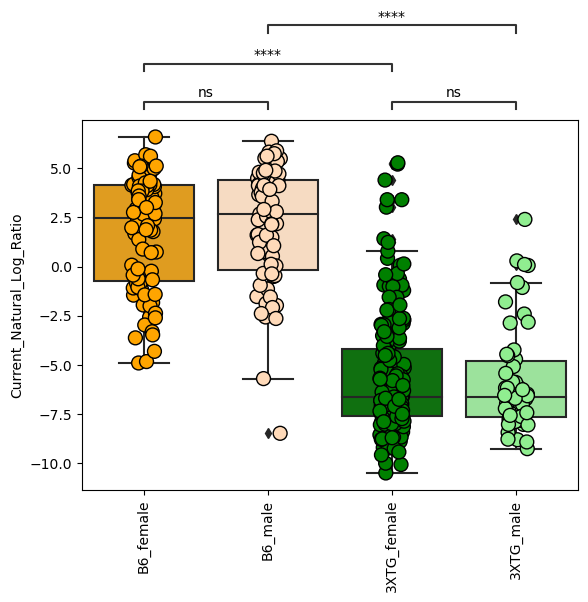

In [27]:
g = sns.boxplot(data=RPCA_Ax1_md, x='genotype_sex', y='Current_Natural_Log_Ratio',
               order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'])
g = sns.stripplot(data=RPCA_Ax1_md, x='genotype_sex', y='Current_Natural_Log_Ratio', 
                  order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'],
                 s=10, edgecolor='k', linewidth=1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


pairs=[('B6_female', 'B6_male'), ('B6_female', '3XTG_female'), 
       ('B6_male', '3XTG_male'), ('3XTG_female', '3XTG_male')]

annotator = Annotator(g, pairs, data=RPCA_Ax1_md, x='genotype_sex', y='Current_Natural_Log_Ratio',
               order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'])
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

plt.xlabel("")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_RPCA_Ax1-topbot1_LR_boxplot.svg',
           bbox_inches='tight', dpi=150)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

B6_female vs. B6_male: Mann-Whitney-Wilcoxon test two-sided, P_val:4.042e-01 U_stat=3.049e+03
3XTG_female vs. 3XTG_male: Mann-Whitney-Wilcoxon test two-sided, P_val:8.471e-01 U_stat=5.301e+03
B6_female vs. 3XTG_female: Mann-Whitney-Wilcoxon test two-sided, P_val:1.066e-32 U_stat=1.602e+04
B6_male vs. 3XTG_male: Mann-Whitney-Wilcoxon test two-sided, P_val:1.904e-18 U_stat=3.861e+03


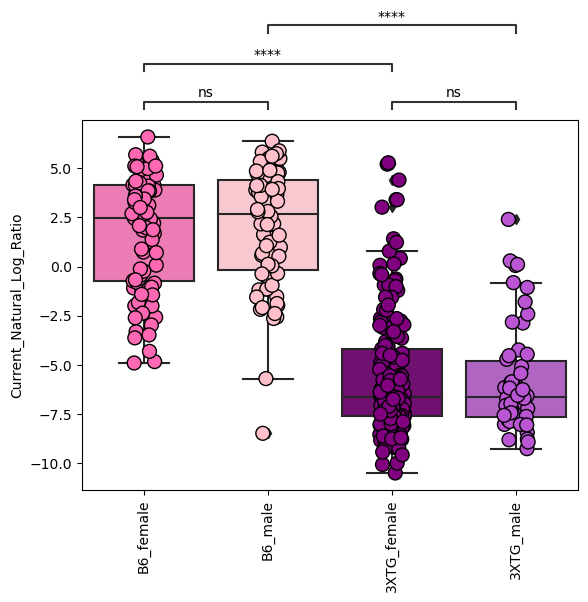

In [52]:
g = sns.boxplot(data=RPCA_Ax1_md, x='genotype_sex', y='Current_Natural_Log_Ratio',
               order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['hotpink', 'pink', 'purple', 'mediumorchid'])
g = sns.stripplot(data=RPCA_Ax1_md, x='genotype_sex', y='Current_Natural_Log_Ratio', 
                  order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['hotpink', 'pink', 'purple', 'mediumorchid'],
                 s=10, edgecolor='k', linewidth=1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


pairs=[('B6_female', 'B6_male'), ('B6_female', '3XTG_female'), 
       ('B6_male', '3XTG_male'), ('3XTG_female', '3XTG_male')]

annotator = Annotator(g, pairs, data=RPCA_Ax1_md, x='genotype_sex', y='Current_Natural_Log_Ratio',
               order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'])
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

plt.xlabel("")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_RPCA_Ax1-topbot1_LR_boxplot_newcolors.svg',
           bbox_inches='tight', dpi=150)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

3XTG vs. B6: Mann-Whitney-Wilcoxon test two-sided, P_val:9.741e-53 U_stat=2.182e+03


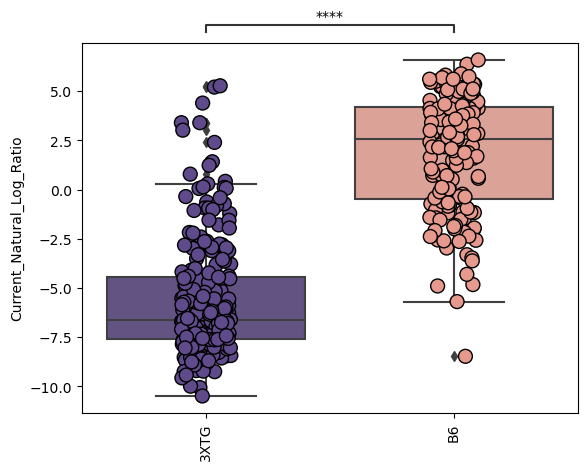

In [86]:
g = sns.boxplot(data=RPCA_Ax1_md, x='genotype', y='Current_Natural_Log_Ratio',
               palette=['#5F4B8B', '#E69A8D'])
g = sns.stripplot(data=RPCA_Ax1_md, x='genotype', y='Current_Natural_Log_Ratio',
               palette=['#5F4B8B', '#E69A8D'],
                 s=10, edgecolor='k', linewidth=1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

annotator = Annotator(g, [('3XTG', 'B6')], data=RPCA_Ax1_md, 
                      x='genotype', y='Current_Natural_Log_Ratio')
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

plt.xlabel("")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_RPCA_Ax1-topbot1_LR_boxplot_genotype_newcolors.svg',
           bbox_inches='tight', dpi=150)

In [28]:
RPCA_Ax1_md['host_age'] = pd.to_numeric(RPCA_Ax1_md['host_age'])

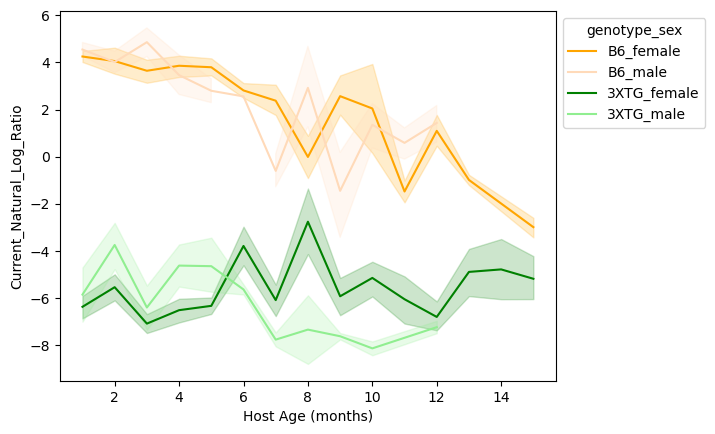

In [29]:
g = sns.lineplot(data=RPCA_Ax1_md, x='host_age', y='Current_Natural_Log_Ratio', 
                 hue='genotype_sex', ci=68, 
                 hue_order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Host Age (months)")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_RPCA_Ax1-topbot1_LR_lineplot.svg',
           bbox_inches='tight', dpi=150)
#timepoint 7, 12, and 15 are from sacrificed mice

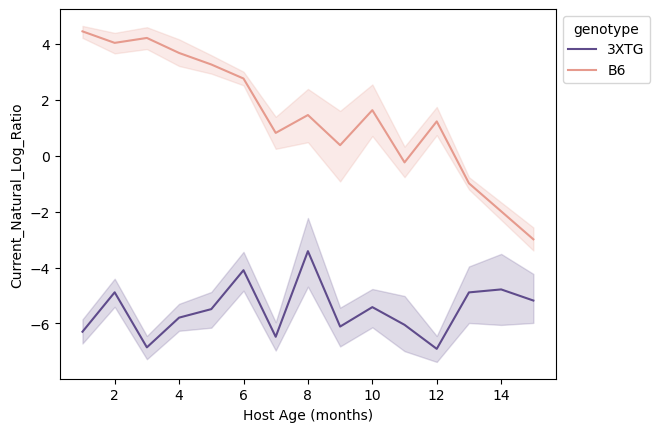

In [87]:
g = sns.lineplot(data=RPCA_Ax1_md, x='host_age', y='Current_Natural_Log_Ratio', 
                 hue='genotype', ci=68,
               palette=['#5F4B8B', '#E69A8D'])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Host Age (months)")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_RPCA_Ax1-topbot1_LR_lineplot_newcolors.svg',
           bbox_inches='tight', dpi=150)
#timepoint 7, 12, and 15 are from sacrificed mice

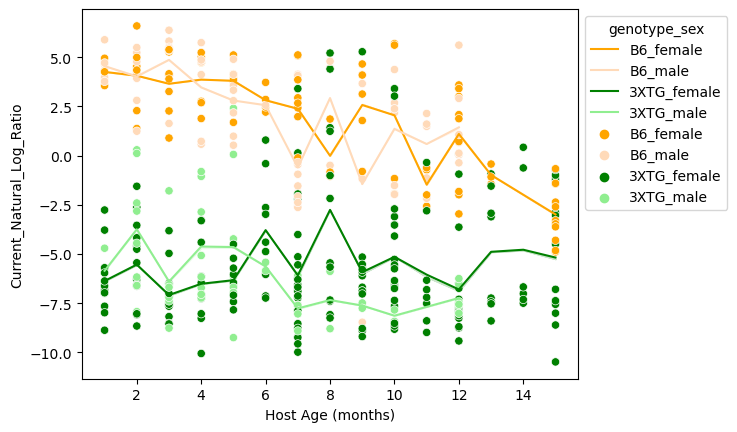

In [30]:
g = sns.lineplot(data=RPCA_Ax1_md, x='host_age', y='Current_Natural_Log_Ratio', 
                 hue='genotype_sex', ci=0, 
                 hue_order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'])
g = sns.scatterplot(data=RPCA_Ax1_md, x='host_age', y='Current_Natural_Log_Ratio', 
                 hue='genotype_sex', 
                 hue_order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Host Age (months)")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_RPCA_Ax1-topbot1_LR_linescatterplot.png',
           bbox_inches='tight', dpi=150)
#timepoint 7, 12, and 15 are from sacrificed mice

In [31]:
RPCA_Ax2_LR = pd.read_csv('../data/Microbiome/pooling_filtered/RPCA_all/3XTG_RPCA_Ax2-topbot1_LR.tsv', 
                             sep='\t', index_col=0, usecols=['Sample ID', 'Current_Natural_Log_Ratio'])
RPCA_Ax2_LR.head()

Current_Natural_Log_Ratio
Sample ID                                             
14748.CAGE41.FSPF3XTG.L10.1                   8.119488
14748.CAGE21.FSPF3XTG.L9.2                    7.509466
14748.CAGE42.MSPF3XTG.L9.1                    7.645995
14748.CAGE41.FSPF3XTG.L2.2                    6.463517
14748.CAGE69.MSPF3XTG.L5.2                    9.677778

In [32]:
RPCA_Ax2_md = pd.merge(RPCA_Ax2_LR, metadata, left_index=True, right_index=True)
RPCA_Ax2_md.head()

Current_Natural_Log_Ratio        anonymized_name  \
14748.CAGE41.FSPF3XTG.L10.1                   8.119488  CAGE41.FSPF3XTG.L10.1   
14748.CAGE21.FSPF3XTG.L9.2                    7.509466   CAGE21.FSPF3XTG.L9.2   
14748.CAGE42.MSPF3XTG.L9.1                    7.645995   CAGE42.MSPF3XTG.L9.1   
14748.CAGE41.FSPF3XTG.L2.2                    6.463517   CAGE41.FSPF3XTG.L2.2   
14748.CAGE69.MSPF3XTG.L5.2                    9.677778   CAGE69.MSPF3XTG.L5.2   

                            collection_timestamp description  dna_extracted  \
14748.CAGE41.FSPF3XTG.L10.1              3/10/21         NaN          False   
14748.CAGE21.FSPF3XTG.L9.2              11/23/20         NaN          False   
14748.CAGE42.MSPF3XTG.L9.1               2/10/21         NaN          False   
14748.CAGE41.FSPF3XTG.L2.2               6/30/20         NaN          False   
14748.CAGE69.MSPF3XTG.L5.2               1/10/21         NaN          False   

                             elevation           empo_1  empo_2  \
14748.CAGE41.FSPF3XTG.L10.1        263  Host-associated  Animal   
14748.CAGE21.FSPF3XTG.L9.2         263  Host-associated  Animal   
14748.CAGE42.MSPF3XTG.L9.1         263  Host-associated  Animal   
14748.CAGE41.FSPF3XTG.L2.2         263  Host-associated  Animal   
14748.CAGE69.MSPF3XTG.L5.2         263  Host-associated  Animal   

                                        empo_3    env_biome  ...  \
14748.CAGE41.FSPF3XTG.L10.1  Animal distal gut  urban biome  ...   
14748.CAGE21.FSPF3XTG.L9.2   Animal distal gut  urban biome  ...   
14748.CAGE42.MSPF3XTG.L9.1   Animal distal gut  urban biome  ...   
14748.CAGE41.FSPF3XTG.L2.2   Animal distal gut  urban biome  ...   
14748.CAGE69.MSPF3XTG.L5.2   Animal distal gut  urban biome  ...   

                                  scientific_name     sex    study_type  \
14748.CAGE41.FSPF3XTG.L10.1  mouse gut metagenome  female  Longitudinal   
14748.CAGE21.FSPF3XTG.L9.2   mouse gut metagenome  female  Longitudinal   
14748.CAGE42.MSPF3XTG.L9.1   mouse gut metagenome    male  Longitudinal   
14748.CAGE41.FSPF3XTG.L2.2   mouse gut metagenome  female  Longitudinal   
14748.CAGE69.MSPF3XTG.L5.2   mouse gut metagenome    male  Longitudinal   

                            taxon_id  \
14748.CAGE41.FSPF3XTG.L10.1   410661   
14748.CAGE21.FSPF3XTG.L9.2    410661   
14748.CAGE42.MSPF3XTG.L9.1    410661   
14748.CAGE41.FSPF3XTG.L2.2    410661   
14748.CAGE69.MSPF3XTG.L5.2    410661   

                                                                         title  \
14748.CAGE41.FSPF3XTG.L10.1  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE21.FSPF3XTG.L9.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE42.MSPF3XTG.L9.1   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE41.FSPF3XTG.L2.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE69.MSPF3XTG.L5.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   

                               tube_id  keep genotype_sex    cohort  \
14748.CAGE41.FSPF3XTG.L10.1  363130500  True  3XTG_female  COHORT 6   
14748.CAGE21.FSPF3XTG.L9.2   363132072  True  3XTG_female  COHORT 4   
14748.CAGE42.MSPF3XTG.L9.1   363130499  True    3XTG_male  COHORT 6   
14748.CAGE41.FSPF3XTG.L2.2   363131324  True  3XTG_female  COHORT 6   
14748.CAGE69.MSPF3XTG.L5.2   363132055  True    3XTG_male  COHORT 5   

                            genotype_tp  
14748.CAGE41.FSPF3XTG.L10.1     3XTG_10  
14748.CAGE21.FSPF3XTG.L9.2       3XTG_9  
14748.CAGE42.MSPF3XTG.L9.1       3XTG_9  
14748.CAGE41.FSPF3XTG.L2.2       3XTG_2  
14748.CAGE69.MSPF3XTG.L5.2       3XTG_5  

[5 rows x 41 columns]

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

B6_female vs. B6_male: Mann-Whitney-Wilcoxon test two-sided, P_val:2.379e-01 U_stat=3.655e+03
3XTG_female vs. 3XTG_male: Mann-Whitney-Wilcoxon test two-sided, P_val:7.966e-03 U_stat=3.979e+03
B6_female vs. 3XTG_female: Mann-Whitney-Wilcoxon test two-sided, P_val:9.155e-33 U_stat=9.600e+02
B6_male vs. 3XTG_male: Mann-Whitney-Wilcoxon test two-sided, P_val:1.640e-19 U_stat=1.320e+02


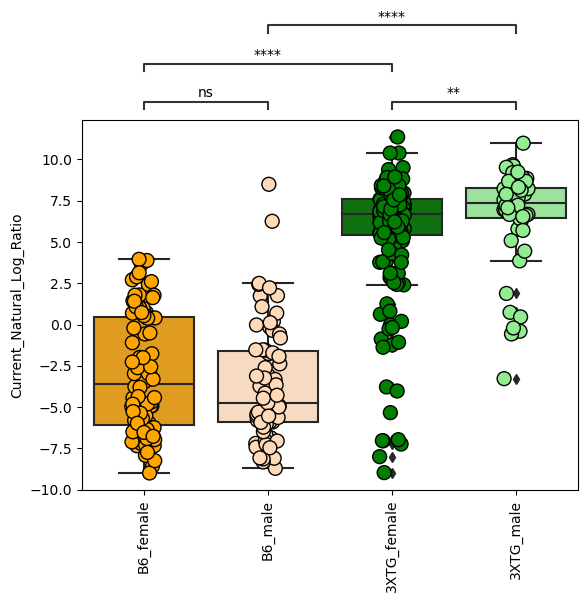

In [33]:
g = sns.boxplot(data=RPCA_Ax2_md, x='genotype_sex', y='Current_Natural_Log_Ratio',
               order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'])
g = sns.stripplot(data=RPCA_Ax2_md, x='genotype_sex', y='Current_Natural_Log_Ratio', 
                  order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'],
                 s=10, edgecolor='k', linewidth=1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


pairs=[('B6_female', 'B6_male'), ('B6_female', '3XTG_female'), 
       ('B6_male', '3XTG_male'), ('3XTG_female', '3XTG_male')]

annotator = Annotator(g, pairs, data=RPCA_Ax2_md, x='genotype_sex', y='Current_Natural_Log_Ratio',
               order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'])
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

plt.xlabel("")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_RPCA_Ax2-topbot1_LR_boxplot.png',
           bbox_inches='tight', dpi=150)

In [34]:
RPCA_Ax2_md['host_age'] = pd.to_numeric(RPCA_Ax2_md['host_age'])

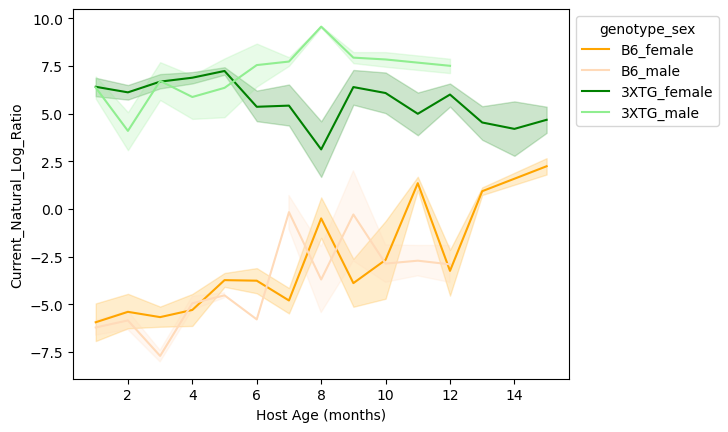

In [35]:
g = sns.lineplot(data=RPCA_Ax2_md, x='host_age', y='Current_Natural_Log_Ratio', 
                 hue='genotype_sex', ci=68, 
                 hue_order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Host Age (months)")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_RPCA_Ax2-topbot1_LR_lineplot.png',
           bbox_inches='tight', dpi=150)
#timepoint 7, 12, and 15 are from sacrificed mice

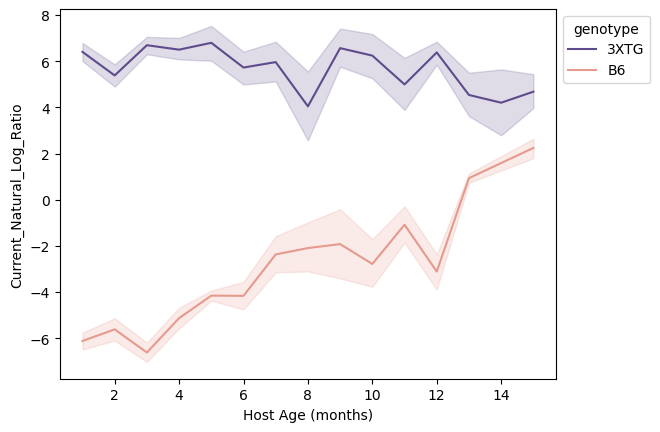

In [88]:
g = sns.lineplot(data=RPCA_Ax2_md, x='host_age', y='Current_Natural_Log_Ratio', 
                 hue='genotype', ci=68, 
               palette=['#5F4B8B', '#E69A8D'])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Host Age (months)")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_RPCA_Ax2-topbot1_LR_lineplot_genotype_newcolors.png',
           bbox_inches='tight', dpi=150)
#timepoint 7, 12, and 15 are from sacrificed mice

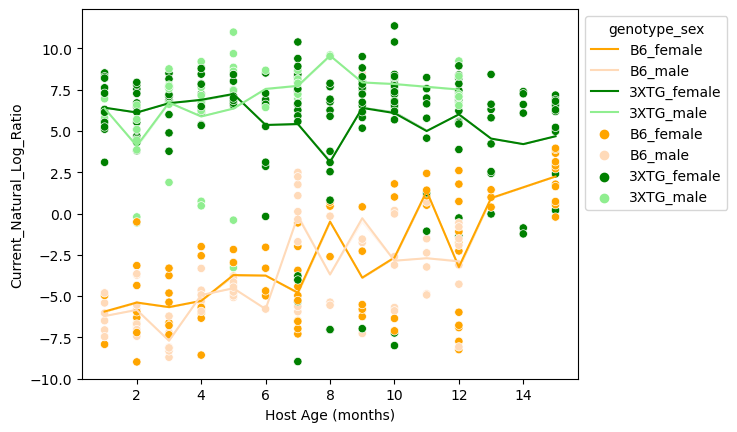

In [36]:
g = sns.lineplot(data=RPCA_Ax2_md, x='host_age', y='Current_Natural_Log_Ratio', 
                 hue='genotype_sex', ci=0, 
                 hue_order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'])
g = sns.scatterplot(data=RPCA_Ax2_md, x='host_age', y='Current_Natural_Log_Ratio', 
                 hue='genotype_sex', 
                 hue_order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Host Age (months)")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_RPCA_Ax2-topbot1_LR_linescatterplot.png',
           bbox_inches='tight', dpi=150)
#timepoint 7, 12, and 15 are from sacrificed mice

In [37]:
Ax1Ax2combo = pd.merge(RPCA_Ax1_LR.rename(columns={'Current_Natural_Log_Ratio': 'RPCA_Ax1-topbot1'}), 
                       RPCA_Ax2_LR.rename(columns={'Current_Natural_Log_Ratio': 'RPCA_Ax2-topbot1'}), 
                       left_index=True, right_index=True)
Ax1Ax2combo.head()

RPCA_Ax1-topbot1  RPCA_Ax2-topbot1
Sample ID                                                      
14748.CAGE41.FSPF3XTG.L10.1         -3.508484          8.119488
14748.CAGE21.FSPF3XTG.L9.2          -6.688635          7.509466
14748.CAGE42.MSPF3XTG.L9.1          -7.486868          7.645995
14748.CAGE41.FSPF3XTG.L2.2          -6.290908          6.463517
14748.CAGE69.MSPF3XTG.L5.2          -6.479508          9.677778

In [38]:
Ax1Ax2combo_md = pd.merge(Ax1Ax2combo, metadata, left_index=True, right_index=True)
Ax1Ax2combo_md.head()

RPCA_Ax1-topbot1  RPCA_Ax2-topbot1  \
14748.CAGE41.FSPF3XTG.L10.1         -3.508484          8.119488   
14748.CAGE21.FSPF3XTG.L9.2          -6.688635          7.509466   
14748.CAGE42.MSPF3XTG.L9.1          -7.486868          7.645995   
14748.CAGE41.FSPF3XTG.L2.2          -6.290908          6.463517   
14748.CAGE69.MSPF3XTG.L5.2          -6.479508          9.677778   

                                   anonymized_name collection_timestamp  \
14748.CAGE41.FSPF3XTG.L10.1  CAGE41.FSPF3XTG.L10.1              3/10/21   
14748.CAGE21.FSPF3XTG.L9.2    CAGE21.FSPF3XTG.L9.2             11/23/20   
14748.CAGE42.MSPF3XTG.L9.1    CAGE42.MSPF3XTG.L9.1              2/10/21   
14748.CAGE41.FSPF3XTG.L2.2    CAGE41.FSPF3XTG.L2.2              6/30/20   
14748.CAGE69.MSPF3XTG.L5.2    CAGE69.MSPF3XTG.L5.2              1/10/21   

                            description  dna_extracted  elevation  \
14748.CAGE41.FSPF3XTG.L10.1         NaN          False        263   
14748.CAGE21.FSPF3XTG.L9.2          NaN          False        263   
14748.CAGE42.MSPF3XTG.L9.1          NaN          False        263   
14748.CAGE41.FSPF3XTG.L2.2          NaN          False        263   
14748.CAGE69.MSPF3XTG.L5.2          NaN          False        263   

                                      empo_1  empo_2             empo_3  ...  \
14748.CAGE41.FSPF3XTG.L10.1  Host-associated  Animal  Animal distal gut  ...   
14748.CAGE21.FSPF3XTG.L9.2   Host-associated  Animal  Animal distal gut  ...   
14748.CAGE42.MSPF3XTG.L9.1   Host-associated  Animal  Animal distal gut  ...   
14748.CAGE41.FSPF3XTG.L2.2   Host-associated  Animal  Animal distal gut  ...   
14748.CAGE69.MSPF3XTG.L5.2   Host-associated  Animal  Animal distal gut  ...   

                                  scientific_name     sex    study_type  \
14748.CAGE41.FSPF3XTG.L10.1  mouse gut metagenome  female  Longitudinal   
14748.CAGE21.FSPF3XTG.L9.2   mouse gut metagenome  female  Longitudinal   
14748.CAGE42.MSPF3XTG.L9.1   mouse gut metagenome    male  Longitudinal   
14748.CAGE41.FSPF3XTG.L2.2   mouse gut metagenome  female  Longitudinal   
14748.CAGE69.MSPF3XTG.L5.2   mouse gut metagenome    male  Longitudinal   

                            taxon_id  \
14748.CAGE41.FSPF3XTG.L10.1   410661   
14748.CAGE21.FSPF3XTG.L9.2    410661   
14748.CAGE42.MSPF3XTG.L9.1    410661   
14748.CAGE41.FSPF3XTG.L2.2    410661   
14748.CAGE69.MSPF3XTG.L5.2    410661   

                                                                         title  \
14748.CAGE41.FSPF3XTG.L10.1  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE21.FSPF3XTG.L9.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE42.MSPF3XTG.L9.1   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE41.FSPF3XTG.L2.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE69.MSPF3XTG.L5.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   

                               tube_id  keep genotype_sex    cohort  \
14748.CAGE41.FSPF3XTG.L10.1  363130500  True  3XTG_female  COHORT 6   
14748.CAGE21.FSPF3XTG.L9.2   363132072  True  3XTG_female  COHORT 4   
14748.CAGE42.MSPF3XTG.L9.1   363130499  True    3XTG_male  COHORT 6   
14748.CAGE41.FSPF3XTG.L2.2   363131324  True  3XTG_female  COHORT 6   
14748.CAGE69.MSPF3XTG.L5.2   363132055  True    3XTG_male  COHORT 5   

                            genotype_tp  
14748.CAGE41.FSPF3XTG.L10.1     3XTG_10  
14748.CAGE21.FSPF3XTG.L9.2       3XTG_9  
14748.CAGE42.MSPF3XTG.L9.1       3XTG_9  
14748.CAGE41.FSPF3XTG.L2.2       3XTG_2  
14748.CAGE69.MSPF3XTG.L5.2       3XTG_5  

[5 rows x 42 columns]

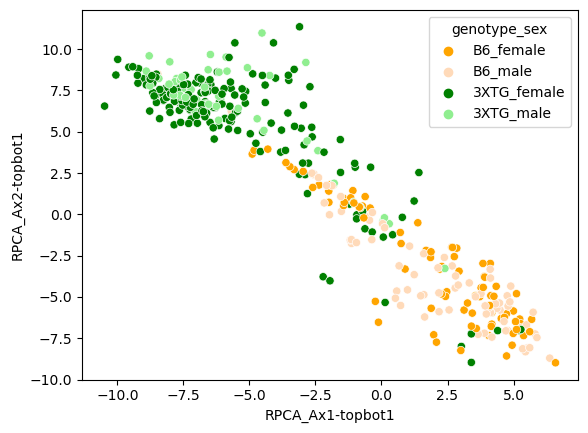

In [39]:
sns.scatterplot(data=Ax1Ax2combo_md, x='RPCA_Ax1-topbot1', y='RPCA_Ax2-topbot1',
               hue='genotype_sex',
                 hue_order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'])
plt.savefig('../figures/3XTG_RPCA_Ax1Ax2-topbot1_LR_combo-scatterplot.png',
           bbox_inches='tight', dpi=150)
#fairly linear relationship!

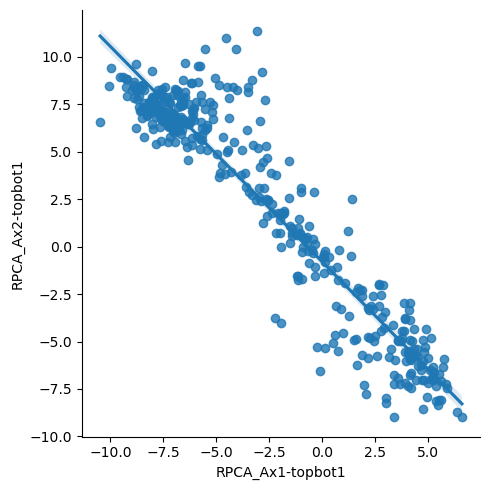

In [40]:
sns.lmplot(data=Ax1Ax2combo_md, x='RPCA_Ax1-topbot1', y='RPCA_Ax2-topbot1', ci=99)

In [55]:
from scipy import stats

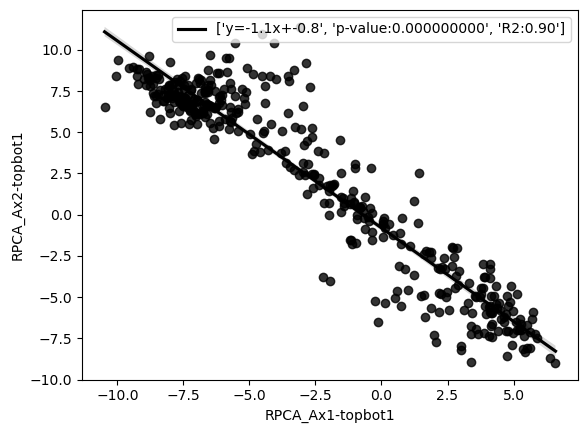

In [56]:
slope, intercept, r_value, p_value, std_err = stats.linregress(Ax1Ax2combo_md['RPCA_Ax1-topbot1'],
                                                               Ax1Ax2combo_md['RPCA_Ax2-topbot1'])

# use line_kws to set line label for legend
ax = sns.regplot(data=Ax1Ax2combo_md, x='RPCA_Ax1-topbot1', y='RPCA_Ax2-topbot1', 
                 color='k', 
                 line_kws={'label':["y={0:.1f}x+{1:.1f}".format(slope,intercept),
                          "p-value:{0:.9f}".format(p_value),
                          "R2:{0:.2f}".format(r_value**2)]})
ax.legend()
plt.savefig('../figures/3XTG_RPCA_Ax1Ax2-topbot1_LR_combo-regplot.png',
           bbox_inches='tight', dpi=150)

In [57]:
Akk_LigiLimosilacto_LR = pd.read_csv('../data/Microbiome/pooling_filtered/RPCA_all/3XTG_RPCA_genus-Akkermansia-LigilactobacillusLimosilactobacillus.tsv', 
                             sep='\t', index_col=0, usecols=['Sample ID', 'Current_Natural_Log_Ratio'])
Akk_LigiLimosilacto_LR.head()
#Genus level Log ratio: Akkermansia/Ligilactobacillus+Limosilactobacillus

Current_Natural_Log_Ratio
Sample ID                                             
14748.CAGE41.FSPF3XTG.L10.1                  -1.712979
14748.CAGE21.FSPF3XTG.L9.2                   -6.587963
14748.CAGE42.MSPF3XTG.L9.1                   -6.536885
14748.CAGE41.FSPF3XTG.L2.2                   -3.544624
14748.CAGE69.MSPF3XTG.L5.2                   -6.211938

In [58]:
Akk_LigiLimosilacto_md = pd.merge(Akk_LigiLimosilacto_LR, metadata, left_index=True, right_index=True)
Akk_LigiLimosilacto_md.head()

Current_Natural_Log_Ratio        anonymized_name  \
14748.CAGE41.FSPF3XTG.L10.1                  -1.712979  CAGE41.FSPF3XTG.L10.1   
14748.CAGE21.FSPF3XTG.L9.2                   -6.587963   CAGE21.FSPF3XTG.L9.2   
14748.CAGE42.MSPF3XTG.L9.1                   -6.536885   CAGE42.MSPF3XTG.L9.1   
14748.CAGE41.FSPF3XTG.L2.2                   -3.544624   CAGE41.FSPF3XTG.L2.2   
14748.CAGE69.MSPF3XTG.L5.2                   -6.211938   CAGE69.MSPF3XTG.L5.2   

                            collection_timestamp description  dna_extracted  \
14748.CAGE41.FSPF3XTG.L10.1              3/10/21         NaN          False   
14748.CAGE21.FSPF3XTG.L9.2              11/23/20         NaN          False   
14748.CAGE42.MSPF3XTG.L9.1               2/10/21         NaN          False   
14748.CAGE41.FSPF3XTG.L2.2               6/30/20         NaN          False   
14748.CAGE69.MSPF3XTG.L5.2               1/10/21         NaN          False   

                             elevation           empo_1  empo_2  \
14748.CAGE41.FSPF3XTG.L10.1        263  Host-associated  Animal   
14748.CAGE21.FSPF3XTG.L9.2         263  Host-associated  Animal   
14748.CAGE42.MSPF3XTG.L9.1         263  Host-associated  Animal   
14748.CAGE41.FSPF3XTG.L2.2         263  Host-associated  Animal   
14748.CAGE69.MSPF3XTG.L5.2         263  Host-associated  Animal   

                                        empo_3    env_biome  ...  \
14748.CAGE41.FSPF3XTG.L10.1  Animal distal gut  urban biome  ...   
14748.CAGE21.FSPF3XTG.L9.2   Animal distal gut  urban biome  ...   
14748.CAGE42.MSPF3XTG.L9.1   Animal distal gut  urban biome  ...   
14748.CAGE41.FSPF3XTG.L2.2   Animal distal gut  urban biome  ...   
14748.CAGE69.MSPF3XTG.L5.2   Animal distal gut  urban biome  ...   

                                  scientific_name     sex    study_type  \
14748.CAGE41.FSPF3XTG.L10.1  mouse gut metagenome  female  Longitudinal   
14748.CAGE21.FSPF3XTG.L9.2   mouse gut metagenome  female  Longitudinal   
14748.CAGE42.MSPF3XTG.L9.1   mouse gut metagenome    male  Longitudinal   
14748.CAGE41.FSPF3XTG.L2.2   mouse gut metagenome  female  Longitudinal   
14748.CAGE69.MSPF3XTG.L5.2   mouse gut metagenome    male  Longitudinal   

                            taxon_id  \
14748.CAGE41.FSPF3XTG.L10.1   410661   
14748.CAGE21.FSPF3XTG.L9.2    410661   
14748.CAGE42.MSPF3XTG.L9.1    410661   
14748.CAGE41.FSPF3XTG.L2.2    410661   
14748.CAGE69.MSPF3XTG.L5.2    410661   

                                                                         title  \
14748.CAGE41.FSPF3XTG.L10.1  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE21.FSPF3XTG.L9.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE42.MSPF3XTG.L9.1   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE41.FSPF3XTG.L2.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE69.MSPF3XTG.L5.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   

                               tube_id  keep genotype_sex    cohort  \
14748.CAGE41.FSPF3XTG.L10.1  363130500  True  3XTG_female  COHORT 6   
14748.CAGE21.FSPF3XTG.L9.2   363132072  True  3XTG_female  COHORT 4   
14748.CAGE42.MSPF3XTG.L9.1   363130499  True    3XTG_male  COHORT 6   
14748.CAGE41.FSPF3XTG.L2.2   363131324  True  3XTG_female  COHORT 6   
14748.CAGE69.MSPF3XTG.L5.2   363132055  True    3XTG_male  COHORT 5   

                            genotype_tp  
14748.CAGE41.FSPF3XTG.L10.1     3XTG_10  
14748.CAGE21.FSPF3XTG.L9.2       3XTG_9  
14748.CAGE42.MSPF3XTG.L9.1       3XTG_9  
14748.CAGE41.FSPF3XTG.L2.2       3XTG_2  
14748.CAGE69.MSPF3XTG.L5.2       3XTG_5  

[5 rows x 41 columns]

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

B6_female vs. B6_male: Mann-Whitney-Wilcoxon test two-sided, P_val:9.902e-01 U_stat=3.084e+03
3XTG_female vs. 3XTG_male: Mann-Whitney-Wilcoxon test two-sided, P_val:2.433e-01 U_stat=5.753e+03
B6_female vs. 3XTG_female: Mann-Whitney-Wilcoxon test two-sided, P_val:1.679e-26 U_stat=1.522e+04
B6_male vs. 3XTG_male: Mann-Whitney-Wilcoxon test two-sided, P_val:1.526e-11 U_stat=3.229e+03


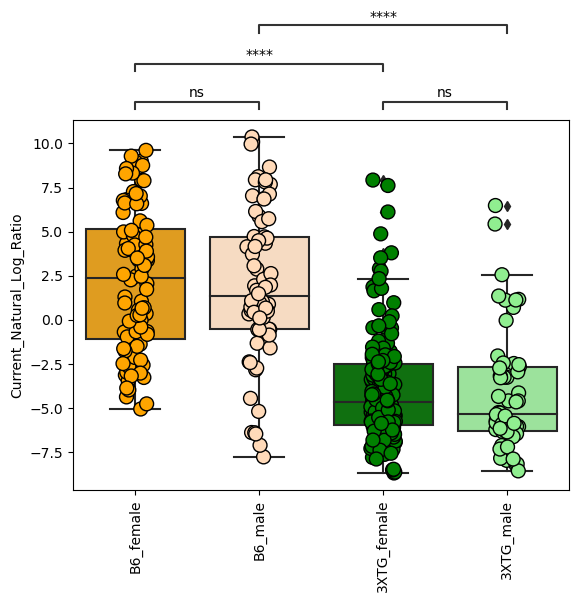

In [59]:
g = sns.boxplot(data=Akk_LigiLimosilacto_md, x='genotype_sex', y='Current_Natural_Log_Ratio',
               order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'])
g = sns.stripplot(data=Akk_LigiLimosilacto_md, x='genotype_sex', y='Current_Natural_Log_Ratio', 
                  order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'],
                 s=10, edgecolor='k', linewidth=1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


pairs=[('B6_female', 'B6_male'), ('B6_female', '3XTG_female'), 
       ('B6_male', '3XTG_male'), ('3XTG_female', '3XTG_male')]

annotator = Annotator(g, pairs, data=Akk_LigiLimosilacto_md, x='genotype_sex', y='Current_Natural_Log_Ratio',
               order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'])
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

plt.xlabel("")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_genus_Akk-LigiLimosilacto_LR_boxplot.png',
           bbox_inches='tight', dpi=150)

In [60]:
Akk_LigiLimosilacto_md['host_age'] = pd.to_numeric(Akk_LigiLimosilacto_md['host_age'])

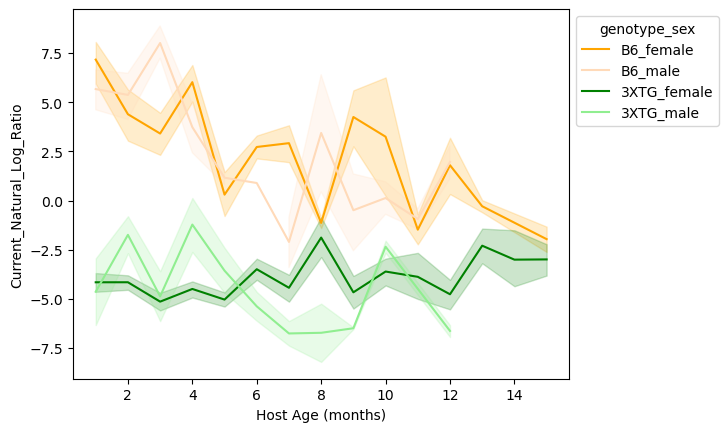

In [61]:
g = sns.lineplot(data=Akk_LigiLimosilacto_md, x='host_age', y='Current_Natural_Log_Ratio', 
                 hue='genotype_sex', ci=68, 
                 hue_order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Host Age (months)")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_genus_Akk-LigiLimosilacto-LR_lineplot.png',
           bbox_inches='tight', dpi=150)
#timepoint 7, 12, and 15 are from sacrificed mice

In [62]:
RPCA_Ax2_MuciliAkk_LR = pd.read_csv('../data/Microbiome/pooling_filtered/RPCA_all/Axis2_topbot1_Mucispirillum-schaedleri_Akkermansia-muciniphila.tsv', 
                             sep='\t', index_col=0, usecols=['Sample ID', 'Current_Natural_Log_Ratio'])
RPCA_Ax2_MuciliAkk_LR.head()

Current_Natural_Log_Ratio
Sample ID                                             
14748.CAGE41.FSPF3XTG.L10.1                   7.128350
14748.CAGE21.FSPF3XTG.L9.2                    6.073505
14748.CAGE42.MSPF3XTG.L9.1                    5.098239
14748.CAGE41.FSPF3XTG.L2.2                    4.075728
14748.CAGE69.MSPF3XTG.L5.2                    8.236744

In [63]:
RPCA_Ax2_MuciliAkk_md = pd.merge(RPCA_Ax2_MuciliAkk_LR, metadata, left_index=True, right_index=True)
RPCA_Ax2_MuciliAkk_md.head()

Current_Natural_Log_Ratio        anonymized_name  \
14748.CAGE41.FSPF3XTG.L10.1                   7.128350  CAGE41.FSPF3XTG.L10.1   
14748.CAGE21.FSPF3XTG.L9.2                    6.073505   CAGE21.FSPF3XTG.L9.2   
14748.CAGE42.MSPF3XTG.L9.1                    5.098239   CAGE42.MSPF3XTG.L9.1   
14748.CAGE41.FSPF3XTG.L2.2                    4.075728   CAGE41.FSPF3XTG.L2.2   
14748.CAGE69.MSPF3XTG.L5.2                    8.236744   CAGE69.MSPF3XTG.L5.2   

                            collection_timestamp description  dna_extracted  \
14748.CAGE41.FSPF3XTG.L10.1              3/10/21         NaN          False   
14748.CAGE21.FSPF3XTG.L9.2              11/23/20         NaN          False   
14748.CAGE42.MSPF3XTG.L9.1               2/10/21         NaN          False   
14748.CAGE41.FSPF3XTG.L2.2               6/30/20         NaN          False   
14748.CAGE69.MSPF3XTG.L5.2               1/10/21         NaN          False   

                             elevation           empo_1  empo_2  \
14748.CAGE41.FSPF3XTG.L10.1        263  Host-associated  Animal   
14748.CAGE21.FSPF3XTG.L9.2         263  Host-associated  Animal   
14748.CAGE42.MSPF3XTG.L9.1         263  Host-associated  Animal   
14748.CAGE41.FSPF3XTG.L2.2         263  Host-associated  Animal   
14748.CAGE69.MSPF3XTG.L5.2         263  Host-associated  Animal   

                                        empo_3    env_biome  ...  \
14748.CAGE41.FSPF3XTG.L10.1  Animal distal gut  urban biome  ...   
14748.CAGE21.FSPF3XTG.L9.2   Animal distal gut  urban biome  ...   
14748.CAGE42.MSPF3XTG.L9.1   Animal distal gut  urban biome  ...   
14748.CAGE41.FSPF3XTG.L2.2   Animal distal gut  urban biome  ...   
14748.CAGE69.MSPF3XTG.L5.2   Animal distal gut  urban biome  ...   

                                  scientific_name     sex    study_type  \
14748.CAGE41.FSPF3XTG.L10.1  mouse gut metagenome  female  Longitudinal   
14748.CAGE21.FSPF3XTG.L9.2   mouse gut metagenome  female  Longitudinal   
14748.CAGE42.MSPF3XTG.L9.1   mouse gut metagenome    male  Longitudinal   
14748.CAGE41.FSPF3XTG.L2.2   mouse gut metagenome  female  Longitudinal   
14748.CAGE69.MSPF3XTG.L5.2   mouse gut metagenome    male  Longitudinal   

                            taxon_id  \
14748.CAGE41.FSPF3XTG.L10.1   410661   
14748.CAGE21.FSPF3XTG.L9.2    410661   
14748.CAGE42.MSPF3XTG.L9.1    410661   
14748.CAGE41.FSPF3XTG.L2.2    410661   
14748.CAGE69.MSPF3XTG.L5.2    410661   

                                                                         title  \
14748.CAGE41.FSPF3XTG.L10.1  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE21.FSPF3XTG.L9.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE42.MSPF3XTG.L9.1   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE41.FSPF3XTG.L2.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE69.MSPF3XTG.L5.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   

                               tube_id  keep genotype_sex    cohort  \
14748.CAGE41.FSPF3XTG.L10.1  363130500  True  3XTG_female  COHORT 6   
14748.CAGE21.FSPF3XTG.L9.2   363132072  True  3XTG_female  COHORT 4   
14748.CAGE42.MSPF3XTG.L9.1   363130499  True    3XTG_male  COHORT 6   
14748.CAGE41.FSPF3XTG.L2.2   363131324  True  3XTG_female  COHORT 6   
14748.CAGE69.MSPF3XTG.L5.2   363132055  True    3XTG_male  COHORT 5   

                            genotype_tp  
14748.CAGE41.FSPF3XTG.L10.1     3XTG_10  
14748.CAGE21.FSPF3XTG.L9.2       3XTG_9  
14748.CAGE42.MSPF3XTG.L9.1       3XTG_9  
14748.CAGE41.FSPF3XTG.L2.2       3XTG_2  
14748.CAGE69.MSPF3XTG.L5.2       3XTG_5  

[5 rows x 41 columns]

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

B6_female vs. B6_male: Mann-Whitney-Wilcoxon test two-sided, P_val:2.909e-01 U_stat=1.151e+03
3XTG_female vs. 3XTG_male: Mann-Whitney-Wilcoxon test two-sided, P_val:3.422e-03 U_stat=3.452e+03
B6_female vs. 3XTG_female: Mann-Whitney-Wilcoxon test two-sided, P_val:3.280e-25 U_stat=6.700e+02
B6_male vs. 3XTG_male: Mann-Whitney-Wilcoxon test two-sided, P_val:1.701e-13 U_stat=1.180e+02


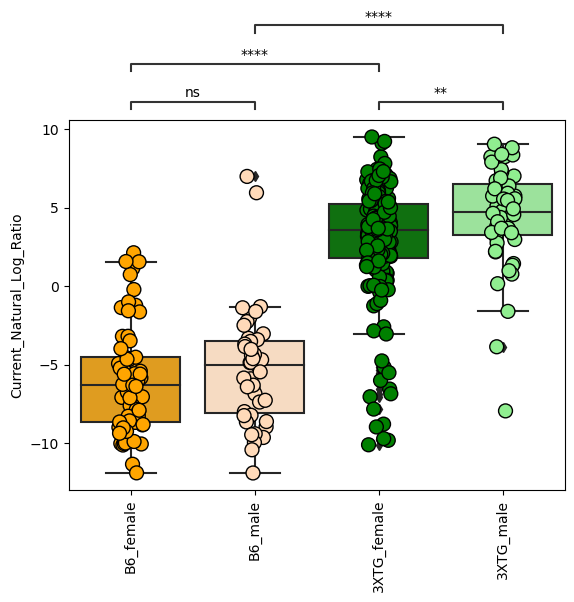

In [64]:
g = sns.boxplot(data=RPCA_Ax2_MuciliAkk_md, x='genotype_sex', y='Current_Natural_Log_Ratio',
               order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'])
g = sns.stripplot(data=RPCA_Ax2_MuciliAkk_md, x='genotype_sex', y='Current_Natural_Log_Ratio', 
                  order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'],
                 s=10, edgecolor='k', linewidth=1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


pairs=[('B6_female', 'B6_male'), ('B6_female', '3XTG_female'), 
       ('B6_male', '3XTG_male'), ('3XTG_female', '3XTG_male')]

annotator = Annotator(g, pairs, data=RPCA_Ax2_MuciliAkk_md, x='genotype_sex', y='Current_Natural_Log_Ratio',
               order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'])
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

plt.xlabel("")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_RPCA_Ax2_MuciliAkk_LR_boxplot.svg',
           bbox_inches='tight', dpi=150)

In [65]:
RPCA_Ax2_MuciliAkk_md['host_age'] = pd.to_numeric(RPCA_Ax2_MuciliAkk_md['host_age'])

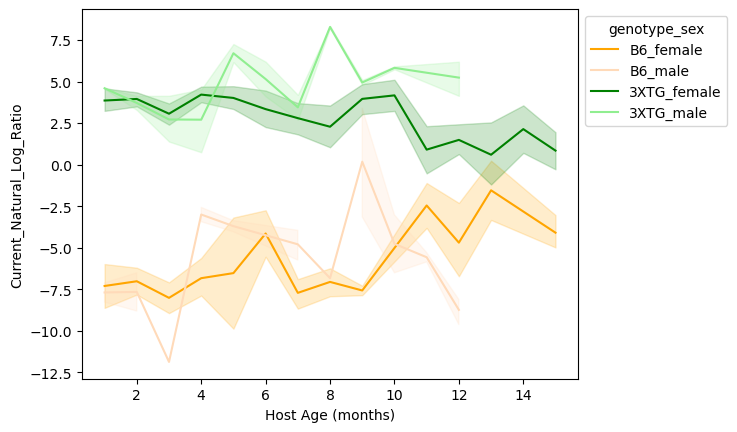

In [66]:
g = sns.lineplot(data=RPCA_Ax2_MuciliAkk_md, x='host_age', y='Current_Natural_Log_Ratio', 
                 hue='genotype_sex', ci=68, 
                 hue_order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Host Age (months)")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_RPCA_Ax2_MuciliAkk_LR_lineplot.png',
           bbox_inches='tight', dpi=150)
#timepoint 7, 12, and 15 are from sacrificed mice

/Users/callaband/miniforge3/envs/plotting/lib/python3.11/site-packages/seaborn/categorical.py:1296: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


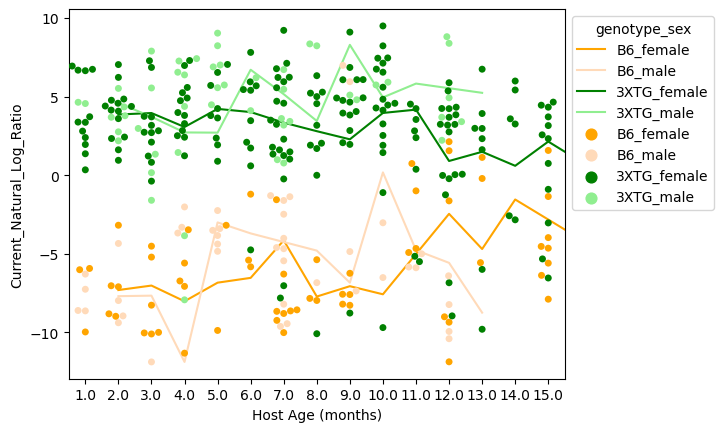

In [69]:
g = sns.lineplot(data=RPCA_Ax2_MuciliAkk_md, x='host_age', y='Current_Natural_Log_Ratio', 
                 hue='genotype_sex', ci=None, 
                 hue_order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'])
g = sns.swarmplot(data=RPCA_Ax2_MuciliAkk_md, x='host_age', y='Current_Natural_Log_Ratio', 
                 hue='genotype_sex', 
                 hue_order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Host Age (months)")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_RPCA_Ax2_MuciliAkk_linescatterplot.png',
           bbox_inches='tight', dpi=150)
#timepoint 7, 12, and 15 are from sacrificed mice

In [68]:
RPCA_Ax2_MuciliAkk_md2 = RPCA_Ax2_MuciliAkk_md[RPCA_Ax2_MuciliAkk_md['Current_Natural_Log_Ratio']< -3]
RPCA_Ax2_MuciliAkk_md2.genotype_sex.value_counts()

B6_female      50
B6_male        35
3XTG_female    15
3XTG_male       2
Name: genotype_sex, dtype: int64

In [70]:
RPCA_Ax2_MuciliAkk_md2.head()

Current_Natural_Log_Ratio     anonymized_name  \
14748.CAGE66.FSPFB6.L4.1                  -7.074216  CAGE66.FSPFB6.L4.1   
14748.CAGE46.MSPFB6.L9.1                  -4.861635  CAGE46.MSPFB6.L9.1   
14748.CAGE27.FSPFB6.L4.1                  -6.731953  CAGE27.FSPFB6.L4.1   
14748.CAGE27.FSPFB6.L3.1                 -10.002377  CAGE27.FSPFB6.L3.1   
14748.CAGE45.MSPFB6.L3.2                 -11.883409  CAGE45.MSPFB6.L3.2   

                         collection_timestamp description  dna_extracted  \
14748.CAGE66.FSPFB6.L4.1              12/1/20         NaN          False   
14748.CAGE46.MSPFB6.L9.1              1/10/21         NaN          False   
14748.CAGE27.FSPFB6.L4.1              7/13/20         NaN          False   
14748.CAGE27.FSPFB6.L3.1               6/8/20         NaN          False   
14748.CAGE45.MSPFB6.L3.2              7/30/20         NaN          False   

                          elevation           empo_1  empo_2  \
14748.CAGE66.FSPFB6.L4.1        263  Host-associated  Animal   
14748.CAGE46.MSPFB6.L9.1        263  Host-associated  Animal   
14748.CAGE27.FSPFB6.L4.1        263  Host-associated  Animal   
14748.CAGE27.FSPFB6.L3.1        263  Host-associated  Animal   
14748.CAGE45.MSPFB6.L3.2        263  Host-associated  Animal   

                                     empo_3    env_biome  ...  \
14748.CAGE66.FSPFB6.L4.1  Animal distal gut  urban biome  ...   
14748.CAGE46.MSPFB6.L9.1  Animal distal gut  urban biome  ...   
14748.CAGE27.FSPFB6.L4.1  Animal distal gut  urban biome  ...   
14748.CAGE27.FSPFB6.L3.1  Animal distal gut  urban biome  ...   
14748.CAGE45.MSPFB6.L3.2  Animal distal gut  urban biome  ...   

                               scientific_name     sex    study_type taxon_id  \
14748.CAGE66.FSPFB6.L4.1  mouse gut metagenome  female  Longitudinal   410661   
14748.CAGE46.MSPFB6.L9.1  mouse gut metagenome    male  Longitudinal   410661   
14748.CAGE27.FSPFB6.L4.1  mouse gut metagenome  female  Longitudinal   410661   
14748.CAGE27.FSPFB6.L3.1  mouse gut metagenome  female  Longitudinal   410661   
14748.CAGE45.MSPFB6.L3.2  mouse gut metagenome    male  Longitudinal   410661   

                                                                      title  \
14748.CAGE66.FSPFB6.L4.1  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE46.MSPFB6.L9.1  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE27.FSPFB6.L4.1  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE27.FSPFB6.L3.1  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE45.MSPFB6.L3.2  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   

                            tube_id  keep genotype_sex    cohort genotype_tp  
14748.CAGE66.FSPFB6.L4.1  363130483  True    B6_female  COHORT 8        B6_4  
14748.CAGE46.MSPFB6.L9.1  363130497  True      B6_male  COHORT 6        B6_9  
14748.CAGE27.FSPFB6.L4.1  363131320  True    B6_female  COHORT 4        B6_4  
14748.CAGE27.FSPFB6.L3.1  363131288  True    B6_female  COHORT 4        B6_3  
14748.CAGE45.MSPFB6.L3.2  363131284  True      B6_male  COHORT 6        B6_3  

[5 rows x 41 columns]

In [71]:
RPCA_Ax2_MuciliAkk_3xTG_lowLR = RPCA_Ax2_MuciliAkk_md2[RPCA_Ax2_MuciliAkk_md2.genotype_sex.isin(['3XTG_female', '3XTG_male'])].copy()
RPCA_Ax2_MuciliAkk_3xTG_lowLR

Current_Natural_Log_Ratio  \
14748.CAGE6.FSPF3XTG.L13.2                         -9.805047   
14748.CAGE3.FSPF3XTG.L15.1                         -5.327876   
14748.CAGE3.FSPF3XTG.L15.2                         -6.542904   
14748.CAGE40.FSPF3XTG.L8.2                        -10.089241   
14748.CAGE73.MSPF3XTG.L4.1                         -3.851892   
14748.CAGE73.MSPF3XTG.L4.2                         -7.931734   
14748.CAGE6.FSPF3XTG.L9.1                          -8.775137   
14748.CAGE6.FSPF3XTG.L11.1                         -5.159939   
14748.CAGE6.FSPF3XTG.L12.2                         -6.844034   
14748.CAGE6.FSPF3XTG.L13.1                         -5.994896   
14748.CAGE6.FSPF3XTG.L10.1                         -9.698000   
14748.CAGE6.FSPF3XTG.L12.1                         -8.953614   
14748.CAGE6.FSPF3XTG.L11.2                         -5.501340   
14748.CAGE40.FSPF3XTG.L6.1                         -4.753051   
14748.MOUSE33.CAGE12.FSPF3XTG.S15                  -3.038552   
14748.MOUSE58.CAGE53.FSPF3XTG.S7                   -7.033002   
14748.MOUSE55.CAGE53.FSPF3XTG.S7                   -7.817122   

                                               anonymized_name  \
14748.CAGE6.FSPF3XTG.L13.2                CAGE6.FSPF3XTG.L13.2   
14748.CAGE3.FSPF3XTG.L15.1                CAGE3.FSPF3XTG.L15.1   
14748.CAGE3.FSPF3XTG.L15.2                CAGE3.FSPF3XTG.L15.2   
14748.CAGE40.FSPF3XTG.L8.2                CAGE40.FSPF3XTG.L8.2   
14748.CAGE73.MSPF3XTG.L4.1                CAGE73.MSPF3XTG.L4.1   
14748.CAGE73.MSPF3XTG.L4.2                CAGE73.MSPF3XTG.L4.2   
14748.CAGE6.FSPF3XTG.L9.1                  CAGE6.FSPF3XTG.L9.1   
14748.CAGE6.FSPF3XTG.L11.1                CAGE6.FSPF3XTG.L11.1   
14748.CAGE6.FSPF3XTG.L12.2                CAGE6.FSPF3XTG.L12.2   
14748.CAGE6.FSPF3XTG.L13.1                CAGE6.FSPF3XTG.L13.1   
14748.CAGE6.FSPF3XTG.L10.1                CAGE6.FSPF3XTG.L10.1   
14748.CAGE6.FSPF3XTG.L12.1                CAGE6.FSPF3XTG.L12.1   
14748.CAGE6.FSPF3XTG.L11.2                CAGE6.FSPF3XTG.L11.2   
14748.CAGE40.FSPF3XTG.L6.1                CAGE40.FSPF3XTG.L6.1   
14748.MOUSE33.CAGE12.FSPF3XTG.S15  MOUSE33.CAGE12.FSPF3XTG.S15   
14748.MOUSE58.CAGE53.FSPF3XTG.S7    MOUSE58.CAGE53.FSPF3XTG.S7   
14748.MOUSE55.CAGE53.FSPF3XTG.S7    MOUSE55.CAGE53.FSPF3XTG.S7   

                                  collection_timestamp description  \
14748.CAGE6.FSPF3XTG.L13.2                      6/8/20         NaN   
14748.CAGE3.FSPF3XTG.L15.1                     8/18/20         NaN   
14748.CAGE3.FSPF3XTG.L15.2                     8/18/20         NaN   
14748.CAGE40.FSPF3XTG.L8.2                     1/10/21         NaN   
14748.CAGE73.MSPF3XTG.L4.1                     12/1/20         NaN   
14748.CAGE73.MSPF3XTG.L4.2                     12/1/20         NaN   
14748.CAGE6.FSPF3XTG.L9.1                      1/28/20         NaN   
14748.CAGE6.FSPF3XTG.L11.1                      4/6/20         NaN   
14748.CAGE6.FSPF3XTG.L12.2                     5/11/20         NaN   
14748.CAGE6.FSPF3XTG.L13.1                      6/8/20         NaN   
14748.CAGE6.FSPF3XTG.L10.1                      3/2/20         NaN   
14748.CAGE6.FSPF3XTG.L12.1                     5/11/20         NaN   
14748.CAGE6.FSPF3XTG.L11.2                      4/6/20         NaN   
14748.CAGE40.FSPF3XTG.L6.1                     11/2/20         NaN   
14748.MOUSE33.CAGE12.FSPF3XTG.S15              9/18/20         NaN   
14748.MOUSE58.CAGE53.FSPF3XTG.S7              11/20/20         NaN   
14748.MOUSE55.CAGE53.FSPF3XTG.S7              11/18/20         NaN   

                                   dna_extracted  elevation           empo_1  \
14748.CAGE6.FSPF3XTG.L13.2                 False        263  Host-associated   
14748.CAGE3.FSPF3XTG.L15.1                 False        263  Host-associated   
14748.CAGE3.FSPF3XTG.L15.2                 False        263  Host-associated   
14748.CAGE40.FSPF3XTG.L8.2                 False        263  Host-associated   
14748.CAGE73.MSPF3XTG.L4.1      

In [72]:
RPCA_Ax2_MuciliAkk_3xTG_lowLR.sex.value_counts()

female    15
male       2
Name: sex, dtype: int64

In [73]:
RPCA_Ax2_MuciliAkk_3xTG_lowLR.host_age.value_counts()

15.0    3
13.0    2
4.0     2
11.0    2
12.0    2
7.0     2
8.0     1
9.0     1
10.0    1
6.0     1
Name: host_age, dtype: int64

In [74]:
RPCA_Ax2_MuciliAkk_3xTG_lowLR.host_subject_id.value_counts()

CAGE 6     8
CAGE 3     2
CAGE 40    2
CAGE 73    2
CAGE 53    2
CAGE 12    1
Name: host_subject_id, dtype: int64

In [75]:
df_filtered = RPCA_Ax2_MuciliAkk_3xTG_lowLR.query("sex == 'female' & host_subject_id == 'CAGE 6'")
df_filtered.host_age.value_counts()

13.0    2
11.0    2
12.0    2
9.0     1
10.0    1
Name: host_age, dtype: int64

In [76]:
df_filtered

Current_Natural_Log_Ratio       anonymized_name  \
14748.CAGE6.FSPF3XTG.L13.2                  -9.805047  CAGE6.FSPF3XTG.L13.2   
14748.CAGE6.FSPF3XTG.L9.1                   -8.775137   CAGE6.FSPF3XTG.L9.1   
14748.CAGE6.FSPF3XTG.L11.1                  -5.159939  CAGE6.FSPF3XTG.L11.1   
14748.CAGE6.FSPF3XTG.L12.2                  -6.844034  CAGE6.FSPF3XTG.L12.2   
14748.CAGE6.FSPF3XTG.L13.1                  -5.994896  CAGE6.FSPF3XTG.L13.1   
14748.CAGE6.FSPF3XTG.L10.1                  -9.698000  CAGE6.FSPF3XTG.L10.1   
14748.CAGE6.FSPF3XTG.L12.1                  -8.953614  CAGE6.FSPF3XTG.L12.1   
14748.CAGE6.FSPF3XTG.L11.2                  -5.501340  CAGE6.FSPF3XTG.L11.2   

                           collection_timestamp description  dna_extracted  \
14748.CAGE6.FSPF3XTG.L13.2               6/8/20         NaN          False   
14748.CAGE6.FSPF3XTG.L9.1               1/28/20         NaN          False   
14748.CAGE6.FSPF3XTG.L11.1               4/6/20         NaN          False   
14748.CAGE6.FSPF3XTG.L12.2              5/11/20         NaN          False   
14748.CAGE6.FSPF3XTG.L13.1               6/8/20         NaN          False   
14748.CAGE6.FSPF3XTG.L10.1               3/2/20         NaN          False   
14748.CAGE6.FSPF3XTG.L12.1              5/11/20         NaN          False   
14748.CAGE6.FSPF3XTG.L11.2               4/6/20         NaN          False   

                            elevation           empo_1  empo_2  \
14748.CAGE6.FSPF3XTG.L13.2        263  Host-associated  Animal   
14748.CAGE6.FSPF3XTG.L9.1         263  Host-associated  Animal   
14748.CAGE6.FSPF3XTG.L11.1        263  Host-associated  Animal   
14748.CAGE6.FSPF3XTG.L12.2        263  Host-associated  Animal   
14748.CAGE6.FSPF3XTG.L13.1        263  Host-associated  Animal   
14748.CAGE6.FSPF3XTG.L10.1        263  Host-associated  Animal   
14748.CAGE6.FSPF3XTG.L12.1        263  Host-associated  Animal   
14748.CAGE6.FSPF3XTG.L11.2        263  Host-associated  Animal   

                                       empo_3    env_biome  ...  \
14748.CAGE6.FSPF3XTG.L13.2  Animal distal gut  urban biome  ...   
14748.CAGE6.FSPF3XTG.L9.1   Animal distal gut  urban biome  ...   
14748.CAGE6.FSPF3XTG.L11.1  Animal distal gut  urban biome  ...   
14748.CAGE6.FSPF3XTG.L12.2  Animal distal gut  urban biome  ...   
14748.CAGE6.FSPF3XTG.L13.1  Animal distal gut  urban biome  ...   
14748.CAGE6.FSPF3XTG.L10.1  Animal distal gut  urban biome  ...   
14748.CAGE6.FSPF3XTG.L12.1  Animal distal gut  urban biome  ...   
14748.CAGE6.FSPF3XTG.L11.2  Animal distal gut  urban biome  ...   

                                 scientific_name     sex    study_type  \
14748.CAGE6.FSPF3XTG.L13.2  mouse gut metagenome  female  Longitudinal   
14748.CAGE6.FSPF3XTG.L9.1   mouse gut metagenome  female  Longitudinal   
14748.CAGE6.FSPF3XTG.L11.1  mouse gut metagenome  female  Longitudinal   
14748.CAGE6.FSPF3XTG.L12.2  mouse gut metagenome  female  Longitudinal   
14748.CAGE6.FSPF3XTG.L13.1  mouse gut metagenome  female  Longitudinal   
14748.CAGE6.FSPF3XTG.L10.1  mouse gut metagenome  female  Longitudinal   
14748.CAGE6.FSPF3XTG.L12.1  mouse gut metagenome  female  Longitudinal   
14748.CAGE6.FSPF3XTG.L11.2  mouse gut metagenome  female  Longitudinal   

                           taxon_id  \
14748.CAGE6.FSPF3XTG.L13.2   410661   
14748.CAGE6.FSPF3XTG.L9.1    410661   
14748.CAGE6.FSPF3XTG.L11.1   410661   
14748.CAGE6.FSPF3XTG.L12.2   410661   
14748.CAGE6.FSPF3XTG.L13.1   410661   
14748.CAGE6.FSPF3XTG.L10.1   410661   
14748.CAGE6.FSPF3XTG.L12.1   410661   
14748.CAGE6.FSPF3XTG.L11.2   410661   

                                                                        title  \
14748.CAGE6.FSPF3XTG.L13.2  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE6.FSPF3XTG.L9.1   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE6.FSPF3XTG.L11.1  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE6.FSPF3XTG.L12.2  Project 3 3XTG Aim 1-Alzheimers Gut Microbi

#### After rerun

In [68]:
rerun_genoLR = pd.read_csv('../data/Microbiome/pooling_filtered/RPCA_all/3XTG_RPCA_arrows_lr.tsv', 
                             sep='\t', index_col=0, usecols=['Sample ID', 'Current_Natural_Log_Ratio'])
rerun_genoLR.head()
#RPCA biplot, arrows in opposite directions (genotypes), 4 arrows in each direction
#Numerator associated with C57Bl/6, denominator associated with 3XTG

Current_Natural_Log_Ratio
Sample ID                                             
14748.CAGE41.FSPF3XTG.L10.1                  -5.054770
14748.CAGE21.FSPF3XTG.L9.2                   -4.385532
14748.CAGE41.FSPF3XTG.L2.2                   -4.700537
14748.CAGE40.FSPF3XTG.L10.1                  -4.083757
14748.CAGE41.FSPF3XTG.L7.1                   -5.483688

In [69]:
rerun_genoLR_md = pd.merge(rerun_genoLR, metadata, left_index=True, right_index=True)
rerun_genoLR_md.head()

Current_Natural_Log_Ratio        anonymized_name  \
14748.CAGE41.FSPF3XTG.L10.1                  -5.054770  CAGE41.FSPF3XTG.L10.1   
14748.CAGE21.FSPF3XTG.L9.2                   -4.385532   CAGE21.FSPF3XTG.L9.2   
14748.CAGE41.FSPF3XTG.L2.2                   -4.700537   CAGE41.FSPF3XTG.L2.2   
14748.CAGE40.FSPF3XTG.L10.1                  -4.083757  CAGE40.FSPF3XTG.L10.1   
14748.CAGE41.FSPF3XTG.L7.1                   -5.483688   CAGE41.FSPF3XTG.L7.1   

                            collection_timestamp description  dna_extracted  \
14748.CAGE41.FSPF3XTG.L10.1              3/10/21         NaN          False   
14748.CAGE21.FSPF3XTG.L9.2              11/23/20         NaN          False   
14748.CAGE41.FSPF3XTG.L2.2               6/30/20         NaN          False   
14748.CAGE40.FSPF3XTG.L10.1              3/10/21         NaN          False   
14748.CAGE41.FSPF3XTG.L7.1               12/1/20         NaN          False   

                             elevation           empo_1  empo_2  \
14748.CAGE41.FSPF3XTG.L10.1        263  Host-associated  Animal   
14748.CAGE21.FSPF3XTG.L9.2         263  Host-associated  Animal   
14748.CAGE41.FSPF3XTG.L2.2         263  Host-associated  Animal   
14748.CAGE40.FSPF3XTG.L10.1        263  Host-associated  Animal   
14748.CAGE41.FSPF3XTG.L7.1         263  Host-associated  Animal   

                                        empo_3    env_biome  ...  \
14748.CAGE41.FSPF3XTG.L10.1  Animal distal gut  urban biome  ...   
14748.CAGE21.FSPF3XTG.L9.2   Animal distal gut  urban biome  ...   
14748.CAGE41.FSPF3XTG.L2.2   Animal distal gut  urban biome  ...   
14748.CAGE40.FSPF3XTG.L10.1  Animal distal gut  urban biome  ...   
14748.CAGE41.FSPF3XTG.L7.1   Animal distal gut  urban biome  ...   

                                  scientific_name     sex    study_type  \
14748.CAGE41.FSPF3XTG.L10.1  mouse gut metagenome  female  Longitudinal   
14748.CAGE21.FSPF3XTG.L9.2   mouse gut metagenome  female  Longitudinal   
14748.CAGE41.FSPF3XTG.L2.2   mouse gut metagenome  female  Longitudinal   
14748.CAGE40.FSPF3XTG.L10.1  mouse gut metagenome  female  Longitudinal   
14748.CAGE41.FSPF3XTG.L7.1   mouse gut metagenome  female  Longitudinal   

                            taxon_id  \
14748.CAGE41.FSPF3XTG.L10.1   410661   
14748.CAGE21.FSPF3XTG.L9.2    410661   
14748.CAGE41.FSPF3XTG.L2.2    410661   
14748.CAGE40.FSPF3XTG.L10.1   410661   
14748.CAGE41.FSPF3XTG.L7.1    410661   

                                                                         title  \
14748.CAGE41.FSPF3XTG.L10.1  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE21.FSPF3XTG.L9.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE41.FSPF3XTG.L2.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE40.FSPF3XTG.L10.1  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE41.FSPF3XTG.L7.1   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   

                               tube_id  keep genotype_sex    cohort  \
14748.CAGE41.FSPF3XTG.L10.1  363130500  True  3XTG_female  COHORT 6   
14748.CAGE21.FSPF3XTG.L9.2   363132072  True  3XTG_female  COHORT 4   
14748.CAGE41.FSPF3XTG.L2.2   363131324  True  3XTG_female  COHORT 6   
14748.CAGE40.FSPF3XTG.L10.1  363130487  True  3XTG_female  COHORT 6   
14748.CAGE41.FSPF3XTG.L7.1   363130482  True  3XTG_female  COHORT 6   

                            genotype_tp  
14748.CAGE41.FSPF3XTG.L10.1     3XTG_10  
14748.CAGE21.FSPF3XTG.L9.2       3XTG_9  
14748.CAGE41.FSPF3XTG.L2.2       3XTG_2  
14748.CAGE40.FSPF3XTG.L10.1     3XTG_10  
14748.CAGE41.FSPF3XTG.L7.1       3XTG_7  

[5 rows x 41 columns]

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

B6_female vs. B6_male: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.003e-01 U_stat=1.405e+03
3XTG_female vs. 3XTG_male: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.776e-04 U_stat=4.179e+03
B6_female vs. 3XTG_female: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.709e-24 U_stat=9.205e+03
B6_male vs. 3XTG_male: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.277e-13 U_stat=1.838e+03


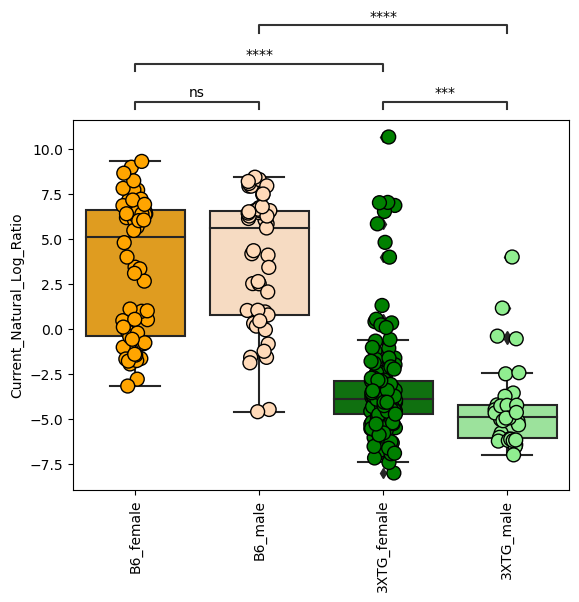

In [70]:
g = sns.boxplot(data=rerun_genoLR_md, x='genotype_sex', y='Current_Natural_Log_Ratio',
               order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'])
g = sns.stripplot(data=rerun_genoLR_md, x='genotype_sex', y='Current_Natural_Log_Ratio', 
                  order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'],
                 s=10, edgecolor='k', linewidth=1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


pairs=[('B6_female', 'B6_male'), ('B6_female', '3XTG_female'), 
       ('B6_male', '3XTG_male'), ('3XTG_female', '3XTG_male')]

annotator = Annotator(g, pairs, data=rerun_genoLR_md, x='genotype_sex', y='Current_Natural_Log_Ratio',
               order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'])
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside',
                   comparisons_correction="BH")
annotator.apply_and_annotate()

plt.xlabel("")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_RPCA_genotype-arrows_LR_boxplot.svg',
           bbox_inches='tight', dpi=150)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

B6 vs. 3XTG: Mann-Whitney-Wilcoxon test two-sided, P_val:1.181e-37 U_stat=2.056e+04


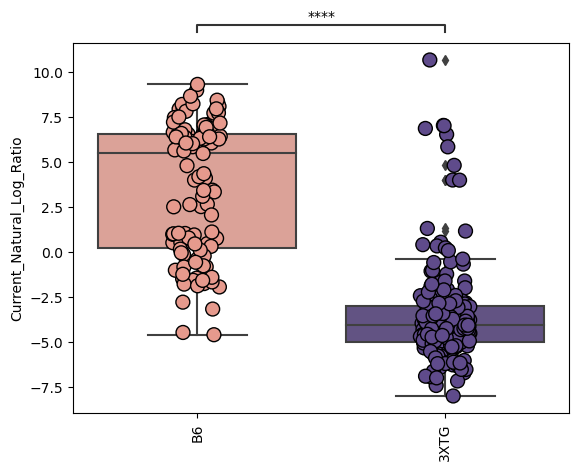

In [71]:
g = sns.boxplot(data=rerun_genoLR_md, x='genotype', y='Current_Natural_Log_Ratio',
               order=['B6', '3XTG'],
               palette=['#E69A8D', '#5F4B8B'])
g = sns.stripplot(data=rerun_genoLR_md, x='genotype', y='Current_Natural_Log_Ratio', 
                  order=['B6', '3XTG'],
               palette=['#E69A8D', '#5F4B8B'],
                 s=10, edgecolor='k', linewidth=1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


pairs=[('B6', '3XTG'),]

annotator = Annotator(g, pairs, data=rerun_genoLR_md, x='genotype', y='Current_Natural_Log_Ratio',
               order=['B6', '3XTG'])
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

plt.xlabel("")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_RPCA_genotype-arrows_LR_boxplot_newcolors.svg',
           bbox_inches='tight', dpi=150)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

12.0_B6 vs. 12.0_3XTG: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.650e-05 U_stat=1.690e+02
7.0_B6 vs. 7.0_3XTG: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:7.423e-03 U_stat=1.060e+02
15.0_B6 vs. 15.0_3XTG: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.768e-02 U_stat=3.200e+01


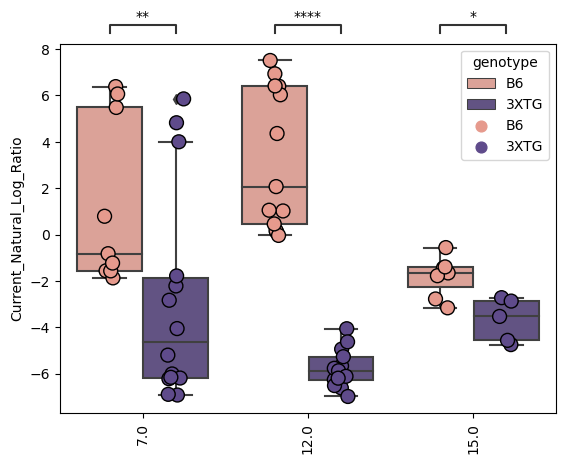

In [102]:
g = sns.boxplot(data=rerun_genoLR_md[rerun_genoLR_md['study_type']=='Sacrifice'], 
                x='host_age', y='Current_Natural_Log_Ratio', 
                hue='genotype', hue_order=['B6', '3XTG'], palette=['#E69A8D', '#5F4B8B'])
g = sns.stripplot(data=rerun_genoLR_md[rerun_genoLR_md['study_type']=='Sacrifice'], 
                  x='host_age', y='Current_Natural_Log_Ratio', 
                  hue='genotype', hue_order=['B6', '3XTG'], palette=['#E69A8D', '#5F4B8B'],
                 s=10, edgecolor='k', linewidth=1, dodge=True)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


pairs=[((7.0, 'B6'),(7.0, '3XTG')),((12.0, 'B6'),(12.0, '3XTG')), ((15.0, 'B6'),(15.0, '3XTG'))]

annotator = Annotator(g, pairs, data=rerun_genoLR_md[rerun_genoLR_md['study_type']=='Sacrifice'], 
                      x='host_age', y='Current_Natural_Log_Ratio',
               hue='genotype', hue_order=['B6', '3XTG'])
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside',
                   comparisons_correction="BH")
annotator.apply_and_annotate()

plt.xlabel("")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_RPCA_genotype-arrows_LR_sac-boxplot_newcolors.svg',
           bbox_inches='tight', dpi=150)

In [110]:
rerun_genoLR_md.sex.value_counts()

female    220
male       88
Name: sex, dtype: int64

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

7.0_3XTG_female vs. 7.0_B6_female: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.399e-02 U_stat=1.000e+00
12.0_3XTG_female vs. 12.0_B6_female: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.166e-03 U_stat=0.000e+00
15.0_3XTG_female vs. 15.0_B6_female: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.768e-02 U_stat=3.000e+00
7.0_3XTG_male vs. 7.0_B6_male: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:9.524e-03 U_stat=0.000e+00
12.0_3XTG_male vs. 12.0_B6_male: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.166e-03 U_stat=0.000e+00


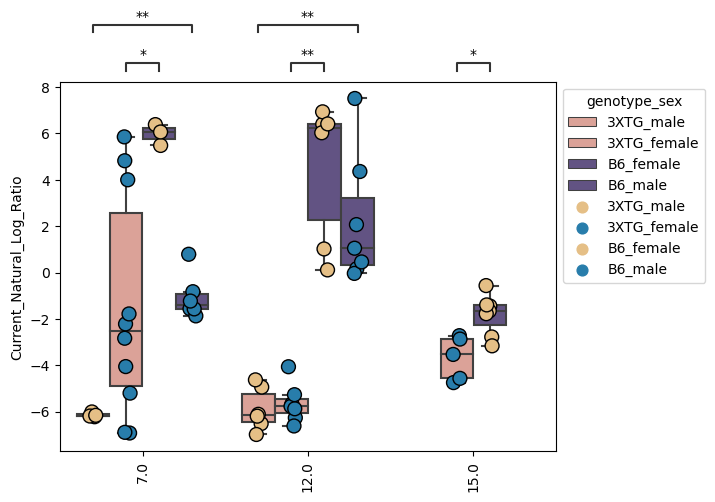

In [120]:
g = sns.boxplot(data=rerun_genoLR_md[rerun_genoLR_md['study_type']=='Sacrifice'], 
                x='host_age', y='Current_Natural_Log_Ratio', 
                hue='genotype_sex', palette=['#E69A8D', '#E69A8D', '#5F4B8B', '#5F4B8B'])
g = sns.stripplot(data=rerun_genoLR_md[rerun_genoLR_md['study_type']=='Sacrifice'], 
                  x='host_age', y='Current_Natural_Log_Ratio', 
                  hue='genotype_sex', palette=['#E5BF86', '#287DAB', '#E5BF86', '#287DAB'],
                 s=10, edgecolor='k', linewidth=1, dodge=True)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


pairs=[((7.0, 'B6_male'),(7.0, '3XTG_male')),((7.0, 'B6_female'),(7.0, '3XTG_female')),
       ((12.0, 'B6_male'),(12.0, '3XTG_male')),((12.0, 'B6_female'),(12.0, '3XTG_female')),
      ((15.0, 'B6_female'),(15.0, '3XTG_female'))]

annotator = Annotator(g, pairs, 
                      data=rerun_genoLR_md[rerun_genoLR_md['study_type']=='Sacrifice'], 
                      x='host_age', y='Current_Natural_Log_Ratio',
                      hue='genotype_sex',)
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside',
                   comparisons_correction="BH")
annotator.apply_and_annotate()
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_RPCA_genotype-arrows_LR_sac-boxplot_newcolors_genotype-sex.svg',
           bbox_inches='tight', dpi=150)

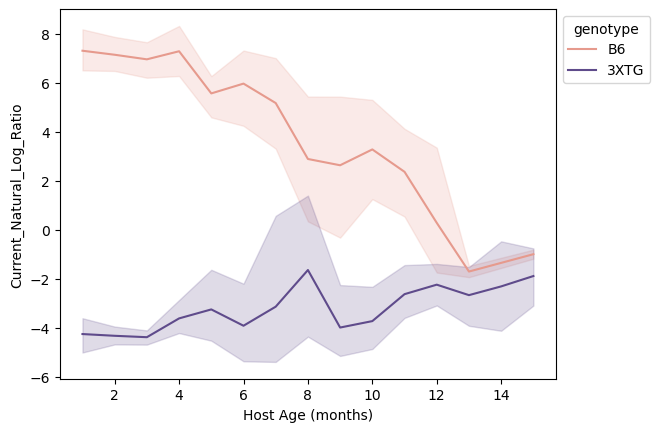

In [92]:
g = sns.lineplot(data=rerun_genoLR_md[rerun_genoLR_md['study_type']=='Longitudinal'], 
                 x='host_age', y='Current_Natural_Log_Ratio', 
                 hue='genotype', ci=95, 
                 hue_order=['B6', '3XTG'],
               palette=['#E69A8D', '#5F4B8B'])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Host Age (months)")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_RPCA_genotype-arrows_LR_long-lineplot_newcolors_ci95.svg',
           bbox_inches='tight', dpi=150)
#timepoint 7, 12, and 15 are from sacrificed mice

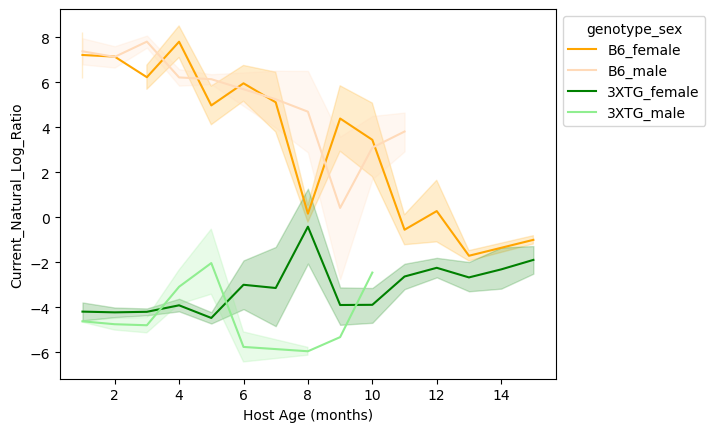

In [82]:
g = sns.lineplot(data=rerun_genoLR_md[rerun_genoLR_md['study_type']=='Longitudinal'], 
                 x='host_age', y='Current_Natural_Log_Ratio', 
                 hue='genotype_sex', ci=68, 
                 hue_order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Host Age (months)")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_RPCA_genotype-arrows_LR_lineplot_long.svg',
           bbox_inches='tight', dpi=150)
#longitudinal samples only

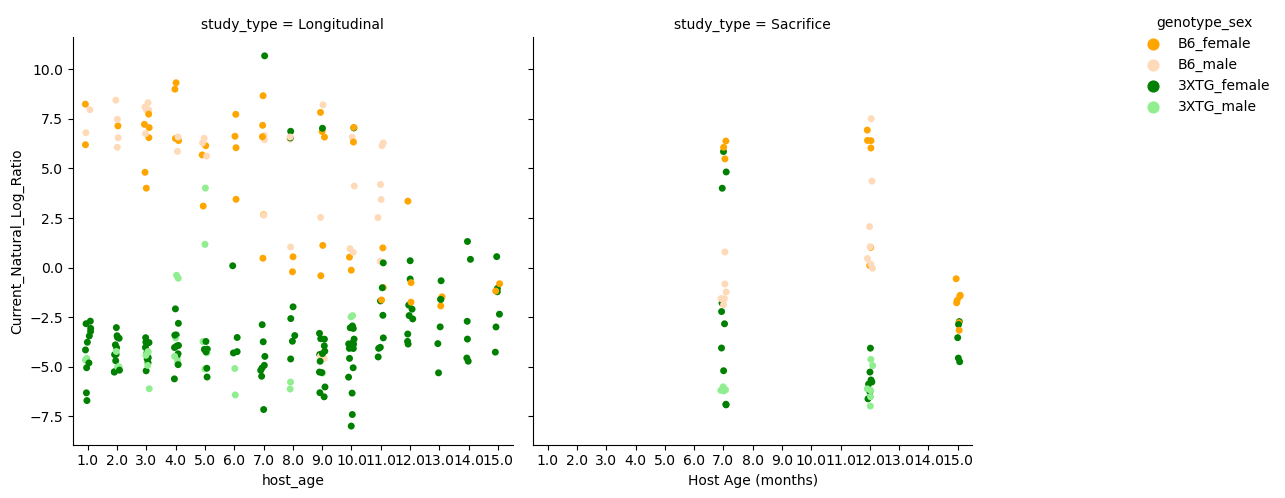

In [81]:
g = sns.catplot(data=rerun_genoLR_md, x='host_age', y='Current_Natural_Log_Ratio', 
                 hue='genotype_sex', col='study_type',
                 hue_order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Host Age (months)")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_RPCA_genotype-arrows_LR_catplot.svg',
           bbox_inches='tight', dpi=150)
#timepoint 7, 12, and 15 are from sacrificed mice

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Longitudinal vs. Sacrifice: Mann-Whitney-Wilcoxon test two-sided, P_val:2.736e-01 U_stat=8.216e+03


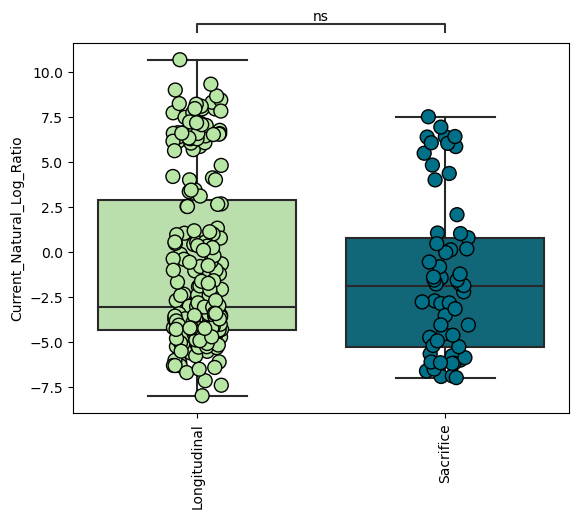

In [72]:
g = sns.boxplot(data=rerun_genoLR_md, x='study_type', y='Current_Natural_Log_Ratio',
               order=['Longitudinal', 'Sacrifice'],
               palette=['#B7E6A5', '#007188'])
g = sns.stripplot(data=rerun_genoLR_md, x='study_type', y='Current_Natural_Log_Ratio', 
                  order=['Longitudinal', 'Sacrifice'],
               palette=['#B7E6A5', '#007188'],
                 s=10, edgecolor='k', linewidth=1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


pairs=[('Longitudinal', 'Sacrifice'),]

annotator = Annotator(g, pairs, data=rerun_genoLR_md, x='study_type', y='Current_Natural_Log_Ratio',
               order=['Longitudinal', 'Sacrifice'])
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

plt.xlabel("")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_RPCA_genotype-arrows_LR_boxplot_newcolors_study-type.svg',
           bbox_inches='tight', dpi=150)

In [93]:
AkkLigi_LR = pd.read_csv('../data/Microbiome/pooling_filtered/RPCA_all/3XTG_genus-Akkermansia-v-Ligilactobacillus_lr.tsv', 
                             sep='\t', index_col=0, usecols=['Sample ID', 'Current_Natural_Log_Ratio'])
AkkLigi_LR.head()
#Numerator all 9 OGU in Akkermansia genus, All 29 OGU in Ligilactobacillus

Current_Natural_Log_Ratio
Sample ID                                             
14748.CAGE41.FSPF3XTG.L10.1                  -2.901206
14748.CAGE21.FSPF3XTG.L9.2                   -7.630180
14748.CAGE41.FSPF3XTG.L2.2                   -4.661346
14748.CAGE40.FSPF3XTG.L10.1                  -8.372135
14748.CAGE41.FSPF3XTG.L7.1                   -5.300520

In [94]:
AkkLigi_LR_md = pd.merge(AkkLigi_LR, metadata, left_index=True, right_index=True)
AkkLigi_LR_md.head()

Current_Natural_Log_Ratio        anonymized_name  \
14748.CAGE41.FSPF3XTG.L10.1                  -2.901206  CAGE41.FSPF3XTG.L10.1   
14748.CAGE21.FSPF3XTG.L9.2                   -7.630180   CAGE21.FSPF3XTG.L9.2   
14748.CAGE41.FSPF3XTG.L2.2                   -4.661346   CAGE41.FSPF3XTG.L2.2   
14748.CAGE40.FSPF3XTG.L10.1                  -8.372135  CAGE40.FSPF3XTG.L10.1   
14748.CAGE41.FSPF3XTG.L7.1                   -5.300520   CAGE41.FSPF3XTG.L7.1   

                            collection_timestamp description  dna_extracted  \
14748.CAGE41.FSPF3XTG.L10.1              3/10/21         NaN          False   
14748.CAGE21.FSPF3XTG.L9.2              11/23/20         NaN          False   
14748.CAGE41.FSPF3XTG.L2.2               6/30/20         NaN          False   
14748.CAGE40.FSPF3XTG.L10.1              3/10/21         NaN          False   
14748.CAGE41.FSPF3XTG.L7.1               12/1/20         NaN          False   

                             elevation           empo_1  empo_2  \
14748.CAGE41.FSPF3XTG.L10.1        263  Host-associated  Animal   
14748.CAGE21.FSPF3XTG.L9.2         263  Host-associated  Animal   
14748.CAGE41.FSPF3XTG.L2.2         263  Host-associated  Animal   
14748.CAGE40.FSPF3XTG.L10.1        263  Host-associated  Animal   
14748.CAGE41.FSPF3XTG.L7.1         263  Host-associated  Animal   

                                        empo_3    env_biome  ...  \
14748.CAGE41.FSPF3XTG.L10.1  Animal distal gut  urban biome  ...   
14748.CAGE21.FSPF3XTG.L9.2   Animal distal gut  urban biome  ...   
14748.CAGE41.FSPF3XTG.L2.2   Animal distal gut  urban biome  ...   
14748.CAGE40.FSPF3XTG.L10.1  Animal distal gut  urban biome  ...   
14748.CAGE41.FSPF3XTG.L7.1   Animal distal gut  urban biome  ...   

                                  scientific_name     sex    study_type  \
14748.CAGE41.FSPF3XTG.L10.1  mouse gut metagenome  female  Longitudinal   
14748.CAGE21.FSPF3XTG.L9.2   mouse gut metagenome  female  Longitudinal   
14748.CAGE41.FSPF3XTG.L2.2   mouse gut metagenome  female  Longitudinal   
14748.CAGE40.FSPF3XTG.L10.1  mouse gut metagenome  female  Longitudinal   
14748.CAGE41.FSPF3XTG.L7.1   mouse gut metagenome  female  Longitudinal   

                            taxon_id  \
14748.CAGE41.FSPF3XTG.L10.1   410661   
14748.CAGE21.FSPF3XTG.L9.2    410661   
14748.CAGE41.FSPF3XTG.L2.2    410661   
14748.CAGE40.FSPF3XTG.L10.1   410661   
14748.CAGE41.FSPF3XTG.L7.1    410661   

                                                                         title  \
14748.CAGE41.FSPF3XTG.L10.1  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE21.FSPF3XTG.L9.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE41.FSPF3XTG.L2.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE40.FSPF3XTG.L10.1  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE41.FSPF3XTG.L7.1   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   

                               tube_id  keep genotype_sex    cohort  \
14748.CAGE41.FSPF3XTG.L10.1  363130500  True  3XTG_female  COHORT 6   
14748.CAGE21.FSPF3XTG.L9.2   363132072  True  3XTG_female  COHORT 4   
14748.CAGE41.FSPF3XTG.L2.2   363131324  True  3XTG_female  COHORT 6   
14748.CAGE40.FSPF3XTG.L10.1  363130487  True  3XTG_female  COHORT 6   
14748.CAGE41.FSPF3XTG.L7.1   363130482  True  3XTG_female  COHORT 6   

                            genotype_tp  
14748.CAGE41.FSPF3XTG.L10.1     3XTG_10  
14748.CAGE21.FSPF3XTG.L9.2       3XTG_9  
14748.CAGE41.FSPF3XTG.L2.2       3XTG_2  
14748.CAGE40.FSPF3XTG.L10.1     3XTG_10  
14748.CAGE41.FSPF3XTG.L7.1       3XTG_7  

[5 rows x 41 columns]

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

B6_female vs. B6_male: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.805e-01 U_stat=1.634e+03
3XTG_female vs. 3XTG_male: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.430e-02 U_stat=3.667e+03
B6_female vs. 3XTG_female: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.540e-19 U_stat=8.739e+03
B6_male vs. 3XTG_male: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.986e-08 U_stat=1.558e+03


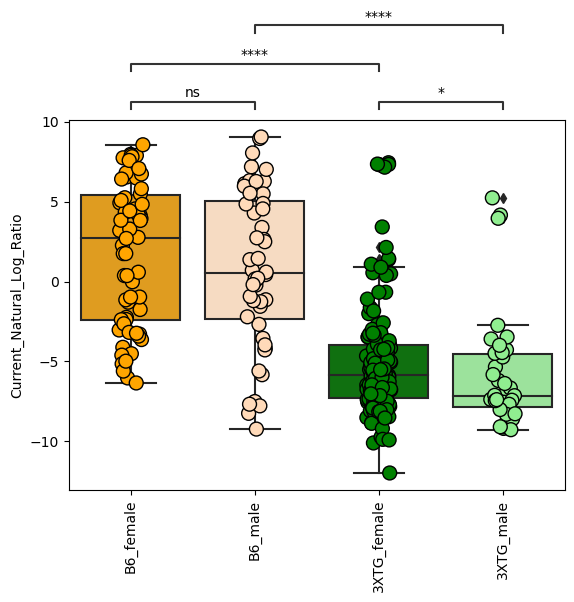

In [95]:
g = sns.boxplot(data=AkkLigi_LR_md, x='genotype_sex', y='Current_Natural_Log_Ratio',
               order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'])
g = sns.stripplot(data=AkkLigi_LR_md, x='genotype_sex', y='Current_Natural_Log_Ratio', 
                  order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'],
                 s=10, edgecolor='k', linewidth=1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


pairs=[('B6_female', 'B6_male'), ('B6_female', '3XTG_female'), 
       ('B6_male', '3XTG_male'), ('3XTG_female', '3XTG_male')]

annotator = Annotator(g, pairs, data=AkkLigi_LR_md, x='genotype_sex', y='Current_Natural_Log_Ratio',
               order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'])
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside',
                   comparisons_correction="BH")
annotator.apply_and_annotate()

plt.xlabel("")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_gAkk-Ligi_LR_boxplot.svg',
           bbox_inches='tight', dpi=150)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

B6 vs. 3XTG: Mann-Whitney-Wilcoxon test two-sided, P_val:1.269e-26 U_stat=1.871e+04


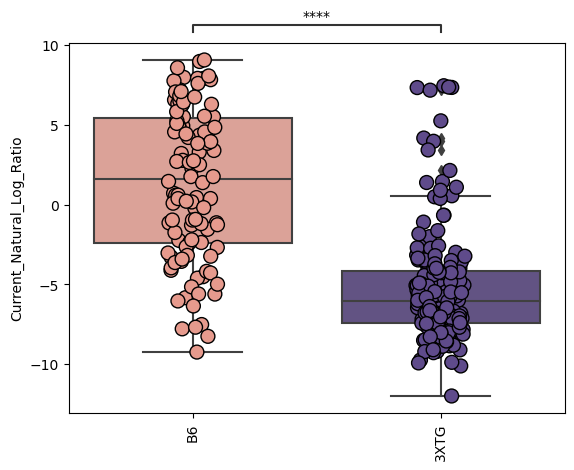

In [96]:
g = sns.boxplot(data=AkkLigi_LR_md, x='genotype', y='Current_Natural_Log_Ratio',
               order=['B6', '3XTG'],
               palette=['#E69A8D', '#5F4B8B'])
g = sns.stripplot(data=AkkLigi_LR_md, x='genotype', y='Current_Natural_Log_Ratio', 
                  order=['B6', '3XTG'],
               palette=['#E69A8D', '#5F4B8B'],
                 s=10, edgecolor='k', linewidth=1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


pairs=[('B6', '3XTG'),]

annotator = Annotator(g, pairs, data=AkkLigi_LR_md, x='genotype', y='Current_Natural_Log_Ratio',
               order=['B6', '3XTG'])
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

plt.xlabel("")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_gAkk-Ligi_LR_boxplot_newcolors.svg',
           bbox_inches='tight', dpi=150)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

12.0_B6 vs. 12.0_3XTG: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.650e-05 U_stat=1.690e+02
7.0_B6 vs. 7.0_3XTG: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.227e-01 U_stat=8.800e+01
15.0_B6 vs. 15.0_3XTG: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.010e-02 U_stat=3.300e+01


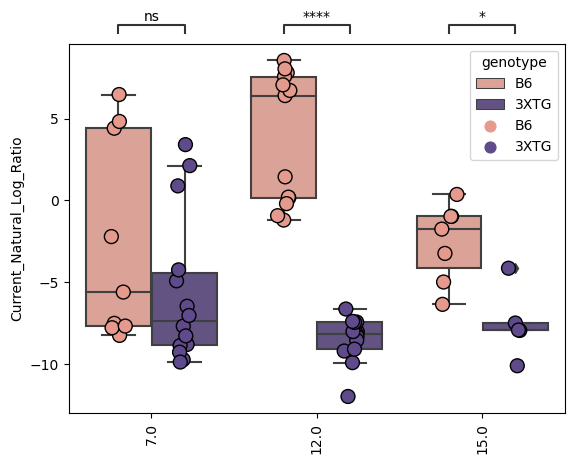

In [121]:
g = sns.boxplot(data=AkkLigi_LR_md[AkkLigi_LR_md['study_type']=='Sacrifice'], 
                x='host_age', y='Current_Natural_Log_Ratio', 
                hue='genotype', hue_order=['B6', '3XTG'], palette=['#E69A8D', '#5F4B8B'])
g = sns.stripplot(data=AkkLigi_LR_md[AkkLigi_LR_md['study_type']=='Sacrifice'], 
                  x='host_age', y='Current_Natural_Log_Ratio', 
                  hue='genotype', hue_order=['B6', '3XTG'], palette=['#E69A8D', '#5F4B8B'],
                 s=10, edgecolor='k', linewidth=1, dodge=True)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


pairs=[((7.0, 'B6'),(7.0, '3XTG')),((12.0, 'B6'),(12.0, '3XTG')), ((15.0, 'B6'),(15.0, '3XTG'))]

annotator = Annotator(g, pairs, data=AkkLigi_LR_md[AkkLigi_LR_md['study_type']=='Sacrifice'], 
                      x='host_age', y='Current_Natural_Log_Ratio',
               hue='genotype', hue_order=['B6', '3XTG'])
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside',
                   comparisons_correction="BH")
annotator.apply_and_annotate()

plt.xlabel("")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_gAkk-Ligi_LR_sac-boxplot_newcolors.svg',
           bbox_inches='tight', dpi=150)

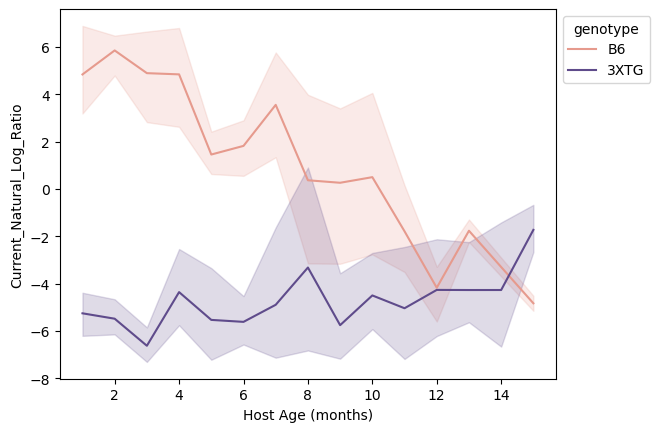

In [98]:
g = sns.lineplot(data=AkkLigi_LR_md[AkkLigi_LR_md['study_type']=='Longitudinal'], 
                 x='host_age', y='Current_Natural_Log_Ratio', 
                 hue='genotype', ci=95, 
                 hue_order=['B6', '3XTG'],
               palette=['#E69A8D', '#5F4B8B'])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Host Age (months)")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_gAkk-Ligi_LR_long-lineplot_newcolors_ci95.svg',
           bbox_inches='tight', dpi=150)
#longitudinal samples only

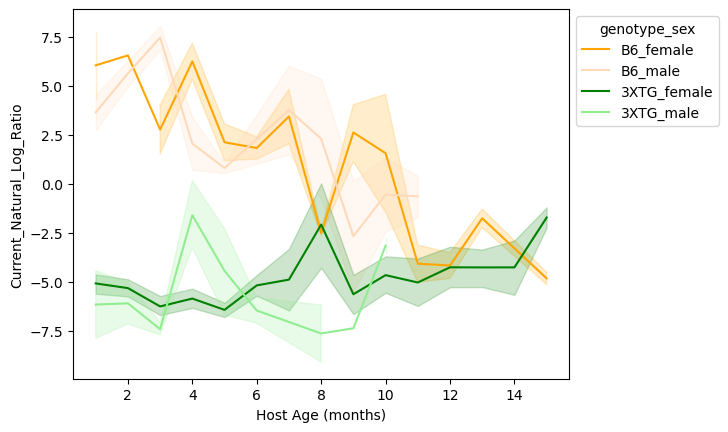

In [99]:
g = sns.lineplot(data=AkkLigi_LR_md[AkkLigi_LR_md['study_type']=='Longitudinal'], 
                 x='host_age', y='Current_Natural_Log_Ratio', 
                 hue='genotype_sex', ci=68, 
                 hue_order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Host Age (months)")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_gAkk-Ligi_LR_lineplot_long.svg',
           bbox_inches='tight', dpi=150)
#longitudinal only

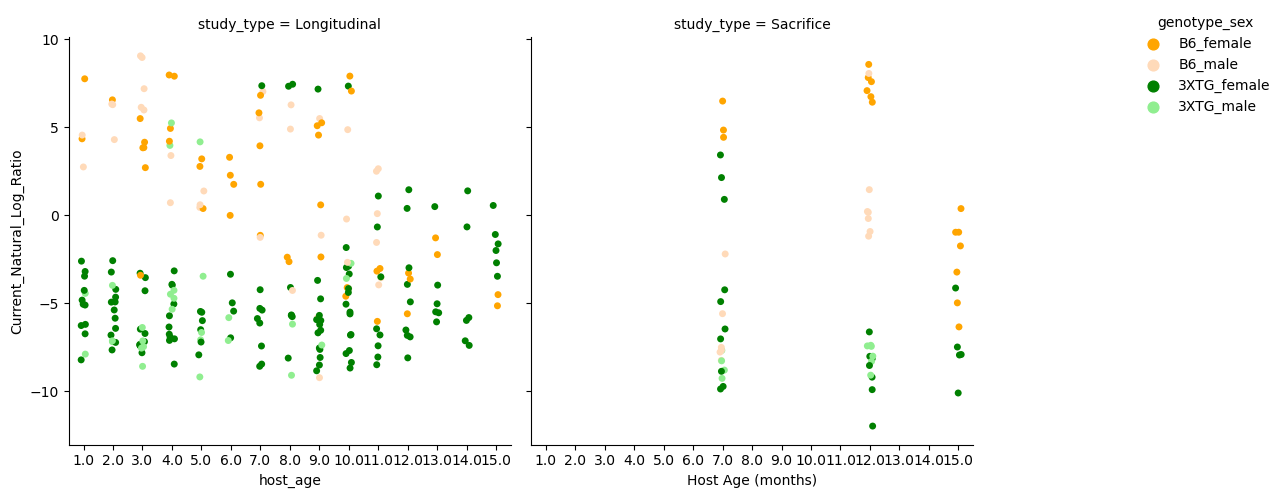

In [100]:
g = sns.catplot(data=AkkLigi_LR_md, x='host_age', y='Current_Natural_Log_Ratio', 
                 hue='genotype_sex', col='study_type',
                 hue_order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Host Age (months)")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_gAkk-Ligi_LR_catplot.svg',
           bbox_inches='tight', dpi=150)
#timepoint 7, 12, and 15 are from sacrificed mice

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Longitudinal vs. Sacrifice: Mann-Whitney-Wilcoxon test two-sided, P_val:2.854e-02 U_stat=8.827e+03


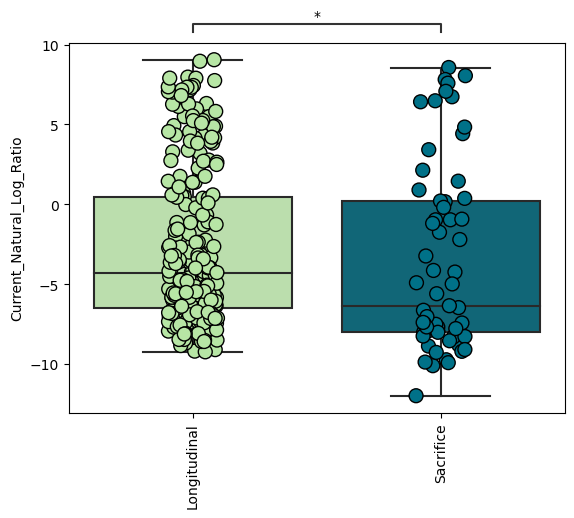

In [101]:
g = sns.boxplot(data=AkkLigi_LR_md, x='study_type', y='Current_Natural_Log_Ratio',
               order=['Longitudinal', 'Sacrifice'],
               palette=['#B7E6A5', '#007188'])
g = sns.stripplot(data=AkkLigi_LR_md, x='study_type', y='Current_Natural_Log_Ratio', 
                  order=['Longitudinal', 'Sacrifice'],
               palette=['#B7E6A5', '#007188'],
                 s=10, edgecolor='k', linewidth=1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


pairs=[('Longitudinal', 'Sacrifice'),]

annotator = Annotator(g, pairs, data=AkkLigi_LR_md, x='study_type', y='Current_Natural_Log_Ratio',
               order=['Longitudinal', 'Sacrifice'])
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

plt.xlabel("")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_gAkk-Ligi_LR_boxplot_newcolors_study-type.svg',
           bbox_inches='tight', dpi=150)

#### name taxa from taxonomy

In [58]:
taxa = pd.read_csv('../data/Microbiome/pooling_filtered/gg2_taxonomy/taxonomy.tsv',
                  sep='\t', index_col=0, usecols=['Feature ID', 'Taxon'])
taxa.head()

Taxon
Feature ID                                                   
G000262225  d__Bacteria; p__Fusobacteriota; c__Fusobacteri...
G006716645  d__Bacteria; p__Bacteroidota; c__Bacteroidia; ...
G001310255  d__Bacteria; p__Proteobacteria; c__Alphaproteo...
G900604515  d__Bacteria; p__Actinobacteriota; c__Actinomyc...
G001813085  d__Bacteria; p__Actinobacteriota; c__Actinomyc...

In [59]:
rerun_geno = pd.read_csv('../data/Microbiome/pooling_filtered/RPCA_all/3XTG_RPCA_arrows_features.tsv', 
                             sep='\t', index_col=0)

rerun_geno.head()

Log_Ratio_Classification
Feature ID                         
G000487995              Denominator
G009767915              Denominator
G001953785              Denominator
G004793665              Denominator
G001314975                Numerator

In [60]:
rerun_geno_named = pd.merge(rerun_geno, taxa, left_index=True, right_index=True)
rerun_geno_named.head()

Log_Ratio_Classification  \
Feature ID                            
G000487995              Denominator   
G009767915              Denominator   
G001953785              Denominator   
G004793665              Denominator   
G001314975                Numerator   

                                                        Taxon  
Feature ID                                                     
G000487995  d__Bacteria; p__Deferribacterota; c__Deferriba...  
G009767915  d__Bacteria; p__Proteobacteria; c__Gammaproteo...  
G001953785  d__Bacteria; p__Firmicutes_D; c__Bacilli; o__L...  
G004793665  d__Bacteria; p__Actinobacteriota; c__Coriobact...  
G001314975  d__Bacteria; p__Bacteroidota; c__Bacteroidia; ...

In [62]:
rerun_geno_named.to_csv('../data/Microbiome/pooling_filtered/RPCA_all/3XTG_RPCA_arrows_features_named.tsv',
                  sep='\t')

In [29]:
sactop10_Ax2_LR = pd.read_csv('../data/Microbiome/pooling_filtered/sacrifice/RPCA/3XTG_sacranks_Axis2_topbot10feats_allLR.tsv', 
                             sep='\t', index_col=0, usecols=['Sample ID', 'Current_Natural_Log_Ratio'])
sactop10_Ax2_LR.head()

Current_Natural_Log_Ratio
Sample ID                                             
14748.CAGE41.FSPF3XTG.L10.1                  -0.236183
14748.CAGE21.FSPF3XTG.L9.2                   -1.967352
14748.CAGE41.FSPF3XTG.L2.2                   -1.146423
14748.CAGE40.FSPF3XTG.L10.1                  -2.647650
14748.CAGE41.FSPF3XTG.L7.1                   -1.322085

In [30]:
sactop10_Ax2_LR_md = pd.merge(sactop10_Ax2_LR, metadata, left_index=True, right_index=True)
sactop10_Ax2_LR_md.head()

Current_Natural_Log_Ratio        anonymized_name  \
14748.CAGE41.FSPF3XTG.L10.1                  -0.236183  CAGE41.FSPF3XTG.L10.1   
14748.CAGE21.FSPF3XTG.L9.2                   -1.967352   CAGE21.FSPF3XTG.L9.2   
14748.CAGE41.FSPF3XTG.L2.2                   -1.146423   CAGE41.FSPF3XTG.L2.2   
14748.CAGE40.FSPF3XTG.L10.1                  -2.647650  CAGE40.FSPF3XTG.L10.1   
14748.CAGE41.FSPF3XTG.L7.1                   -1.322085   CAGE41.FSPF3XTG.L7.1   

                            collection_timestamp description  dna_extracted  \
14748.CAGE41.FSPF3XTG.L10.1              3/10/21         NaN          False   
14748.CAGE21.FSPF3XTG.L9.2              11/23/20         NaN          False   
14748.CAGE41.FSPF3XTG.L2.2               6/30/20         NaN          False   
14748.CAGE40.FSPF3XTG.L10.1              3/10/21         NaN          False   
14748.CAGE41.FSPF3XTG.L7.1               12/1/20         NaN          False   

                             elevation           empo_1  empo_2  \
14748.CAGE41.FSPF3XTG.L10.1        263  Host-associated  Animal   
14748.CAGE21.FSPF3XTG.L9.2         263  Host-associated  Animal   
14748.CAGE41.FSPF3XTG.L2.2         263  Host-associated  Animal   
14748.CAGE40.FSPF3XTG.L10.1        263  Host-associated  Animal   
14748.CAGE41.FSPF3XTG.L7.1         263  Host-associated  Animal   

                                        empo_3    env_biome  ...  \
14748.CAGE41.FSPF3XTG.L10.1  Animal distal gut  urban biome  ...   
14748.CAGE21.FSPF3XTG.L9.2   Animal distal gut  urban biome  ...   
14748.CAGE41.FSPF3XTG.L2.2   Animal distal gut  urban biome  ...   
14748.CAGE40.FSPF3XTG.L10.1  Animal distal gut  urban biome  ...   
14748.CAGE41.FSPF3XTG.L7.1   Animal distal gut  urban biome  ...   

                                  scientific_name     sex    study_type  \
14748.CAGE41.FSPF3XTG.L10.1  mouse gut metagenome  female  Longitudinal   
14748.CAGE21.FSPF3XTG.L9.2   mouse gut metagenome  female  Longitudinal   
14748.CAGE41.FSPF3XTG.L2.2   mouse gut metagenome  female  Longitudinal   
14748.CAGE40.FSPF3XTG.L10.1  mouse gut metagenome  female  Longitudinal   
14748.CAGE41.FSPF3XTG.L7.1   mouse gut metagenome  female  Longitudinal   

                            taxon_id  \
14748.CAGE41.FSPF3XTG.L10.1   410661   
14748.CAGE21.FSPF3XTG.L9.2    410661   
14748.CAGE41.FSPF3XTG.L2.2    410661   
14748.CAGE40.FSPF3XTG.L10.1   410661   
14748.CAGE41.FSPF3XTG.L7.1    410661   

                                                                         title  \
14748.CAGE41.FSPF3XTG.L10.1  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE21.FSPF3XTG.L9.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE41.FSPF3XTG.L2.2   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE40.FSPF3XTG.L10.1  Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   
14748.CAGE41.FSPF3XTG.L7.1   Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...   

                               tube_id  keep genotype_sex    cohort  \
14748.CAGE41.FSPF3XTG.L10.1  363130500  True  3XTG_female  COHORT 6   
14748.CAGE21.FSPF3XTG.L9.2   363132072  True  3XTG_female  COHORT 4   
14748.CAGE41.FSPF3XTG.L2.2   363131324  True  3XTG_female  COHORT 6   
14748.CAGE40.FSPF3XTG.L10.1  363130487  True  3XTG_female  COHORT 6   
14748.CAGE41.FSPF3XTG.L7.1   363130482  True  3XTG_female  COHORT 6   

                            genotype_tp  
14748.CAGE41.FSPF3XTG.L10.1     3XTG_10  
14748.CAGE21.FSPF3XTG.L9.2       3XTG_9  
14748.CAGE41.FSPF3XTG.L2.2       3XTG_2  
14748.CAGE40.FSPF3XTG.L10.1     3XTG_10  
14748.CAGE41.FSPF3XTG.L7.1       3XTG_7  

[5 rows x 41 columns]

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

B6_female vs. B6_male: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.908e-01 U_stat=1.374e+03
3XTG_female vs. 3XTG_male: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.166e-02 U_stat=3.702e+03
B6_female vs. 3XTG_female: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.092e-20 U_stat=8.860e+03
B6_male vs. 3XTG_male: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.786e-14 U_stat=1.857e+03


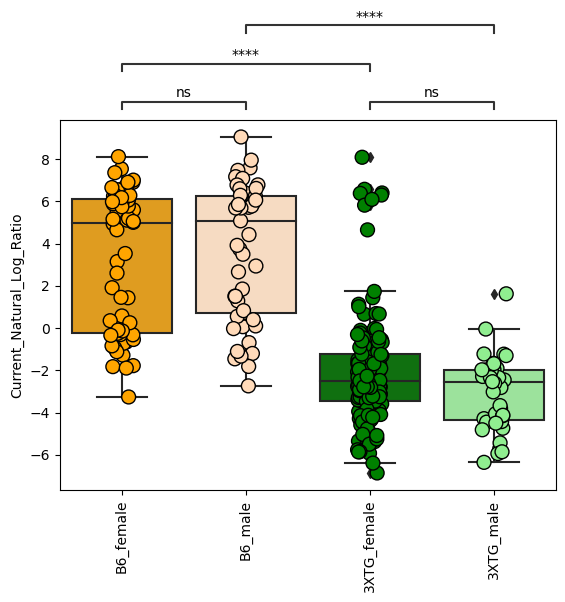

In [34]:
g = sns.boxplot(data=sactop10_Ax2_LR_md, x='genotype_sex', y='Current_Natural_Log_Ratio',
               order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'])
g = sns.stripplot(data=sactop10_Ax2_LR_md, x='genotype_sex', y='Current_Natural_Log_Ratio', 
                  order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'],
               palette=['orange', 'peachpuff', 'green', 'lightgreen'],
                 s=10, edgecolor='k', linewidth=1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


pairs=[('B6_female', 'B6_male'), ('B6_female', '3XTG_female'), 
       ('B6_male', '3XTG_male'), ('3XTG_female', '3XTG_male')]

annotator = Annotator(g, pairs, data=sactop10_Ax2_LR_md, x='genotype_sex', y='Current_Natural_Log_Ratio',
               order=['B6_female', 'B6_male', '3XTG_female', '3XTG_male'])
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside',
                   comparisons_correction="BH")
annotator.apply_and_annotate()

plt.xlabel("")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_sacranks_top10-Ax2_LR_boxplot.svg',
           bbox_inches='tight', dpi=150)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

B6 vs. 3XTG: Mann-Whitney-Wilcoxon test two-sided, P_val:2.016e-08 U_stat=8.530e+02


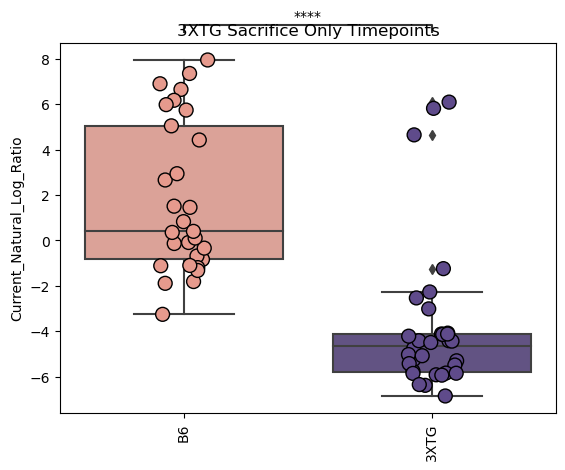

In [41]:
g = sns.boxplot(data=sactop10_Ax2_LR_md[sactop10_Ax2_LR_md['study_type']=='Sacrifice'], 
                x='genotype', y='Current_Natural_Log_Ratio',
               order=['B6', '3XTG'],
               palette=['#E69A8D', '#5F4B8B'])
g = sns.stripplot(data=sactop10_Ax2_LR_md[sactop10_Ax2_LR_md['study_type']=='Sacrifice'], 
                  x='genotype', y='Current_Natural_Log_Ratio', 
                  order=['B6', '3XTG'],
               palette=['#E69A8D', '#5F4B8B'],
                 s=10, edgecolor='k', linewidth=1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


pairs=[('B6', '3XTG'),]

annotator = Annotator(g, pairs, data=sactop10_Ax2_LR_md[sactop10_Ax2_LR_md['study_type']=='Sacrifice'], 
                      x='genotype', y='Current_Natural_Log_Ratio',
               order=['B6', '3XTG'])
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

plt.title('3XTG Sacrifice Only Timepoints')
plt.xlabel("")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_sacranks_top10-Ax2_LR_boxplot_newcolors_sac-only.svg',
           bbox_inches='tight', dpi=150)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

12.0_B6 vs. 12.0_3XTG: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.650e-05 U_stat=1.690e+02
7.0_B6 vs. 7.0_3XTG: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:8.942e-03 U_stat=1.050e+02
15.0_B6 vs. 15.0_3XTG: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.010e-02 U_stat=3.300e+01


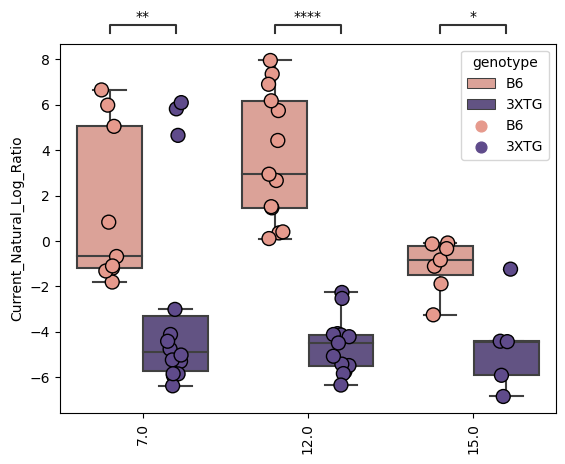

In [36]:
g = sns.boxplot(data=sactop10_Ax2_LR_md[sactop10_Ax2_LR_md['study_type']=='Sacrifice'], 
                x='host_age', y='Current_Natural_Log_Ratio', 
                hue='genotype', hue_order=['B6', '3XTG'], palette=['#E69A8D', '#5F4B8B'])
g = sns.stripplot(data=sactop10_Ax2_LR_md[sactop10_Ax2_LR_md['study_type']=='Sacrifice'], 
                  x='host_age', y='Current_Natural_Log_Ratio', 
                  hue='genotype', hue_order=['B6', '3XTG'], palette=['#E69A8D', '#5F4B8B'],
                 s=10, edgecolor='k', linewidth=1, dodge=True)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


pairs=[((7.0, 'B6'),(7.0, '3XTG')),((12.0, 'B6'),(12.0, '3XTG')), ((15.0, 'B6'),(15.0, '3XTG'))]

annotator = Annotator(g, pairs, data=sactop10_Ax2_LR_md[sactop10_Ax2_LR_md['study_type']=='Sacrifice'], 
                      x='host_age', y='Current_Natural_Log_Ratio',
               hue='genotype', hue_order=['B6', '3XTG'])
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside',
                   comparisons_correction="BH")
annotator.apply_and_annotate()

plt.xlabel("")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_sacranks_top10-Ax2_LR_sac-boxplot_newcolors.svg',
           bbox_inches='tight', dpi=150)

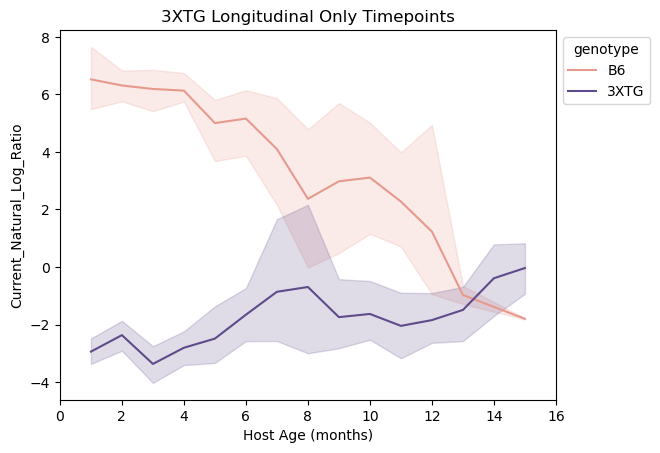

In [42]:
g = sns.lineplot(data=sactop10_Ax2_LR_md[sactop10_Ax2_LR_md['study_type']=='Longitudinal'], 
                 x='host_age', y='Current_Natural_Log_Ratio', 
                 hue='genotype', ci=95, 
                 hue_order=['B6', '3XTG'],
               palette=['#E69A8D', '#5F4B8B'])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.xlim(0,16)
plt.xlabel("Host Age (months)")
plt.title('3XTG Longitudinal Only Timepoints')
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/3XTG_sacranks_top10-Ax2_LR_long-lineplot_newcolors_ci95.svg',
           bbox_inches='tight', dpi=150)
#longitudinal samples only